#  Solving TSP using Genetic Algorithm

+ ***Genetic Algorithm*** consists of the following parts :
    + 1. ***Population Initialization***
    + 2. ***Selection of top K fittest chromosomes*** from the population where fitness is calculated by usig fitness function
    + 3. ***Mating*** New population is created by using the ***top K fittest chromosomes*** computed in step 2
    + 4. ***Mutation*** Every chromosome of this newly created population from Mating is mutated 
    + 5. Mutated population is passed back to ***step 2*** untill certain predefined number of generations are finished.
    

# <a id='index'>Index</a>

+ <a href='#libraries'>1. Libraries</a>
+ <a href='#pop_init'>2. Population Initialization</a>
+ <a href='#fitness'>3. Fitness Function</a>
+ <a href='#select_fittest'>4. Selecting the Fittest Chromosomes</a>
+ <a href='#mating'>5. Mating</a>
+ <a href='#mutation'>6. Mutation</a>
+ <a href='#ga'>7. Genetic Algorithm implementation</a>
+ <a href='#execution'>8. Execution</a>
     + <a href='#exec1'>8.1 Example 1 - When graph is not fully connected</a>
     + <a href='#exec2'>8.2 Example 2 - fully connected graph</a>
     + <a href='#exec3'>8.3 Example 3 - fully connected graph</a>
     + <a href='#exec4'>8.4 Example 4 - fully connected graph</a>
+ <a href='#test'>9. Testing using Large Fully Connected Graphs</a>
     + <a href='#test1'>9.1 Fully connected graph with 10 nodes</a>
     + <a href='#test2'>9.2 Fully connected graph with 50 nodes</a>
         + <a href='#test2.1'>9.2.1 2500 Generations</a>
         + <a href='#test2.2'>9.2.2 500 Generations</a>
+ <a href='#final'>10. Final Remarks</a>

# <a id='libraries'>1. Libraries</a>
<a href='#index'>Go back to the top</a>

In [1]:
import math # to initialize minimum to infinity
from collections import defaultdict # dictionary of lists
import numpy as np # for generating random weights in large graph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # to show graph
import random

# <a id='pop_init'>2. Population Initialization</a>
<a href='#index'>Go back to the top</a>

In [3]:
def initialize_population(nodes,pop_size):
    max_nod_num = max(nodes)
    population = []
    for i in range(pop_size):
        chromosome = []
        # to create a fully connected path
        while len(chromosome)!=len(nodes):
            rand_node = np.random.randint(max_nod_num+1)
            # to prevent repeted additions of nodes in the same chrromosome
            if rand_node not in chromosome:
                chromosome.append(rand_node)
        population.append(chromosome)
    return population

# <a id='fitness'>3. Fitness Function</a>
<a href='#index'>Go back to the top</a>

In [2]:
def cost(graph_edges,chromosome):
        total_cost=0
        i=1
        while i<len(chromosome):
            for temp_edge in graph_edges:
                if chromosome[i-1]==temp_edge[0] and chromosome[i]==temp_edge[1]:
                    total_cost=total_cost+temp_edge[2]
            i=i+1
        for temp_edge in graph_edges:
                if chromosome[0]==temp_edge[0] and chromosome[len(chromosome) - 1]==temp_edge[1]:
                    total_cost=total_cost+temp_edge[2]
        return total_cost

# <a id='select_fittest'>4. Selecting the Fittest Chromosomes</a>
<a href='#index'>Go back to the top</a>

In [4]:
def select_best(parent_gen,graph_edges,elite_size):
    costs = []
    selected_parent = []
    pop_fitness = []
    for i in range(len(parent_gen)):
        costs.append(cost(graph_edges,parent_gen[i]))
        pop_fitness.append((costs[i],parent_gen[i]))
    #sort according to path_costs
    pop_fitness.sort(key = lambda x: x[0])
    # select only top elite_size fittest chromosomes in the population
    for i in range(elite_size):
        selected_parent.append(pop_fitness[i][1])
    return selected_parent,pop_fitness[0][0],selected_parent[0]

# <a id='mating'>5. Mating</a>
<a href='#index'>Go back to the top</a>

In [5]:
def breed(parent1, parent2):
    
    # let's say to breed from two parents (0,1,2,3,4) and (1,3,2,0,4)
    # if we choose parent1(0-2) i.e (0,1,2) then we have to choose (3,4) from parent2
    # i.e we have to create two children from two parents which are disjoint w.r.t each other
    child = []
    childP1 = []
    childP2 = []
    
    #select two random numbers between range(0,len(parents)) which are used as index
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    #define start and end index to select child1 from parent1
    if geneA < geneB :
        startGene, endGene = geneA, geneB
    else :
        endGene, startGene = geneA, geneB

    #add parent1(startGene,endGene) to child1
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
    
    #add parent2 to child2 if parent2 not in child1
    childP2 = [item for item in parent2 if item not in childP1]

    #create new child using disjoint Child1 and Child2
    child = childP1 + childP2
    return child

def breedPopulation(parents, pop_size):
    children = []
    temp = np.array(parents)
    n_parents = temp.shape[0]
    #create new population of size pop_size from previous population
    for i in range(pop_size):
        #choose random parents
        random_dad = parents[np.random.randint(low =0,high = n_parents - 1)]
        random_mom = parents[np.random.randint(low =0,high = n_parents - 1)]
        #create child using random parents
        children.append(breed(random_dad,random_mom))
    return children

# <a id='mutation'>6. Mutation</a>
<a href='#index'>Go back to the top</a>

In [7]:
def mutate(parent, n_mutations):
    # we cannot randomly change a node from chromosome to another node
    # as this will create repeated nodes
    # we define mutation as mutation of edges in the path i.e swapping of nodes in the chromosome
    temp_parent = np.array(parent)
    size1 = temp_parent.shape[0]
    max_nod_num = max(parent)
    for i in range(n_mutations):
        # choose random indices to swap nodes in a chromosome
        rand1 = np.random.randint(0,size1)
        rand2 = np.random.randint(0,size1)
        # if rand1 and rand2 are same, then chromosome won't be mutated
        # so change rand2
        if rand1 == rand2:
            rand2=(rand2+1)%size1
        parent[rand1],parent[rand2]=parent[rand2],parent[rand1]
    return parent


def mutatePopulation(population, n_mutations):
    mutatedPop = []
    #mutate population
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], n_mutations)
        mutatedPop.append(mutatedInd)
    return mutatedPop


# <a id='ga'>7. Genetic Algorithm implementation</a>
<a href='#index'>Go back to the top</a>

In [8]:
# class that represents a graph
class Graph:

    def __init__(self,vertices):
        self.nodes = [] #list of nodes 
        for i in range(len(vertices)):
            self.nodes.append(vertices[i])
        self.edges = []           # to store graph 
        # dictionary with the lists of successors of each node, faster to get the successors
        # each item of list is a 2-tuple: (destination, weight)
        self.successors = defaultdict(list)


    # function that adds edges
    def addEdge(self,u,v,w): 
        for edges in self.edges:
            #check if edge is already present
            if u==edges[0] and v==edges[1]:
                print("Edge already exists")
                return
        self.edges.append([u,v,w])
        self.successors[u].append((v, w))


    # function to get the cost of optimal path found
    def get_cost(self,visited_nodes):
        if len(visited_nodes)<=1:
            return 0
        else:
            total_cost=0
            i=1
            while i<len(visited_nodes):
                for temp_edge in self.edges:
                    if visited_nodes[i-1]==temp_edge[0] and visited_nodes[i]==temp_edge[1]:
                        total_cost=total_cost+temp_edge[2]
                i=i+1
            for temp_edge in self.edges:
                    if visited_nodes[0]==temp_edge[0] and visited_nodes[len(visited_nodes) - 1]==temp_edge[1]:
                        total_cost=total_cost+temp_edge[2]
            return total_cost

    def disconnected(self,initial_node):
        is_disconnected = False
        for node in range(len(self.nodes)):
            neighbors = self.successors[node]
            # graph is fully connected if number of neighbours of eache node will be 1 less than total 
            # number of nodes in the graph
            if len(neighbors) < (len(self.nodes)-1):
                is_disconnected = True
                return is_disconnected
        return is_disconnected


    def gen_algo(self,source,generations):
        #check if a graph is fully connected
        if self.disconnected(source):
            print("Graph is not connected")
            return []
        #initialize population with a certain size
        pop_size = 20
        parent_gen = initialize_population(self.nodes,pop_size) 
        print(parent_gen)
        # keep the track of minimum path cost for each generation
        overall_costs = []
        # keep track of best route with minimum path cost for each generation
        overall_routes = []
        for i in range(generations):
            print("Generation number :",i+1,"/",generations)
            # choose only elite chromosome from population
            elite_size = 10
            parent_gen,min_cost,best_route = select_best(parent_gen,self.edges,elite_size)
            print("Best route for generation",i+1,":",best_route)
            print("Best cost for generation",i+1,":",min_cost)
            # store minimum path cost and best route for every generation
            overall_costs.append(min_cost)
            overall_routes.append(best_route)
            #mating
            parent_gen = breedPopulation(parent_gen,pop_size)
            #mutating
            n_mutations=1 
            parent_gen = mutatePopulation(parent_gen,n_mutations)
            print("=============================================================================================================")
        #select the minimum path_cost
        minimum = min(overall_costs)
        min_index=-1
        #find the path with minimum path_cost from stored overall_routes
        for i in range(len(overall_costs)):
            if minimum == overall_costs[i]:
                min_index = i
        #return best route 
        return overall_routes[min_index]


In [9]:
def print_path(path,source):
    print("=================Path found=================")
    print("final path:")
    start = path.index(source)
    for i in range(start,len(path)-1):
        print(path[i],"->",path[i+1])
    print(path[len(path)-1],"->",path[0])
    for i in range(0,start):
        print(path[i],"->",path[i+1])

# <a id='execution'>8. Execution</a>
<a href='#index'>Go back to the top</a>

## <a id='exec1'>8.1 Example 1 - When graph is not fully connected</a>
<a href='#index'>Go back to the top</a>

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


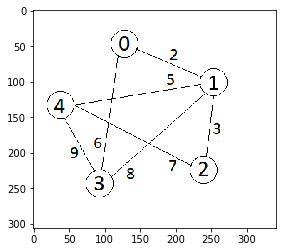

In [10]:
%pylab inline

img = mpimg.imread('partially_connected.png')
imgplot = plt.imshow(img)
plt.show()

In [11]:
g = Graph([0,1,2,3,4]) 
g.addEdge(0, 1, 2) 
g.addEdge(1, 0, 2)

g.addEdge(0, 3, 6) 
g.addEdge(3, 0, 6)

g.addEdge(1, 2, 3) 
g.addEdge(2, 1, 3)

g.addEdge(1, 3, 8) 
g.addEdge(3, 1, 8)
 
g.addEdge(1, 4, 5)  
g.addEdge(4, 1, 5)

g.addEdge(4, 2, 7) 
g.addEdge(2, 4, 7)

g.addEdge(3, 4, 9) 
g.addEdge(4, 3, 9)


generations=500
path = g.gen_algo(0,generations) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path,0)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

Graph is not connected
Did not reach the goal!


##  <a id='exec2'>8.2 Example 2 - fully connected graph</a>
<a href='#index'>Go back to the top</a>

Populating the interactive namespace from numpy and matplotlib


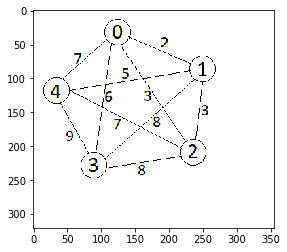

In [12]:
%pylab inline

img = mpimg.imread('fully_connected1.png')
imgplot = plt.imshow(img)
plt.show()

In [13]:
g = Graph([0,1,2,3,4])

g.addEdge(0, 1, 2) 
g.addEdge(1, 0, 2)

g.addEdge(0,2,3)
g.addEdge(2,0,3)

g.addEdge(0, 3, 6) 
g.addEdge(3, 0, 6)

g.addEdge(0, 4, 7) 
g.addEdge(4, 0, 7)

g.addEdge(1, 2, 3) 
g.addEdge(2, 1, 3)

g.addEdge(1, 3, 8) 
g.addEdge(3, 1, 8)
 
g.addEdge(1, 4, 5) 
g.addEdge(4, 1, 5)

g.addEdge(3, 2, 8) 
g.addEdge(2, 3, 8)

g.addEdge(4, 2, 7) 
g.addEdge(2, 4, 7)

g.addEdge(3, 4, 9) 
g.addEdge(4, 3, 9)

generations=100
path = g.gen_algo(0,generations) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path,0)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

[[2, 4, 3, 1, 0], [3, 2, 1, 0, 4], [2, 3, 4, 1, 0], [3, 2, 0, 4, 1], [2, 3, 1, 4, 0], [3, 0, 1, 4, 2], [1, 3, 4, 2, 0], [2, 0, 3, 1, 4], [0, 4, 1, 3, 2], [4, 3, 1, 0, 2], [4, 3, 2, 0, 1], [0, 2, 1, 3, 4], [2, 4, 0, 1, 3], [3, 4, 2, 0, 1], [0, 3, 4, 1, 2], [2, 3, 4, 1, 0], [4, 1, 3, 0, 2], [1, 3, 4, 2, 0], [1, 0, 4, 3, 2], [4, 3, 0, 1, 2]]
Generation number : 1 / 100
Best route for generation 1 : [0, 3, 4, 1, 2]
Best cost for generation 1 : 26
Generation number : 2 / 100
Best route for generation 2 : [0, 3, 4, 1, 2]
Best cost for generation 2 : 26
Generation number : 3 / 100
Best route for generation 3 : [1, 4, 3, 0, 2]
Best cost for generation 3 : 26
Generation number : 4 / 100
Best route for generation 4 : [0, 3, 4, 2, 1]
Best cost for generation 4 : 27
Generation number : 5 / 100
Best route for generation 5 : [1, 2, 0, 3, 4]
Best cost for generation 5 : 26
Generation number : 6 / 100
Best route for generation 6 : [1, 4, 3, 2, 0]
Best cost for generation 6 : 27
Generation number : 7 /

Generation number : 63 / 100
Best route for generation 63 : [2, 0, 3, 4, 1]
Best cost for generation 63 : 26
Generation number : 64 / 100
Best route for generation 64 : [2, 1, 4, 3, 0]
Best cost for generation 64 : 26
Generation number : 65 / 100
Best route for generation 65 : [2, 0, 3, 4, 1]
Best cost for generation 65 : 26
Generation number : 66 / 100
Best route for generation 66 : [3, 4, 1, 2, 0]
Best cost for generation 66 : 26
Generation number : 67 / 100
Best route for generation 67 : [2, 1, 4, 3, 0]
Best cost for generation 67 : 26
Generation number : 68 / 100
Best route for generation 68 : [1, 2, 0, 3, 4]
Best cost for generation 68 : 26
Generation number : 69 / 100
Best route for generation 69 : [2, 0, 3, 4, 1]
Best cost for generation 69 : 26
Generation number : 70 / 100
Best route for generation 70 : [3, 0, 2, 1, 4]
Best cost for generation 70 : 26
Generation number : 71 / 100
Best route for generation 71 : [3, 4, 1, 2, 0]
Best cost for generation 71 : 26
Generation number :

## <a id='exec3'>8.3 Example 3 - fully connected graph</a> 
<a href='#index'>Go back to the top</a>

Populating the interactive namespace from numpy and matplotlib


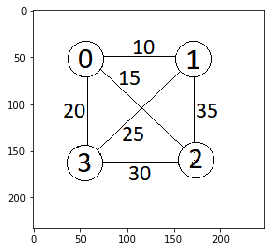

In [14]:
%pylab inline

img = mpimg.imread('fully_connected2.png')
imgplot = plt.imshow(img)
plt.show()

In [15]:
g=Graph([0,1,2,3])

g.addEdge(0, 1, 10) 
g.addEdge(1, 0, 10)

g.addEdge(0, 2, 15) 
g.addEdge(2, 0, 15)

g.addEdge(0, 3, 20) 
g.addEdge(3, 0, 20)

g.addEdge(1, 2, 35) 
g.addEdge(2, 1, 35)

g.addEdge(1, 3, 25) 
g.addEdge(3, 1, 25)

g.addEdge(3, 2, 30) 
g.addEdge(2, 3, 30)

generations = 100
path = g.gen_algo(0,generations) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path,0)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

[[2, 0, 1, 3], [2, 0, 3, 1], [0, 1, 3, 2], [0, 3, 2, 1], [2, 0, 1, 3], [0, 1, 2, 3], [2, 3, 0, 1], [2, 3, 1, 0], [3, 1, 0, 2], [1, 3, 0, 2], [3, 1, 0, 2], [2, 0, 3, 1], [0, 2, 1, 3], [1, 3, 2, 0], [3, 1, 0, 2], [3, 0, 2, 1], [0, 2, 1, 3], [2, 3, 0, 1], [0, 2, 1, 3], [1, 2, 3, 0]]
Generation number : 1 / 100
Best route for generation 1 : [2, 0, 1, 3]
Best cost for generation 1 : 80
Generation number : 2 / 100
Best route for generation 2 : [3, 2, 0, 1]
Best cost for generation 2 : 80
Generation number : 3 / 100
Best route for generation 3 : [2, 3, 1, 0]
Best cost for generation 3 : 80
Generation number : 4 / 100
Best route for generation 4 : [2, 3, 1, 0]
Best cost for generation 4 : 80
Generation number : 5 / 100
Best route for generation 5 : [1, 3, 2, 0]
Best cost for generation 5 : 80
Generation number : 6 / 100
Best route for generation 6 : [0, 2, 3, 1]
Best cost for generation 6 : 80
Generation number : 7 / 100
Best route for generation 7 : [1, 0, 2, 3]
Best cost for generation 7 : 8

Generation number : 55 / 100
Best route for generation 55 : [2, 3, 1, 0]
Best cost for generation 55 : 80
Generation number : 56 / 100
Best route for generation 56 : [0, 2, 3, 1]
Best cost for generation 56 : 80
Generation number : 57 / 100
Best route for generation 57 : [3, 2, 0, 1]
Best cost for generation 57 : 80
Generation number : 58 / 100
Best route for generation 58 : [3, 2, 0, 1]
Best cost for generation 58 : 80
Generation number : 59 / 100
Best route for generation 59 : [2, 0, 1, 3]
Best cost for generation 59 : 80
Generation number : 60 / 100
Best route for generation 60 : [0, 2, 3, 1]
Best cost for generation 60 : 80
Generation number : 61 / 100
Best route for generation 61 : [2, 3, 1, 0]
Best cost for generation 61 : 80
Generation number : 62 / 100
Best route for generation 62 : [0, 2, 3, 1]
Best cost for generation 62 : 80
Generation number : 63 / 100
Best route for generation 63 : [3, 1, 0, 2]
Best cost for generation 63 : 80
Generation number : 64 / 100
Best route for ge

## <a id='exec4'>8.4 Example 4 - fully connected graph</a>
<a href='#index'>Go back to the top</a>

Populating the interactive namespace from numpy and matplotlib


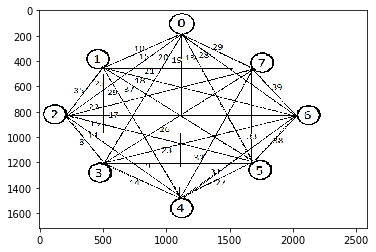

In [16]:
%pylab inline

img = mpimg.imread('fully_connected3.png')
imgplot = plt.imshow(img)
plt.show()

In [17]:
g=Graph([0,1,2,3,4,5,6,7])

g.addEdge(0, 1, 10) 
g.addEdge(1, 0, 10)

g.addEdge(0, 2, 15) 
g.addEdge(2, 0, 15)

g.addEdge(0, 3, 20) 
g.addEdge(3, 0, 20)

g.addEdge(0, 4, 19) 
g.addEdge(4, 0, 19)

g.addEdge(0, 5, 13) 
g.addEdge(5, 0, 13)

g.addEdge(0, 6, 28) 
g.addEdge(6, 0, 28)

g.addEdge(0, 7, 29) 
g.addEdge(7, 0, 29)

g.addEdge(1, 2, 35) 
g.addEdge(2, 1, 35)

g.addEdge(1, 3, 25) 
g.addEdge(3, 1, 25)

g.addEdge(1, 4, 29) 
g.addEdge(4, 1, 29)

g.addEdge(1, 5, 37) 
g.addEdge(5, 1, 37)

g.addEdge(1, 6, 18) 
g.addEdge(6, 1, 18)

g.addEdge(1, 7, 21) 
g.addEdge(7, 1, 21)

g.addEdge(2, 3, 8)
g.addEdge(3, 2, 8) 

g.addEdge(2, 4, 11)
g.addEdge(4, 2, 11) 

g.addEdge(2, 5, 15)
g.addEdge(5, 2, 15) 

g.addEdge(2, 6, 17)
g.addEdge(6, 2, 17) 

g.addEdge(2, 7, 22)
g.addEdge(7, 2, 22) 

g.addEdge(3, 4, 14)
g.addEdge(4, 3, 14) 

g.addEdge(3, 5, 9)
g.addEdge(5, 3, 9) 

g.addEdge(3, 6, 23)
g.addEdge(6, 3, 23) 

g.addEdge(3, 7, 26)
g.addEdge(7, 3, 26) 

g.addEdge(4, 5, 27)
g.addEdge(5, 4, 27) 

g.addEdge(4, 6, 31)
g.addEdge(6, 4, 31) 

g.addEdge(4, 7, 32)
g.addEdge(7, 4, 32) 

g.addEdge(5, 6, 38)
g.addEdge(6, 5, 38) 

g.addEdge(5, 7, 33)
g.addEdge(7, 5, 33) 

g.addEdge(6, 7, 39)
g.addEdge(7, 6, 39) 

generations=500
path = g.gen_algo(0,generations) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path,0)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

[[1, 6, 0, 3, 4, 7, 2, 5], [5, 7, 1, 0, 3, 6, 2, 4], [3, 5, 2, 6, 1, 4, 7, 0], [3, 0, 5, 1, 4, 7, 2, 6], [0, 2, 3, 1, 5, 7, 6, 4], [3, 5, 2, 4, 6, 7, 0, 1], [2, 0, 3, 1, 5, 6, 7, 4], [5, 6, 7, 0, 1, 2, 4, 3], [1, 3, 2, 6, 5, 0, 7, 4], [3, 5, 6, 2, 0, 1, 4, 7], [7, 6, 5, 2, 0, 3, 4, 1], [7, 3, 0, 5, 2, 1, 4, 6], [6, 3, 7, 1, 4, 0, 5, 2], [0, 6, 4, 5, 1, 3, 2, 7], [0, 5, 6, 3, 2, 4, 1, 7], [4, 2, 3, 0, 7, 5, 6, 1], [4, 7, 1, 6, 2, 5, 0, 3], [6, 4, 5, 2, 7, 0, 3, 1], [5, 6, 4, 3, 0, 1, 7, 2], [7, 4, 3, 5, 6, 2, 1, 0]]
Generation number : 1 / 500
Best route for generation 1 : [4, 7, 1, 6, 2, 5, 0, 3]
Best cost for generation 1 : 150
Generation number : 2 / 500
Best route for generation 2 : [3, 2, 5, 0, 4, 7, 1, 6]
Best cost for generation 2 : 149
Generation number : 3 / 500
Best route for generation 3 : [3, 5, 2, 7, 6, 1, 0, 4]
Best cost for generation 3 : 146
Generation number : 4 / 500
Best route for generation 4 : [2, 5, 3, 7, 6, 1, 0, 4]
Best cost for generation 4 : 147
Generation numb

Best route for generation 49 : [4, 2, 7, 1, 6, 3, 5, 0]
Best cost for generation 49 : 136
Generation number : 50 / 500
Best route for generation 50 : [4, 2, 6, 1, 7, 3, 5, 0]
Best cost for generation 50 : 134
Generation number : 51 / 500
Best route for generation 51 : [0, 1, 6, 3, 4, 2, 7, 5]
Best cost for generation 51 : 144
Generation number : 52 / 500
Best route for generation 52 : [6, 1, 7, 5, 0, 4, 3, 2]
Best cost for generation 52 : 143
Generation number : 53 / 500
Best route for generation 53 : [4, 2, 7, 1, 6, 5, 0, 3]
Best cost for generation 53 : 157
Generation number : 54 / 500
Best route for generation 54 : [0, 1, 6, 4, 5, 3, 7, 2]
Best cost for generation 54 : 158
Generation number : 55 / 500
Best route for generation 55 : [2, 0, 1, 6, 4, 5, 3, 7]
Best cost for generation 55 : 158
Generation number : 56 / 500
Best route for generation 56 : [6, 4, 2, 3, 5, 7, 1, 0]
Best cost for generation 56 : 151
Generation number : 57 / 500
Best route for generation 57 : [2, 6, 1, 0, 4, 3

Best route for generation 92 : [7, 2, 4, 0, 5, 3, 6, 1]
Best cost for generation 92 : 136
Generation number : 93 / 500
Best route for generation 93 : [6, 2, 4, 0, 5, 3, 7, 1]
Best cost for generation 93 : 134
Generation number : 94 / 500
Best route for generation 94 : [3, 5, 2, 7, 1, 6, 0, 4]
Best cost for generation 94 : 146
Generation number : 95 / 500
Best route for generation 95 : [7, 1, 6, 0, 4, 2, 3, 5]
Best cost for generation 95 : 147
Generation number : 96 / 500
Best route for generation 96 : [3, 4, 2, 6, 7, 1, 0, 5]
Best cost for generation 96 : 134
Generation number : 97 / 500
Best route for generation 97 : [4, 6, 0, 1, 7, 2, 5, 3]
Best cost for generation 97 : 150
Generation number : 98 / 500
Best route for generation 98 : [5, 3, 0, 1, 7, 4, 6, 2]
Best cost for generation 98 : 155
Generation number : 99 / 500
Best route for generation 99 : [2, 5, 3, 6, 0, 1, 7, 4]
Best cost for generation 99 : 149
Generation number : 100 / 500
Best route for generation 100 : [5, 2, 6, 7, 1,

Generation number : 181 / 500
Best route for generation 181 : [6, 1, 7, 0, 4, 2, 5, 3]
Best cost for generation 181 : 145
Generation number : 182 / 500
Best route for generation 182 : [5, 2, 7, 1, 6, 0, 4, 3]
Best cost for generation 182 : 146
Generation number : 183 / 500
Best route for generation 183 : [2, 6, 1, 7, 0, 4, 3, 5]
Best cost for generation 183 : 142
Generation number : 184 / 500
Best route for generation 184 : [2, 7, 1, 6, 5, 0, 3, 4]
Best cost for generation 184 : 157
Generation number : 185 / 500
Best route for generation 185 : [7, 6, 2, 5, 3, 4, 0, 1]
Best cost for generation 185 : 144
Generation number : 186 / 500
Best route for generation 186 : [1, 7, 2, 4, 0, 5, 3, 6]
Best cost for generation 186 : 136
Generation number : 187 / 500
Best route for generation 187 : [0, 7, 1, 6, 2, 3, 4, 5]
Best cost for generation 187 : 147
Generation number : 188 / 500
Best route for generation 188 : [4, 0, 5, 3, 2, 7, 1, 6]
Best cost for generation 188 : 141
Generation number : 189 

Best route for generation 226 : [4, 2, 7, 1, 0, 5, 3, 6]
Best cost for generation 226 : 140
Generation number : 227 / 500
Best route for generation 227 : [7, 1, 0, 5, 3, 4, 6, 2]
Best cost for generation 227 : 137
Generation number : 228 / 500
Best route for generation 228 : [1, 6, 3, 4, 2, 5, 0, 7]
Best cost for generation 228 : 144
Generation number : 229 / 500
Best route for generation 229 : [4, 7, 2, 3, 5, 0, 1, 6]
Best cost for generation 229 : 143
Generation number : 230 / 500
Best route for generation 230 : [5, 7, 1, 6, 3, 2, 4, 0]
Best cost for generation 230 : 146
Generation number : 231 / 500
Best route for generation 231 : [7, 2, 3, 5, 4, 6, 0, 1]
Best cost for generation 231 : 156
Generation number : 232 / 500
Best route for generation 232 : [2, 6, 0, 1, 7, 3, 5, 4]
Best cost for generation 232 : 149
Generation number : 233 / 500
Best route for generation 233 : [5, 7, 6, 2, 3, 4, 1, 0]
Best cost for generation 233 : 163
Generation number : 234 / 500
Best route for generatio

Generation number : 271 / 500
Best route for generation 271 : [3, 5, 6, 2, 4, 0, 1, 7]
Best cost for generation 271 : 151
Generation number : 272 / 500
Best route for generation 272 : [0, 4, 7, 1, 6, 3, 5, 2]
Best cost for generation 272 : 152
Generation number : 273 / 500
Best route for generation 273 : [5, 0, 2, 4, 1, 6, 7, 3]
Best cost for generation 273 : 160
Generation number : 274 / 500
Best route for generation 274 : [3, 2, 4, 6, 1, 0, 7, 5]
Best cost for generation 274 : 149
Generation number : 275 / 500
Best route for generation 275 : [7, 1, 6, 2, 4, 3, 0, 5]
Best cost for generation 275 : 147
Generation number : 276 / 500
Best route for generation 276 : [6, 3, 4, 2, 5, 7, 1, 0]
Best cost for generation 276 : 155
Generation number : 277 / 500
Best route for generation 277 : [0, 1, 7, 6, 4, 2, 3, 5]
Best cost for generation 277 : 142
Generation number : 278 / 500
Best route for generation 278 : [0, 6, 1, 7, 5, 3, 2, 4]
Best cost for generation 278 : 147
Generation number : 279 

Generation number : 314 / 500
Best route for generation 314 : [5, 4, 2, 3, 7, 1, 6, 0]
Best cost for generation 314 : 152
Generation number : 315 / 500
Best route for generation 315 : [5, 4, 2, 3, 7, 6, 1, 0]
Best cost for generation 315 : 152
Generation number : 316 / 500
Best route for generation 316 : [5, 2, 4, 3, 6, 7, 1, 0]
Best cost for generation 316 : 146
Generation number : 317 / 500
Best route for generation 317 : [0, 5, 3, 2, 7, 4, 6, 1]
Best cost for generation 317 : 143
Generation number : 318 / 500
Best route for generation 318 : [7, 1, 0, 5, 2, 4, 3, 6]
Best cost for generation 318 : 146
Generation number : 319 / 500
Best route for generation 319 : [2, 3, 5, 0, 4, 7, 1, 6]
Best cost for generation 319 : 137
Generation number : 320 / 500
Best route for generation 320 : [2, 3, 6, 1, 0, 5, 7, 4]
Best cost for generation 320 : 148
Generation number : 321 / 500
Best route for generation 321 : [3, 2, 4, 7, 1, 0, 6, 5]
Best cost for generation 321 : 157
Generation number : 322 

Generation number : 353 / 500
Best route for generation 353 : [6, 4, 2, 7, 1, 0, 5, 3]
Best cost for generation 353 : 140
Generation number : 354 / 500
Best route for generation 354 : [3, 7, 4, 2, 6, 1, 0, 5]
Best cost for generation 354 : 136
Generation number : 355 / 500
Best route for generation 355 : [2, 7, 5, 0, 1, 6, 3, 4]
Best cost for generation 355 : 144
Generation number : 356 / 500
Best route for generation 356 : [1, 0, 5, 3, 2, 4, 6, 7]
Best cost for generation 356 : 142
Generation number : 357 / 500
Best route for generation 357 : [0, 5, 3, 2, 4, 6, 1, 7]
Best cost for generation 357 : 140
Generation number : 358 / 500
Best route for generation 358 : [4, 6, 1, 0, 5, 3, 2, 7]
Best cost for generation 358 : 143
Generation number : 359 / 500
Best route for generation 359 : [1, 6, 0, 5, 3, 4, 2, 7]
Best cost for generation 359 : 136
Generation number : 360 / 500
Best route for generation 360 : [1, 6, 2, 5, 3, 4, 0, 7]
Best cost for generation 360 : 142
Generation number : 361 

Generation number : 403 / 500
Best route for generation 403 : [3, 5, 7, 4, 6, 1, 0, 2]
Best cost for generation 403 : 156
Generation number : 404 / 500
Best route for generation 404 : [4, 2, 0, 5, 3, 6, 1, 7]
Best cost for generation 404 : 142
Generation number : 405 / 500
Best route for generation 405 : [6, 4, 2, 7, 1, 0, 5, 3]
Best cost for generation 405 : 140
Generation number : 406 / 500
Best route for generation 406 : [6, 4, 2, 7, 3, 5, 0, 1]
Best cost for generation 406 : 140
Generation number : 407 / 500
Best route for generation 407 : [2, 7, 6, 1, 0, 4, 3, 5]
Best cost for generation 407 : 146
Generation number : 408 / 500
Best route for generation 408 : [4, 2, 7, 3, 6, 1, 0, 5]
Best cost for generation 408 : 150
Generation number : 409 / 500
Best route for generation 409 : [2, 5, 3, 6, 1, 0, 7, 4]
Best cost for generation 409 : 147
Generation number : 410 / 500
Best route for generation 410 : [5, 0, 4, 6, 1, 7, 2, 3]
Best cost for generation 410 : 141
Generation number : 411 

Generation number : 453 / 500
Best route for generation 453 : [4, 2, 6, 0, 1, 7, 5, 3]
Best cost for generation 453 : 143
Generation number : 454 / 500
Best route for generation 454 : [0, 1, 6, 2, 5, 3, 4, 7]
Best cost for generation 454 : 144
Generation number : 455 / 500
Best route for generation 455 : [2, 4, 7, 5, 3, 6, 1, 0]
Best cost for generation 455 : 151
Generation number : 456 / 500
Best route for generation 456 : [1, 7, 5, 3, 6, 4, 2, 0]
Best cost for generation 456 : 153
Generation number : 457 / 500
Best route for generation 457 : [4, 2, 5, 3, 6, 7, 1, 0]
Best cost for generation 457 : 147
Generation number : 458 / 500
Best route for generation 458 : [3, 0, 6, 1, 7, 2, 4, 5]
Best cost for generation 458 : 156
Generation number : 459 / 500
Best route for generation 459 : [7, 4, 0, 5, 3, 2, 6, 1]
Best cost for generation 459 : 137
Generation number : 460 / 500
Best route for generation 460 : [6, 1, 7, 5, 0, 4, 3, 2]
Best cost for generation 460 : 143
Generation number : 461 

# <a id='test'>9. Testing using Large Fully Connected Graphs</a>
<a href='#index'>Go back to the top</a>

## <a id='test1'>9.1 Fully connected graph with 10 nodes</a>
<a href='#index'>Go back to the top</a>

In [18]:
nodes=[0,1,2,3,4,5,6,7,8,9]
g = Graph(nodes)
for i in range(10):
    for j in range(10):
        if i>j:
            weight = np.random.randint(20)
            g.addEdge(i,j,weight)
            g.addEdge(j,i,weight)

generations=1500
path = g.gen_algo(0,generations) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path,0)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

[[3, 1, 6, 5, 2, 8, 9, 0, 7, 4], [9, 8, 7, 2, 0, 1, 5, 3, 4, 6], [1, 2, 9, 5, 4, 7, 6, 3, 0, 8], [4, 6, 7, 2, 0, 5, 3, 1, 8, 9], [9, 1, 8, 4, 5, 3, 6, 7, 0, 2], [0, 3, 6, 4, 7, 5, 1, 2, 8, 9], [3, 9, 7, 5, 6, 4, 2, 0, 1, 8], [3, 6, 9, 5, 4, 7, 1, 2, 0, 8], [2, 5, 1, 0, 4, 3, 9, 6, 8, 7], [3, 8, 4, 5, 2, 6, 9, 0, 7, 1], [0, 1, 7, 4, 2, 9, 3, 5, 6, 8], [0, 2, 7, 4, 1, 6, 8, 5, 3, 9], [0, 3, 7, 5, 9, 8, 4, 6, 1, 2], [4, 7, 0, 6, 3, 9, 2, 1, 5, 8], [8, 9, 7, 6, 1, 3, 5, 0, 4, 2], [9, 6, 3, 5, 0, 8, 4, 7, 1, 2], [9, 6, 3, 0, 1, 8, 5, 7, 2, 4], [0, 9, 3, 5, 8, 1, 4, 7, 6, 2], [0, 6, 1, 4, 5, 9, 3, 8, 2, 7], [5, 6, 1, 3, 7, 9, 2, 8, 4, 0]]
Generation number : 1 / 1500
Best route for generation 1 : [0, 3, 6, 4, 7, 5, 1, 2, 8, 9]
Best cost for generation 1 : 61
Generation number : 2 / 1500
Best route for generation 2 : [5, 1, 3, 8, 4, 2, 6, 9, 0, 7]
Best cost for generation 2 : 73
Generation number : 3 / 1500
Best route for generation 3 : [0, 5, 1, 3, 4, 8, 2, 6, 9, 7]
Best cost for generation 

Best route for generation 43 : [0, 5, 1, 4, 8, 2, 6, 7, 3, 9]
Best cost for generation 43 : 59
Generation number : 44 / 1500
Best route for generation 44 : [2, 8, 5, 1, 0, 9, 3, 7, 4, 6]
Best cost for generation 44 : 44
Generation number : 45 / 1500
Best route for generation 45 : [9, 0, 5, 1, 4, 8, 6, 2, 3, 7]
Best cost for generation 45 : 51
Generation number : 46 / 1500
Best route for generation 46 : [2, 6, 4, 9, 8, 5, 7, 3, 0, 1]
Best cost for generation 46 : 68
Generation number : 47 / 1500
Best route for generation 47 : [2, 9, 8, 7, 0, 3, 5, 1, 4, 6]
Best cost for generation 47 : 59
Generation number : 48 / 1500
Best route for generation 48 : [2, 4, 6, 3, 9, 7, 8, 5, 1, 0]
Best cost for generation 48 : 62
Generation number : 49 / 1500
Best route for generation 49 : [8, 7, 5, 4, 6, 2, 9, 3, 1, 0]
Best cost for generation 49 : 64
Generation number : 50 / 1500
Best route for generation 50 : [4, 5, 7, 9, 2, 3, 6, 8, 0, 1]
Best cost for generation 50 : 78
Generation number : 51 / 1500


Best route for generation 86 : [5, 0, 3, 2, 9, 4, 7, 8, 6, 1]
Best cost for generation 86 : 65
Generation number : 87 / 1500
Best route for generation 87 : [8, 7, 6, 4, 9, 0, 2, 3, 1, 5]
Best cost for generation 87 : 55
Generation number : 88 / 1500
Best route for generation 88 : [7, 4, 6, 3, 2, 8, 0, 5, 1, 9]
Best cost for generation 88 : 50
Generation number : 89 / 1500
Best route for generation 89 : [7, 3, 4, 6, 2, 8, 0, 5, 1, 9]
Best cost for generation 89 : 54
Generation number : 90 / 1500
Best route for generation 90 : [0, 9, 7, 3, 4, 6, 2, 8, 1, 5]
Best cost for generation 90 : 55
Generation number : 91 / 1500
Best route for generation 91 : [3, 9, 2, 8, 7, 0, 5, 6, 4, 1]
Best cost for generation 91 : 70
Generation number : 92 / 1500
Best route for generation 92 : [9, 6, 3, 5, 1, 0, 2, 8, 7, 4]
Best cost for generation 92 : 53
Generation number : 93 / 1500
Best route for generation 93 : [5, 1, 3, 7, 9, 6, 4, 0, 2, 8]
Best cost for generation 93 : 46
Generation number : 94 / 1500


Best route for generation 121 : [2, 6, 9, 0, 7, 4, 5, 1, 3, 8]
Best cost for generation 121 : 60
Generation number : 122 / 1500
Best route for generation 122 : [3, 8, 4, 6, 9, 2, 0, 1, 5, 7]
Best cost for generation 122 : 54
Generation number : 123 / 1500
Best route for generation 123 : [2, 3, 8, 4, 6, 9, 7, 5, 1, 0]
Best cost for generation 123 : 57
Generation number : 124 / 1500
Best route for generation 124 : [9, 0, 1, 5, 8, 7, 4, 3, 2, 6]
Best cost for generation 124 : 51
Generation number : 125 / 1500
Best route for generation 125 : [7, 4, 9, 0, 1, 5, 8, 2, 3, 6]
Best cost for generation 125 : 56
Generation number : 126 / 1500
Best route for generation 126 : [2, 3, 7, 8, 0, 9, 6, 4, 1, 5]
Best cost for generation 126 : 58
Generation number : 127 / 1500
Best route for generation 127 : [4, 6, 2, 3, 1, 0, 8, 9, 7, 5]
Best cost for generation 127 : 61
Generation number : 128 / 1500
Best route for generation 128 : [9, 4, 7, 8, 2, 6, 3, 1, 5, 0]
Best cost for generation 128 : 39
Generat

Generation number : 157 / 1500
Best route for generation 157 : [5, 8, 7, 9, 6, 4, 2, 3, 1, 0]
Best cost for generation 157 : 47
Generation number : 158 / 1500
Best route for generation 158 : [5, 8, 7, 9, 6, 4, 2, 1, 3, 0]
Best cost for generation 158 : 60
Generation number : 159 / 1500
Best route for generation 159 : [4, 6, 8, 2, 3, 5, 0, 1, 9, 7]
Best cost for generation 159 : 61
Generation number : 160 / 1500
Best route for generation 160 : [4, 8, 9, 0, 3, 7, 1, 5, 2, 6]
Best cost for generation 160 : 67
Generation number : 161 / 1500
Best route for generation 161 : [4, 0, 5, 1, 3, 7, 6, 2, 8, 9]
Best cost for generation 161 : 58
Generation number : 162 / 1500
Best route for generation 162 : [6, 2, 9, 7, 4, 8, 1, 3, 0, 5]
Best cost for generation 162 : 70
Generation number : 163 / 1500
Best route for generation 163 : [7, 4, 0, 5, 1, 3, 6, 2, 8, 9]
Best cost for generation 163 : 49
Generation number : 164 / 1500
Best route for generation 164 : [8, 7, 6, 2, 9, 4, 3, 1, 0, 5]
Best cost 

Generation number : 193 / 1500
Best route for generation 193 : [2, 8, 9, 6, 4, 7, 5, 3, 1, 0]
Best cost for generation 193 : 61
Generation number : 194 / 1500
Best route for generation 194 : [8, 7, 3, 5, 1, 0, 4, 9, 2, 6]
Best cost for generation 194 : 60
Generation number : 195 / 1500
Best route for generation 195 : [6, 9, 4, 8, 7, 5, 3, 1, 0, 2]
Best cost for generation 195 : 63
Generation number : 196 / 1500
Best route for generation 196 : [5, 1, 6, 3, 2, 8, 7, 4, 9, 0]
Best cost for generation 196 : 54
Generation number : 197 / 1500
Best route for generation 197 : [9, 7, 3, 2, 6, 4, 8, 5, 1, 0]
Best cost for generation 197 : 35
Generation number : 198 / 1500
Best route for generation 198 : [2, 9, 7, 3, 6, 4, 8, 5, 1, 0]
Best cost for generation 198 : 42
Generation number : 199 / 1500
Best route for generation 199 : [4, 6, 9, 0, 2, 3, 7, 8, 5, 1]
Best cost for generation 199 : 46
Generation number : 200 / 1500
Best route for generation 200 : [6, 4, 8, 3, 7, 9, 0, 1, 5, 2]
Best cost 

Generation number : 231 / 1500
Best route for generation 231 : [7, 8, 2, 9, 0, 3, 6, 4, 5, 1]
Best cost for generation 231 : 52
Generation number : 232 / 1500
Best route for generation 232 : [2, 6, 4, 8, 7, 3, 0, 1, 5, 9]
Best cost for generation 232 : 45
Generation number : 233 / 1500
Best route for generation 233 : [6, 4, 8, 7, 3, 0, 1, 5, 9, 2]
Best cost for generation 233 : 45
Generation number : 234 / 1500
Best route for generation 234 : [5, 4, 6, 2, 8, 3, 7, 9, 0, 1]
Best cost for generation 234 : 42
Generation number : 235 / 1500
Best route for generation 235 : [3, 7, 9, 0, 5, 8, 2, 6, 4, 1]
Best cost for generation 235 : 40
Generation number : 236 / 1500
Best route for generation 236 : [3, 0, 5, 9, 7, 8, 2, 6, 4, 1]
Best cost for generation 236 : 53
Generation number : 237 / 1500
Best route for generation 237 : [4, 6, 2, 8, 7, 3, 1, 5, 9, 0]
Best cost for generation 237 : 49
Generation number : 238 / 1500
Best route for generation 238 : [4, 6, 2, 8, 7, 3, 1, 5, 0, 9]
Best cost 

Generation number : 268 / 1500
Best route for generation 268 : [6, 7, 9, 0, 5, 3, 1, 4, 8, 2]
Best cost for generation 268 : 59
Generation number : 269 / 1500
Best route for generation 269 : [6, 7, 9, 0, 3, 1, 5, 4, 8, 2]
Best cost for generation 269 : 51
Generation number : 270 / 1500
Best route for generation 270 : [6, 4, 8, 7, 9, 0, 5, 1, 3, 2]
Best cost for generation 270 : 31
Generation number : 271 / 1500
Best route for generation 271 : [6, 4, 7, 8, 9, 0, 5, 1, 3, 2]
Best cost for generation 271 : 37
Generation number : 272 / 1500
Best route for generation 272 : [6, 4, 8, 7, 1, 0, 5, 3, 2, 9]
Best cost for generation 272 : 56
Generation number : 273 / 1500
Best route for generation 273 : [8, 4, 5, 6, 2, 9, 0, 1, 3, 7]
Best cost for generation 273 : 53
Generation number : 274 / 1500
Best route for generation 274 : [8, 4, 5, 6, 2, 0, 9, 1, 3, 7]
Best cost for generation 274 : 69
Generation number : 275 / 1500
Best route for generation 275 : [7, 4, 6, 9, 1, 3, 2, 0, 5, 8]
Best cost 

Best route for generation 316 : [7, 8, 5, 4, 1, 0, 2, 9, 6, 3]
Best cost for generation 316 : 59
Generation number : 317 / 1500
Best route for generation 317 : [1, 0, 4, 8, 5, 7, 9, 2, 6, 3]
Best cost for generation 317 : 60
Generation number : 318 / 1500
Best route for generation 318 : [3, 6, 9, 4, 1, 5, 7, 8, 2, 0]
Best cost for generation 318 : 61
Generation number : 319 / 1500
Best route for generation 319 : [2, 3, 1, 0, 5, 4, 8, 7, 9, 6]
Best cost for generation 319 : 44
Generation number : 320 / 1500
Best route for generation 320 : [3, 1, 0, 5, 4, 7, 8, 9, 6, 2]
Best cost for generation 320 : 50
Generation number : 321 / 1500
Best route for generation 321 : [8, 7, 9, 2, 4, 6, 3, 1, 0, 5]
Best cost for generation 321 : 47
Generation number : 322 / 1500
Best route for generation 322 : [3, 1, 0, 5, 4, 6, 9, 7, 8, 2]
Best cost for generation 322 : 38
Generation number : 323 / 1500
Best route for generation 323 : [7, 8, 5, 4, 6, 3, 1, 0, 9, 2]
Best cost for generation 323 : 58
Generat

Generation number : 360 / 1500
Best route for generation 360 : [3, 6, 4, 1, 5, 2, 8, 7, 9, 0]
Best cost for generation 360 : 53
Generation number : 361 / 1500
Best route for generation 361 : [0, 4, 1, 5, 3, 7, 8, 2, 6, 9]
Best cost for generation 361 : 51
Generation number : 362 / 1500
Best route for generation 362 : [6, 4, 1, 5, 3, 7, 8, 2, 0, 9]
Best cost for generation 362 : 46
Generation number : 363 / 1500
Best route for generation 363 : [0, 4, 1, 5, 3, 7, 8, 2, 6, 9]
Best cost for generation 363 : 51
Generation number : 364 / 1500
Best route for generation 364 : [5, 0, 9, 1, 3, 7, 8, 2, 6, 4]
Best cost for generation 364 : 44
Generation number : 365 / 1500
Best route for generation 365 : [9, 0, 5, 4, 1, 3, 6, 2, 8, 7]
Best cost for generation 365 : 48
Generation number : 366 / 1500
Best route for generation 366 : [4, 5, 1, 3, 0, 6, 9, 2, 8, 7]
Best cost for generation 366 : 57
Generation number : 367 / 1500
Best route for generation 367 : [9, 0, 1, 5, 4, 7, 3, 8, 2, 6]
Best cost 

Best route for generation 397 : [1, 3, 0, 5, 8, 7, 9, 4, 6, 2]
Best cost for generation 397 : 54
Generation number : 398 / 1500
Best route for generation 398 : [0, 5, 8, 7, 4, 1, 2, 9, 6, 3]
Best cost for generation 398 : 64
Generation number : 399 / 1500
Best route for generation 399 : [5, 8, 2, 6, 9, 0, 7, 4, 1, 3]
Best cost for generation 399 : 65
Generation number : 400 / 1500
Best route for generation 400 : [5, 6, 4, 0, 1, 3, 7, 9, 2, 8]
Best cost for generation 400 : 54
Generation number : 401 / 1500
Best route for generation 401 : [2, 4, 6, 3, 0, 1, 5, 8, 7, 9]
Best cost for generation 401 : 46
Generation number : 402 / 1500
Best route for generation 402 : [5, 1, 9, 0, 8, 2, 6, 4, 7, 3]
Best cost for generation 402 : 52
Generation number : 403 / 1500
Best route for generation 403 : [8, 3, 7, 9, 6, 4, 1, 0, 5, 2]
Best cost for generation 403 : 61
Generation number : 404 / 1500
Best route for generation 404 : [4, 6, 1, 5, 8, 2, 3, 7, 9, 0]
Best cost for generation 404 : 54
Generat

Best route for generation 440 : [1, 5, 0, 9, 3, 7, 8, 4, 6, 2]
Best cost for generation 440 : 52
Generation number : 441 / 1500
Best route for generation 441 : [0, 4, 6, 9, 7, 3, 1, 2, 8, 5]
Best cost for generation 441 : 55
Generation number : 442 / 1500
Best route for generation 442 : [3, 7, 1, 5, 0, 9, 2, 8, 4, 6]
Best cost for generation 442 : 45
Generation number : 443 / 1500
Best route for generation 443 : [7, 3, 1, 5, 8, 2, 6, 0, 4, 9]
Best cost for generation 443 : 63
Generation number : 444 / 1500
Best route for generation 444 : [7, 3, 1, 5, 9, 0, 4, 6, 2, 8]
Best cost for generation 444 : 49
Generation number : 445 / 1500
Best route for generation 445 : [8, 4, 7, 3, 6, 2, 1, 5, 0, 9]
Best cost for generation 445 : 55
Generation number : 446 / 1500
Best route for generation 446 : [2, 5, 1, 3, 6, 4, 0, 9, 7, 8]
Best cost for generation 446 : 53
Generation number : 447 / 1500
Best route for generation 447 : [4, 6, 0, 5, 1, 3, 2, 9, 7, 8]
Best cost for generation 447 : 47
Generat

Best route for generation 476 : [3, 7, 9, 6, 2, 8, 4, 5, 1, 0]
Best cost for generation 476 : 40
Generation number : 477 / 1500
Best route for generation 477 : [5, 1, 3, 0, 7, 4, 6, 9, 2, 8]
Best cost for generation 477 : 47
Generation number : 478 / 1500
Best route for generation 478 : [5, 1, 0, 3, 7, 4, 6, 9, 2, 8]
Best cost for generation 478 : 35
Generation number : 479 / 1500
Best route for generation 479 : [7, 9, 6, 2, 8, 4, 1, 5, 0, 3]
Best cost for generation 479 : 40
Generation number : 480 / 1500
Best route for generation 480 : [7, 6, 3, 2, 8, 4, 5, 1, 0, 9]
Best cost for generation 480 : 53
Generation number : 481 / 1500
Best route for generation 481 : [7, 3, 6, 2, 9, 4, 5, 1, 0, 8]
Best cost for generation 481 : 50
Generation number : 482 / 1500
Best route for generation 482 : [3, 6, 2, 7, 9, 0, 8, 4, 5, 1]
Best cost for generation 482 : 64
Generation number : 483 / 1500
Best route for generation 483 : [7, 9, 2, 6, 4, 8, 0, 3, 1, 5]
Best cost for generation 483 : 48
Generat

Best route for generation 521 : [4, 3, 0, 5, 1, 9, 7, 8, 2, 6]
Best cost for generation 521 : 49
Generation number : 522 / 1500
Best route for generation 522 : [9, 6, 4, 1, 0, 3, 5, 7, 8, 2]
Best cost for generation 522 : 54
Generation number : 523 / 1500
Best route for generation 523 : [9, 1, 4, 8, 5, 0, 7, 3, 2, 6]
Best cost for generation 523 : 68
Generation number : 524 / 1500
Best route for generation 524 : [5, 3, 7, 4, 6, 2, 8, 9, 0, 1]
Best cost for generation 524 : 41
Generation number : 525 / 1500
Best route for generation 525 : [8, 9, 0, 1, 5, 4, 7, 3, 2, 6]
Best cost for generation 525 : 57
Generation number : 526 / 1500
Best route for generation 526 : [6, 9, 0, 1, 5, 4, 7, 3, 2, 8]
Best cost for generation 526 : 51
Generation number : 527 / 1500
Best route for generation 527 : [3, 7, 4, 6, 2, 8, 9, 1, 5, 0]
Best cost for generation 527 : 45
Generation number : 528 / 1500
Best route for generation 528 : [4, 7, 3, 5, 1, 0, 9, 6, 2, 8]
Best cost for generation 528 : 41
Generat

Generation number : 572 / 1500
Best route for generation 572 : [8, 7, 9, 2, 1, 5, 0, 3, 6, 4]
Best cost for generation 572 : 46
Generation number : 573 / 1500
Best route for generation 573 : [1, 3, 7, 8, 2, 0, 9, 6, 4, 5]
Best cost for generation 573 : 39
Generation number : 574 / 1500
Best route for generation 574 : [0, 9, 2, 4, 6, 3, 7, 8, 5, 1]
Best cost for generation 574 : 43
Generation number : 575 / 1500
Best route for generation 575 : [8, 9, 7, 3, 0, 1, 5, 2, 6, 4]
Best cost for generation 575 : 52
Generation number : 576 / 1500
Best route for generation 576 : [8, 9, 7, 3, 0, 5, 1, 2, 6, 4]
Best cost for generation 576 : 49
Generation number : 577 / 1500
Best route for generation 577 : [2, 9, 7, 8, 4, 5, 1, 0, 3, 6]
Best cost for generation 577 : 43
Generation number : 578 / 1500
Best route for generation 578 : [9, 7, 6, 4, 1, 0, 5, 3, 2, 8]
Best cost for generation 578 : 61
Generation number : 579 / 1500
Best route for generation 579 : [5, 1, 4, 8, 2, 9, 7, 0, 3, 6]
Best cost 

Best route for generation 610 : [7, 9, 0, 4, 6, 8, 2, 5, 1, 3]
Best cost for generation 610 : 61
Generation number : 611 / 1500
Best route for generation 611 : [3, 1, 5, 4, 0, 9, 8, 2, 6, 7]
Best cost for generation 611 : 60
Generation number : 612 / 1500
Best route for generation 612 : [8, 4, 9, 6, 3, 7, 1, 0, 5, 2]
Best cost for generation 612 : 72
Generation number : 613 / 1500
Best route for generation 613 : [0, 5, 8, 9, 7, 4, 6, 2, 1, 3]
Best cost for generation 613 : 58
Generation number : 614 / 1500
Best route for generation 614 : [8, 2, 6, 5, 1, 4, 7, 3, 9, 0]
Best cost for generation 614 : 69
Generation number : 615 / 1500
Best route for generation 615 : [1, 7, 9, 6, 2, 3, 0, 8, 4, 5]
Best cost for generation 615 : 66
Generation number : 616 / 1500
Best route for generation 616 : [3, 1, 0, 2, 6, 9, 4, 5, 8, 7]
Best cost for generation 616 : 55
Generation number : 617 / 1500
Best route for generation 617 : [8, 5, 7, 4, 1, 3, 0, 9, 6, 2]
Best cost for generation 617 : 58
Generat

Best route for generation 651 : [1, 2, 6, 4, 5, 8, 0, 9, 7, 3]
Best cost for generation 651 : 61
Generation number : 652 / 1500
Best route for generation 652 : [9, 2, 6, 4, 7, 8, 0, 1, 5, 3]
Best cost for generation 652 : 55
Generation number : 653 / 1500
Best route for generation 653 : [0, 5, 3, 2, 6, 9, 8, 7, 4, 1]
Best cost for generation 653 : 57
Generation number : 654 / 1500
Best route for generation 654 : [9, 5, 1, 0, 8, 3, 7, 4, 6, 2]
Best cost for generation 654 : 61
Generation number : 655 / 1500
Best route for generation 655 : [9, 8, 0, 1, 5, 7, 3, 4, 6, 2]
Best cost for generation 655 : 60
Generation number : 656 / 1500
Best route for generation 656 : [2, 8, 7, 3, 1, 5, 0, 6, 4, 9]
Best cost for generation 656 : 46
Generation number : 657 / 1500
Best route for generation 657 : [4, 8, 7, 3, 2, 6, 9, 1, 5, 0]
Best cost for generation 657 : 51
Generation number : 658 / 1500
Best route for generation 658 : [1, 5, 8, 0, 9, 6, 2, 3, 7, 4]
Best cost for generation 658 : 53
Generat

Best cost for generation 689 : 57
Generation number : 690 / 1500
Best route for generation 690 : [4, 9, 6, 2, 8, 7, 5, 1, 3, 0]
Best cost for generation 690 : 54
Generation number : 691 / 1500
Best route for generation 691 : [8, 7, 9, 2, 5, 1, 3, 0, 4, 6]
Best cost for generation 691 : 64
Generation number : 692 / 1500
Best route for generation 692 : [8, 7, 3, 2, 5, 1, 0, 9, 4, 6]
Best cost for generation 692 : 59
Generation number : 693 / 1500
Best route for generation 693 : [8, 4, 9, 7, 3, 1, 5, 0, 6, 2]
Best cost for generation 693 : 52
Generation number : 694 / 1500
Best route for generation 694 : [2, 8, 4, 7, 3, 1, 5, 0, 6, 9]
Best cost for generation 694 : 50
Generation number : 695 / 1500
Best route for generation 695 : [3, 1, 5, 0, 9, 4, 6, 7, 8, 2]
Best cost for generation 695 : 43
Generation number : 696 / 1500
Best route for generation 696 : [9, 4, 6, 1, 5, 0, 3, 7, 8, 2]
Best cost for generation 696 : 45
Generation number : 697 / 1500
Best route for generation 697 : [8, 4, 

Best route for generation 734 : [9, 7, 8, 5, 4, 6, 0, 1, 3, 2]
Best cost for generation 734 : 59
Generation number : 735 / 1500
Best route for generation 735 : [1, 5, 0, 2, 6, 9, 4, 7, 8, 3]
Best cost for generation 735 : 54
Generation number : 736 / 1500
Best route for generation 736 : [7, 6, 4, 1, 5, 3, 8, 2, 0, 9]
Best cost for generation 736 : 67
Generation number : 737 / 1500
Best route for generation 737 : [4, 1, 5, 8, 3, 0, 2, 6, 9, 7]
Best cost for generation 737 : 63
Generation number : 738 / 1500
Best route for generation 738 : [0, 1, 5, 3, 8, 2, 4, 6, 7, 9]
Best cost for generation 738 : 64
Generation number : 739 / 1500
Best route for generation 739 : [4, 0, 1, 5, 7, 3, 6, 8, 2, 9]
Best cost for generation 739 : 64
Generation number : 740 / 1500
Best route for generation 740 : [0, 1, 5, 3, 6, 2, 8, 9, 4, 7]
Best cost for generation 740 : 63
Generation number : 741 / 1500
Best route for generation 741 : [0, 1, 5, 3, 2, 6, 4, 8, 9, 7]
Best cost for generation 741 : 55
Generat

Best route for generation 782 : [2, 7, 3, 5, 1, 0, 9, 6, 4, 8]
Best cost for generation 782 : 50
Generation number : 783 / 1500
Best route for generation 783 : [9, 2, 8, 5, 0, 1, 3, 7, 4, 6]
Best cost for generation 783 : 36
Generation number : 784 / 1500
Best route for generation 784 : [9, 6, 8, 5, 0, 1, 3, 7, 4, 2]
Best cost for generation 784 : 61
Generation number : 785 / 1500
Best route for generation 785 : [9, 7, 8, 5, 0, 1, 3, 2, 6, 4]
Best cost for generation 785 : 41
Generation number : 786 / 1500
Best route for generation 786 : [5, 0, 7, 3, 8, 2, 6, 4, 9, 1]
Best cost for generation 786 : 60
Generation number : 787 / 1500
Best route for generation 787 : [1, 3, 7, 8, 5, 0, 2, 6, 4, 9]
Best cost for generation 787 : 54
Generation number : 788 / 1500
Best route for generation 788 : [1, 3, 2, 8, 7, 4, 6, 9, 0, 5]
Best cost for generation 788 : 31
Generation number : 789 / 1500
Best route for generation 789 : [0, 1, 5, 7, 6, 3, 2, 8, 4, 9]
Best cost for generation 789 : 60
Generat

Best route for generation 832 : [2, 9, 8, 7, 4, 1, 5, 0, 3, 6]
Best cost for generation 832 : 49
Generation number : 833 / 1500
Best route for generation 833 : [2, 8, 0, 9, 7, 4, 5, 1, 3, 6]
Best cost for generation 833 : 49
Generation number : 834 / 1500
Best route for generation 834 : [1, 5, 0, 9, 2, 8, 6, 4, 7, 3]
Best cost for generation 834 : 39
Generation number : 835 / 1500
Best route for generation 835 : [9, 2, 8, 6, 4, 5, 7, 3, 1, 0]
Best cost for generation 835 : 55
Generation number : 836 / 1500
Best route for generation 836 : [5, 1, 6, 3, 7, 9, 0, 8, 2, 4]
Best cost for generation 836 : 69
Generation number : 837 / 1500
Best route for generation 837 : [5, 0, 2, 8, 6, 4, 9, 7, 3, 1]
Best cost for generation 837 : 48
Generation number : 838 / 1500
Best route for generation 838 : [8, 2, 6, 4, 7, 3, 1, 5, 0, 9]
Best cost for generation 838 : 34
Generation number : 839 / 1500
Best route for generation 839 : [3, 9, 7, 4, 6, 2, 0, 1, 5, 8]
Best cost for generation 839 : 62
Generat

Generation number : 868 / 1500
Best route for generation 868 : [5, 6, 4, 1, 0, 3, 7, 9, 2, 8]
Best cost for generation 868 : 54
Generation number : 869 / 1500
Best route for generation 869 : [9, 6, 2, 8, 5, 1, 0, 3, 7, 4]
Best cost for generation 869 : 43
Generation number : 870 / 1500
Best route for generation 870 : [4, 5, 8, 6, 2, 3, 1, 0, 9, 7]
Best cost for generation 870 : 60
Generation number : 871 / 1500
Best route for generation 871 : [2, 8, 1, 5, 0, 9, 4, 7, 3, 6]
Best cost for generation 871 : 56
Generation number : 872 / 1500
Best route for generation 872 : [0, 3, 6, 2, 8, 5, 1, 4, 7, 9]
Best cost for generation 872 : 48
Generation number : 873 / 1500
Best route for generation 873 : [2, 3, 7, 4, 9, 1, 5, 0, 8, 6]
Best cost for generation 873 : 66
Generation number : 874 / 1500
Best route for generation 874 : [8, 5, 1, 0, 3, 2, 6, 9, 7, 4]
Best cost for generation 874 : 44
Generation number : 875 / 1500
Best route for generation 875 : [8, 0, 1, 5, 3, 2, 6, 9, 7, 4]
Best cost 

Best route for generation 911 : [2, 9, 0, 1, 3, 5, 7, 4, 6, 8]
Best cost for generation 911 : 59
Generation number : 912 / 1500
Best route for generation 912 : [9, 0, 7, 8, 2, 6, 4, 5, 1, 3]
Best cost for generation 912 : 55
Generation number : 913 / 1500
Best route for generation 913 : [0, 4, 6, 3, 5, 1, 7, 8, 2, 9]
Best cost for generation 913 : 59
Generation number : 914 / 1500
Best route for generation 914 : [6, 4, 1, 5, 8, 7, 9, 0, 3, 2]
Best cost for generation 914 : 42
Generation number : 915 / 1500
Best route for generation 915 : [2, 6, 3, 4, 1, 0, 5, 8, 7, 9]
Best cost for generation 915 : 58
Generation number : 916 / 1500
Best route for generation 916 : [9, 2, 6, 4, 1, 0, 5, 8, 7, 3]
Best cost for generation 916 : 51
Generation number : 917 / 1500
Best route for generation 917 : [5, 8, 6, 4, 7, 9, 2, 0, 1, 3]
Best cost for generation 917 : 62
Generation number : 918 / 1500
Best route for generation 918 : [1, 5, 4, 7, 6, 2, 8, 0, 9, 3]
Best cost for generation 918 : 68
Generat

Generation number : 959 / 1500
Best route for generation 959 : [7, 0, 3, 2, 1, 5, 8, 4, 6, 9]
Best cost for generation 959 : 62
Generation number : 960 / 1500
Best route for generation 960 : [6, 3, 7, 8, 2, 1, 5, 0, 4, 9]
Best cost for generation 960 : 57
Generation number : 961 / 1500
Best route for generation 961 : [4, 7, 9, 0, 3, 2, 8, 5, 1, 6]
Best cost for generation 961 : 51
Generation number : 962 / 1500
Best route for generation 962 : [4, 7, 8, 2, 3, 5, 1, 9, 0, 6]
Best cost for generation 962 : 63
Generation number : 963 / 1500
Best route for generation 963 : [8, 2, 3, 5, 1, 0, 9, 7, 6, 4]
Best cost for generation 963 : 48
Generation number : 964 / 1500
Best route for generation 964 : [7, 4, 8, 2, 3, 1, 0, 5, 6, 9]
Best cost for generation 964 : 52
Generation number : 965 / 1500
Best route for generation 965 : [4, 7, 2, 8, 3, 1, 5, 0, 9, 6]
Best cost for generation 965 : 54
Generation number : 966 / 1500
Best route for generation 966 : [5, 1, 0, 8, 2, 3, 9, 7, 6, 4]
Best cost 

Best route for generation 998 : [2, 8, 5, 0, 1, 3, 7, 4, 6, 9]
Best cost for generation 998 : 36
Generation number : 999 / 1500
Best route for generation 999 : [2, 6, 0, 1, 5, 3, 7, 9, 4, 8]
Best cost for generation 999 : 59
Generation number : 1000 / 1500
Best route for generation 1000 : [4, 6, 2, 9, 5, 1, 0, 3, 7, 8]
Best cost for generation 1000 : 45
Generation number : 1001 / 1500
Best route for generation 1001 : [1, 5, 0, 3, 6, 2, 9, 4, 7, 8]
Best cost for generation 1001 : 59
Generation number : 1002 / 1500
Best route for generation 1002 : [9, 0, 1, 6, 4, 3, 5, 7, 8, 2]
Best cost for generation 1002 : 70
Generation number : 1003 / 1500
Best route for generation 1003 : [4, 6, 9, 0, 5, 7, 8, 2, 3, 1]
Best cost for generation 1003 : 47
Generation number : 1004 / 1500
Best route for generation 1004 : [5, 0, 3, 6, 4, 9, 7, 8, 2, 1]
Best cost for generation 1004 : 48
Generation number : 1005 / 1500
Best route for generation 1005 : [8, 4, 7, 3, 0, 5, 1, 9, 6, 2]
Best cost for generation

Best route for generation 1033 : [8, 5, 1, 9, 7, 3, 2, 6, 4, 0]
Best cost for generation 1033 : 58
Generation number : 1034 / 1500
Best route for generation 1034 : [5, 1, 3, 0, 2, 4, 8, 7, 9, 6]
Best cost for generation 1034 : 64
Generation number : 1035 / 1500
Best route for generation 1035 : [4, 6, 9, 7, 0, 5, 1, 3, 2, 8]
Best cost for generation 1035 : 42
Generation number : 1036 / 1500
Best route for generation 1036 : [4, 6, 9, 7, 5, 0, 1, 3, 2, 8]
Best cost for generation 1036 : 43
Generation number : 1037 / 1500
Best route for generation 1037 : [6, 2, 8, 5, 0, 9, 4, 7, 3, 1]
Best cost for generation 1037 : 57
Generation number : 1038 / 1500
Best route for generation 1038 : [3, 0, 1, 5, 8, 6, 4, 7, 9, 2]
Best cost for generation 1038 : 49
Generation number : 1039 / 1500
Best route for generation 1039 : [1, 9, 6, 2, 0, 3, 5, 8, 7, 4]
Best cost for generation 1039 : 72
Generation number : 1040 / 1500
Best route for generation 1040 : [8, 0, 1, 3, 5, 6, 4, 7, 9, 2]
Best cost for gener

Best route for generation 1072 : [4, 6, 9, 2, 1, 0, 3, 7, 5, 8]
Best cost for generation 1072 : 60
Generation number : 1073 / 1500
Best route for generation 1073 : [7, 4, 6, 9, 2, 1, 3, 0, 5, 8]
Best cost for generation 1073 : 52
Generation number : 1074 / 1500
Best route for generation 1074 : [2, 1, 9, 0, 3, 7, 5, 8, 4, 6]
Best cost for generation 1074 : 69
Generation number : 1075 / 1500
Best route for generation 1075 : [1, 3, 7, 8, 9, 2, 0, 4, 6, 5]
Best cost for generation 1075 : 59
Generation number : 1076 / 1500
Best route for generation 1076 : [4, 8, 7, 5, 3, 0, 1, 9, 2, 6]
Best cost for generation 1076 : 59
Generation number : 1077 / 1500
Best route for generation 1077 : [6, 2, 8, 0, 5, 1, 3, 7, 4, 9]
Best cost for generation 1077 : 44
Generation number : 1078 / 1500
Best route for generation 1078 : [0, 3, 7, 8, 2, 9, 6, 1, 5, 4]
Best cost for generation 1078 : 59
Generation number : 1079 / 1500
Best route for generation 1079 : [6, 3, 7, 9, 2, 8, 0, 5, 1, 4]
Best cost for gener

Best route for generation 1114 : [2, 9, 0, 5, 1, 7, 8, 4, 6, 3]
Best cost for generation 1114 : 48
Generation number : 1115 / 1500
Best route for generation 1115 : [0, 3, 7, 9, 2, 6, 4, 8, 5, 1]
Best cost for generation 1115 : 35
Generation number : 1116 / 1500
Best route for generation 1116 : [4, 6, 8, 7, 3, 1, 5, 2, 9, 0]
Best cost for generation 1116 : 61
Generation number : 1117 / 1500
Best route for generation 1117 : [5, 0, 3, 7, 6, 9, 2, 8, 4, 1]
Best cost for generation 1117 : 50
Generation number : 1118 / 1500
Best route for generation 1118 : [6, 9, 2, 8, 4, 7, 0, 1, 5, 3]
Best cost for generation 1118 : 55
Generation number : 1119 / 1500
Best route for generation 1119 : [5, 0, 3, 7, 8, 2, 9, 6, 4, 1]
Best cost for generation 1119 : 34
Generation number : 1120 / 1500
Best route for generation 1120 : [0, 3, 7, 8, 2, 9, 6, 5, 4, 1]
Best cost for generation 1120 : 59
Generation number : 1121 / 1500
Best route for generation 1121 : [0, 3, 7, 9, 2, 8, 1, 4, 6, 5]
Best cost for gener

Best route for generation 1164 : [7, 3, 6, 2, 0, 5, 1, 9, 8, 4]
Best cost for generation 1164 : 58
Generation number : 1165 / 1500
Best route for generation 1165 : [3, 6, 2, 0, 1, 5, 8, 4, 9, 7]
Best cost for generation 1165 : 50
Generation number : 1166 / 1500
Best route for generation 1166 : [3, 8, 2, 0, 1, 5, 6, 4, 9, 7]
Best cost for generation 1166 : 59
Generation number : 1167 / 1500
Best route for generation 1167 : [6, 2, 8, 0, 5, 7, 3, 1, 4, 9]
Best cost for generation 1167 : 60
Generation number : 1168 / 1500
Best route for generation 1168 : [5, 6, 4, 7, 8, 9, 0, 1, 2, 3]
Best cost for generation 1168 : 72
Generation number : 1169 / 1500
Best route for generation 1169 : [0, 3, 7, 8, 2, 6, 4, 5, 1, 9]
Best cost for generation 1169 : 43
Generation number : 1170 / 1500
Best route for generation 1170 : [6, 5, 1, 4, 7, 8, 0, 3, 2, 9]
Best cost for generation 1170 : 63
Generation number : 1171 / 1500
Best route for generation 1171 : [5, 1, 4, 7, 8, 2, 6, 3, 9, 0]
Best cost for gener

Best route for generation 1210 : [6, 9, 7, 4, 8, 2, 3, 5, 0, 1]
Best cost for generation 1210 : 60
Generation number : 1211 / 1500
Best route for generation 1211 : [6, 4, 7, 3, 8, 9, 0, 1, 5, 2]
Best cost for generation 1211 : 60
Generation number : 1212 / 1500
Best route for generation 1212 : [3, 1, 5, 6, 9, 0, 8, 7, 4, 2]
Best cost for generation 1212 : 65
Generation number : 1213 / 1500
Best route for generation 1213 : [9, 7, 8, 5, 1, 0, 3, 6, 2, 4]
Best cost for generation 1213 : 54
Generation number : 1214 / 1500
Best route for generation 1214 : [1, 4, 6, 8, 7, 9, 2, 3, 5, 0]
Best cost for generation 1214 : 56
Generation number : 1215 / 1500
Best route for generation 1215 : [4, 6, 8, 7, 9, 2, 3, 1, 5, 0]
Best cost for generation 1215 : 48
Generation number : 1216 / 1500
Best route for generation 1216 : [8, 4, 7, 3, 1, 5, 0, 6, 9, 2]
Best cost for generation 1216 : 50
Generation number : 1217 / 1500
Best route for generation 1217 : [8, 4, 6, 3, 1, 5, 0, 7, 9, 2]
Best cost for gener

Best route for generation 1254 : [4, 5, 0, 9, 2, 6, 7, 8, 3, 1]
Best cost for generation 1254 : 66
Generation number : 1255 / 1500
Best route for generation 1255 : [4, 6, 5, 1, 0, 2, 3, 7, 8, 9]
Best cost for generation 1255 : 57
Generation number : 1256 / 1500
Best route for generation 1256 : [4, 6, 3, 7, 1, 0, 9, 2, 8, 5]
Best cost for generation 1256 : 57
Generation number : 1257 / 1500
Best route for generation 1257 : [7, 8, 4, 6, 5, 1, 0, 2, 3, 9]
Best cost for generation 1257 : 61
Generation number : 1258 / 1500
Best route for generation 1258 : [7, 8, 4, 1, 9, 2, 6, 5, 0, 3]
Best cost for generation 1258 : 64
Generation number : 1259 / 1500
Best route for generation 1259 : [3, 7, 8, 4, 1, 5, 6, 9, 2, 0]
Best cost for generation 1259 : 59
Generation number : 1260 / 1500
Best route for generation 1260 : [4, 6, 9, 2, 3, 7, 8, 5, 0, 1]
Best cost for generation 1260 : 42
Generation number : 1261 / 1500
Best route for generation 1261 : [8, 7, 4, 6, 9, 2, 3, 0, 1, 5]
Best cost for gener

Generation number : 1306 / 1500
Best route for generation 1306 : [7, 4, 8, 2, 9, 6, 0, 1, 5, 3]
Best cost for generation 1306 : 57
Generation number : 1307 / 1500
Best route for generation 1307 : [7, 4, 8, 2, 9, 6, 5, 1, 0, 3]
Best cost for generation 1307 : 48
Generation number : 1308 / 1500
Best route for generation 1308 : [3, 7, 9, 2, 8, 5, 6, 4, 1, 0]
Best cost for generation 1308 : 54
Generation number : 1309 / 1500
Best route for generation 1309 : [4, 0, 5, 1, 3, 8, 7, 9, 2, 6]
Best cost for generation 1309 : 45
Generation number : 1310 / 1500
Best route for generation 1310 : [5, 0, 7, 9, 2, 8, 6, 4, 3, 1]
Best cost for generation 1310 : 60
Generation number : 1311 / 1500
Best route for generation 1311 : [4, 7, 3, 2, 8, 5, 0, 1, 9, 6]
Best cost for generation 1311 : 47
Generation number : 1312 / 1500
Best route for generation 1312 : [0, 3, 2, 8, 9, 7, 5, 1, 6, 4]
Best cost for generation 1312 : 67
Generation number : 1313 / 1500
Best route for generation 1313 : [3, 2, 8, 4, 0, 1,

Best route for generation 1342 : [5, 3, 2, 6, 9, 4, 8, 7, 1, 0]
Best cost for generation 1342 : 64
Generation number : 1343 / 1500
Best route for generation 1343 : [5, 1, 2, 3, 6, 9, 0, 8, 7, 4]
Best cost for generation 1343 : 64
Generation number : 1344 / 1500
Best route for generation 1344 : [8, 2, 6, 7, 9, 0, 3, 5, 1, 4]
Best cost for generation 1344 : 58
Generation number : 1345 / 1500
Best route for generation 1345 : [7, 9, 2, 8, 4, 0, 1, 5, 6, 3]
Best cost for generation 1345 : 54
Generation number : 1346 / 1500
Best route for generation 1346 : [8, 7, 4, 5, 1, 9, 0, 3, 6, 2]
Best cost for generation 1346 : 52
Generation number : 1347 / 1500
Best route for generation 1347 : [8, 7, 4, 5, 1, 3, 0, 9, 6, 2]
Best cost for generation 1347 : 41
Generation number : 1348 / 1500
Best route for generation 1348 : [1, 5, 4, 7, 6, 9, 0, 8, 2, 3]
Best cost for generation 1348 : 59
Generation number : 1349 / 1500
Best route for generation 1349 : [1, 4, 5, 8, 7, 2, 6, 9, 0, 3]
Best cost for gener

Best route for generation 1393 : [8, 9, 2, 6, 1, 5, 0, 3, 7, 4]
Best cost for generation 1393 : 55
Generation number : 1394 / 1500
Best route for generation 1394 : [3, 2, 8, 6, 4, 7, 5, 1, 0, 9]
Best cost for generation 1394 : 62
Generation number : 1395 / 1500
Best route for generation 1395 : [2, 3, 0, 1, 5, 4, 7, 9, 6, 8]
Best cost for generation 1395 : 54
Generation number : 1396 / 1500
Best route for generation 1396 : [0, 1, 5, 7, 8, 3, 2, 9, 6, 4]
Best cost for generation 1396 : 56
Generation number : 1397 / 1500
Best route for generation 1397 : [0, 8, 5, 4, 7, 9, 2, 6, 3, 1]
Best cost for generation 1397 : 57
Generation number : 1398 / 1500
Best route for generation 1398 : [8, 9, 2, 0, 3, 5, 1, 6, 4, 7]
Best cost for generation 1398 : 64
Generation number : 1399 / 1500
Best route for generation 1399 : [9, 0, 3, 2, 1, 5, 8, 7, 4, 6]
Best cost for generation 1399 : 51
Generation number : 1400 / 1500
Best route for generation 1400 : [7, 4, 1, 5, 0, 3, 6, 2, 8, 9]
Best cost for gener

Best route for generation 1428 : [2, 8, 5, 1, 3, 7, 9, 0, 6, 4]
Best cost for generation 1428 : 57
Generation number : 1429 / 1500
Best route for generation 1429 : [0, 3, 7, 9, 2, 8, 5, 1, 6, 4]
Best cost for generation 1429 : 54
Generation number : 1430 / 1500
Best route for generation 1430 : [6, 3, 7, 9, 2, 8, 5, 0, 1, 4]
Best cost for generation 1430 : 42
Generation number : 1431 / 1500
Best route for generation 1431 : [8, 2, 6, 7, 3, 1, 4, 5, 0, 9]
Best cost for generation 1431 : 61
Generation number : 1432 / 1500
Best route for generation 1432 : [2, 8, 7, 3, 1, 4, 6, 9, 5, 0]
Best cost for generation 1432 : 57
Generation number : 1433 / 1500
Best route for generation 1433 : [4, 7, 8, 9, 2, 5, 0, 1, 3, 6]
Best cost for generation 1433 : 56
Generation number : 1434 / 1500
Best route for generation 1434 : [7, 6, 4, 8, 5, 1, 0, 9, 2, 3]
Best cost for generation 1434 : 45
Generation number : 1435 / 1500
Best route for generation 1435 : [8, 9, 2, 0, 1, 5, 3, 7, 4, 6]
Best cost for gener

Generation number : 1464 / 1500
Best route for generation 1464 : [8, 5, 1, 4, 6, 2, 0, 9, 7, 3]
Best cost for generation 1464 : 54
Generation number : 1465 / 1500
Best route for generation 1465 : [0, 8, 5, 1, 9, 2, 6, 4, 7, 3]
Best cost for generation 1465 : 52
Generation number : 1466 / 1500
Best route for generation 1466 : [6, 4, 0, 5, 1, 2, 8, 9, 7, 3]
Best cost for generation 1466 : 55
Generation number : 1467 / 1500
Best route for generation 1467 : [0, 5, 1, 4, 2, 8, 7, 9, 6, 3]
Best cost for generation 1467 : 51
Generation number : 1468 / 1500
Best route for generation 1468 : [5, 1, 0, 3, 6, 4, 7, 9, 2, 8]
Best cost for generation 1468 : 38
Generation number : 1469 / 1500
Best route for generation 1469 : [7, 5, 1, 4, 6, 8, 2, 9, 0, 3]
Best cost for generation 1469 : 54
Generation number : 1470 / 1500
Best route for generation 1470 : [6, 3, 1, 0, 5, 4, 7, 8, 9, 2]
Best cost for generation 1470 : 50
Generation number : 1471 / 1500
Best route for generation 1471 : [6, 0, 9, 7, 8, 2,

## <a id='test2'>9.2 Fully connected graph with 50 nodes</a>
<a href='#index'>Go back to the top</a>

### <a id='test2.1'>9.2.1 2500 Generations</a>

In [19]:
nodes=[]
for i in range(50):
    nodes.append(i)
g = Graph(nodes)
for i in range(50):
    for j in range(50):
        if i>j:
            weight = np.random.randint(20)
            g.addEdge(i,j,weight)
            g.addEdge(j,i,weight)
            
generations=2500
path = g.gen_algo(0,generations) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path,0)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

[[48, 31, 47, 13, 22, 43, 32, 2, 11, 44, 12, 10, 26, 42, 20, 24, 36, 18, 4, 45, 15, 29, 16, 40, 14, 35, 46, 3, 25, 21, 49, 27, 28, 1, 34, 30, 5, 37, 9, 38, 33, 8, 17, 7, 0, 19, 39, 41, 6, 23], [27, 30, 8, 17, 38, 29, 46, 7, 42, 41, 15, 22, 16, 32, 45, 14, 9, 21, 1, 23, 5, 47, 26, 44, 25, 11, 40, 31, 36, 48, 35, 2, 10, 20, 24, 39, 34, 4, 37, 18, 33, 6, 0, 28, 12, 49, 3, 13, 19, 43], [2, 25, 46, 34, 43, 31, 3, 8, 38, 21, 42, 44, 5, 39, 36, 49, 20, 18, 40, 4, 41, 17, 48, 19, 12, 10, 13, 35, 30, 24, 23, 9, 0, 15, 33, 11, 14, 28, 6, 47, 27, 29, 37, 22, 1, 45, 7, 26, 16, 32], [23, 10, 40, 32, 41, 4, 2, 42, 20, 25, 1, 6, 16, 31, 24, 36, 33, 26, 28, 45, 27, 44, 19, 12, 18, 13, 47, 48, 8, 43, 9, 5, 11, 17, 22, 46, 37, 49, 0, 21, 15, 14, 39, 7, 38, 35, 34, 30, 29, 3], [34, 49, 10, 40, 4, 24, 42, 37, 21, 5, 26, 46, 19, 7, 2, 45, 20, 32, 22, 17, 12, 8, 13, 14, 41, 3, 44, 23, 6, 0, 15, 35, 47, 39, 11, 43, 27, 30, 18, 1, 31, 38, 33, 48, 36, 16, 28, 25, 29, 9], [9, 3, 2, 48, 13, 32, 23, 30, 21, 44, 4

Best route for generation 12 : [5, 3, 20, 9, 15, 29, 22, 41, 37, 39, 21, 4, 12, 0, 42, 31, 7, 48, 38, 46, 16, 25, 45, 10, 1, 44, 6, 23, 24, 40, 34, 11, 49, 2, 33, 27, 30, 28, 19, 13, 18, 36, 8, 35, 47, 43, 14, 26, 32, 17]
Best cost for generation 12 : 335
Generation number : 13 / 2500
Best route for generation 13 : [26, 38, 46, 25, 31, 5, 19, 1, 6, 17, 0, 42, 35, 33, 27, 30, 8, 11, 24, 20, 18, 9, 15, 16, 45, 29, 22, 41, 37, 39, 32, 10, 4, 48, 7, 36, 28, 21, 2, 44, 14, 3, 23, 49, 13, 40, 34, 43, 47, 12]
Best cost for generation 13 : 328
Generation number : 14 / 2500
Best route for generation 14 : [24, 29, 15, 46, 45, 9, 22, 41, 37, 39, 32, 10, 7, 28, 6, 5, 1, 25, 26, 31, 33, 19, 17, 0, 42, 35, 8, 11, 20, 18, 16, 4, 48, 21, 44, 36, 27, 3, 23, 49, 13, 34, 40, 38, 12, 2, 30, 47, 43, 14]
Best cost for generation 14 : 344
Generation number : 15 / 2500
Best route for generation 15 : [36, 21, 44, 14, 42, 23, 49, 13, 40, 26, 38, 46, 25, 31, 5, 1, 6, 48, 18, 9, 15, 16, 45, 32, 10, 29, 28, 43, 47

Best route for generation 33 : [36, 23, 49, 7, 35, 27, 30, 39, 38, 8, 25, 21, 26, 11, 4, 37, 42, 44, 15, 5, 3, 0, 40, 2, 47, 18, 6, 22, 41, 9, 34, 32, 29, 28, 17, 48, 13, 14, 1, 31, 43, 33, 24, 16, 45, 19, 46, 10, 20, 12]
Best cost for generation 33 : 297
Generation number : 34 / 2500
Best route for generation 34 : [11, 4, 42, 44, 15, 5, 17, 48, 14, 1, 2, 47, 16, 6, 41, 36, 23, 49, 0, 40, 31, 30, 18, 22, 9, 34, 32, 29, 28, 20, 7, 25, 13, 8, 35, 12, 26, 19, 43, 33, 24, 3, 45, 37, 39, 21, 27, 38, 46, 10]
Best cost for generation 34 : 289
Generation number : 35 / 2500
Best route for generation 35 : [33, 13, 35, 7, 41, 44, 15, 0, 40, 31, 30, 24, 3, 45, 37, 39, 21, 27, 43, 25, 5, 17, 48, 49, 1, 42, 36, 23, 14, 47, 18, 4, 6, 22, 9, 34, 32, 29, 28, 20, 11, 19, 16, 8, 26, 38, 46, 10, 2, 12]
Best cost for generation 35 : 304
Generation number : 36 / 2500
Best route for generation 36 : [33, 13, 35, 7, 41, 44, 15, 0, 40, 31, 30, 24, 3, 45, 17, 39, 21, 27, 43, 25, 5, 37, 48, 49, 1, 42, 36, 23, 14,

Best route for generation 54 : [17, 1, 2, 33, 36, 30, 5, 32, 47, 21, 38, 20, 46, 19, 14, 43, 11, 13, 29, 28, 0, 7, 40, 39, 31, 24, 9, 34, 44, 15, 4, 3, 49, 42, 8, 6, 12, 25, 16, 37, 35, 26, 27, 10, 48, 18, 23, 22, 41, 45]
Best cost for generation 54 : 343
Generation number : 55 / 2500
Best route for generation 55 : [34, 48, 25, 4, 49, 26, 28, 29, 35, 9, 12, 38, 37, 39, 21, 17, 1, 2, 33, 36, 30, 5, 24, 47, 20, 46, 19, 14, 43, 11, 13, 0, 7, 40, 31, 32, 44, 15, 3, 42, 8, 6, 16, 27, 10, 18, 23, 22, 41, 45]
Best cost for generation 55 : 341
Generation number : 56 / 2500
Best route for generation 56 : [26, 28, 29, 35, 9, 12, 38, 37, 39, 21, 11, 41, 43, 24, 17, 5, 15, 2, 14, 20, 19, 16, 13, 7, 10, 30, 27, 0, 33, 22, 6, 44, 40, 32, 47, 23, 42, 45, 8, 34, 18, 3, 49, 46, 36, 31, 1, 4, 25, 48]
Best cost for generation 56 : 352
Generation number : 57 / 2500
Best route for generation 57 : [31, 9, 34, 44, 15, 7, 3, 49, 42, 8, 6, 12, 14, 16, 37, 35, 26, 36, 46, 17, 5, 2, 21, 11, 25, 4, 27, 39, 29, 0,

Best route for generation 75 : [38, 39, 35, 22, 36, 25, 12, 0, 24, 2, 13, 5, 29, 1, 31, 15, 14, 42, 34, 9, 16, 17, 26, 41, 45, 49, 19, 21, 6, 30, 27, 10, 46, 20, 11, 40, 44, 7, 18, 4, 28, 43, 8, 32, 47, 37, 33, 48, 23, 3]
Best cost for generation 75 : 296
Generation number : 76 / 2500
Best route for generation 76 : [14, 40, 37, 8, 3, 32, 47, 33, 48, 31, 44, 42, 43, 15, 7, 12, 0, 24, 2, 10, 5, 26, 41, 45, 19, 18, 4, 25, 28, 38, 39, 35, 22, 36, 20, 46, 30, 27, 17, 23, 13, 49, 9, 16, 29, 1, 34, 21, 11, 6]
Best cost for generation 76 : 307
Generation number : 77 / 2500
Best route for generation 77 : [11, 32, 47, 1, 31, 14, 40, 37, 8, 3, 33, 48, 44, 42, 43, 15, 29, 12, 0, 24, 2, 10, 5, 26, 41, 45, 19, 18, 4, 25, 28, 38, 39, 35, 22, 36, 20, 46, 30, 27, 17, 23, 13, 49, 9, 16, 7, 34, 21, 6]
Best cost for generation 77 : 310
Generation number : 78 / 2500
Best route for generation 78 : [9, 1, 31, 15, 29, 30, 27, 10, 34, 40, 44, 42, 43, 17, 25, 12, 13, 5, 3, 0, 20, 11, 8, 32, 47, 37, 33, 48, 46, 

Best route for generation 96 : [17, 12, 49, 48, 5, 26, 35, 0, 24, 2, 10, 41, 8, 13, 19, 6, 46, 43, 36, 34, 4, 25, 38, 44, 28, 29, 31, 39, 22, 47, 32, 42, 3, 45, 18, 30, 14, 20, 40, 11, 1, 15, 16, 37, 23, 33, 9, 21, 27, 7]
Best cost for generation 96 : 304
Generation number : 97 / 2500
Best route for generation 97 : [49, 48, 5, 26, 1, 6, 0, 24, 2, 10, 41, 23, 13, 43, 17, 35, 12, 8, 19, 46, 36, 34, 4, 25, 38, 44, 28, 29, 31, 39, 22, 47, 32, 42, 3, 45, 18, 30, 14, 20, 40, 11, 15, 16, 37, 33, 9, 21, 27, 7]
Best cost for generation 97 : 320
Generation number : 98 / 2500
Best route for generation 98 : [10, 41, 8, 13, 43, 17, 35, 12, 23, 19, 46, 36, 34, 4, 25, 38, 44, 28, 29, 31, 39, 22, 47, 32, 42, 3, 45, 18, 30, 14, 20, 40, 11, 15, 16, 37, 9, 7, 49, 48, 5, 26, 0, 24, 2, 6, 33, 21, 1, 27]
Best cost for generation 98 : 334
Generation number : 99 / 2500
Best route for generation 99 : [49, 48, 5, 26, 35, 0, 24, 2, 10, 41, 16, 38, 44, 28, 29, 31, 39, 22, 47, 32, 42, 3, 45, 18, 25, 11, 1, 15, 8, 

Best route for generation 117 : [43, 47, 32, 22, 24, 42, 46, 9, 7, 21, 44, 34, 41, 15, 48, 5, 26, 31, 39, 10, 45, 3, 37, 30, 16, 27, 49, 18, 35, 6, 17, 38, 13, 25, 1, 36, 20, 40, 23, 0, 28, 29, 4, 14, 19, 33, 2, 8, 12, 11]
Best cost for generation 117 : 327
Generation number : 118 / 2500
Best route for generation 118 : [40, 23, 0, 28, 29, 37, 14, 19, 33, 2, 8, 4, 48, 5, 26, 43, 6, 32, 22, 24, 16, 21, 9, 7, 38, 44, 1, 36, 30, 31, 42, 3, 45, 10, 20, 34, 47, 46, 41, 15, 49, 18, 39, 11, 17, 13, 27, 25, 12, 35]
Best cost for generation 118 : 348
Generation number : 119 / 2500
Best route for generation 119 : [39, 35, 6, 17, 33, 2, 8, 37, 25, 16, 47, 23, 0, 49, 1, 40, 42, 30, 10, 34, 32, 22, 24, 21, 9, 7, 46, 38, 41, 18, 27, 4, 12, 28, 29, 14, 43, 13, 31, 3, 11, 20, 44, 15, 48, 5, 26, 45, 19, 36]
Best cost for generation 119 : 342
Generation number : 120 / 2500
Best route for generation 120 : [35, 17, 49, 13, 8, 37, 48, 5, 26, 43, 4, 32, 22, 11, 16, 21, 9, 41, 30, 31, 39, 10, 45, 3, 15, 27, 3

Best route for generation 138 : [20, 25, 36, 26, 8, 14, 7, 37, 41, 44, 47, 45, 22, 34, 38, 23, 0, 12, 9, 4, 49, 6, 18, 35, 1, 33, 40, 13, 2, 43, 3, 48, 5, 29, 17, 39, 16, 10, 19, 28, 21, 24, 32, 46, 11, 27, 31, 42, 15, 30]
Best cost for generation 138 : 344
Generation number : 139 / 2500
Best route for generation 139 : [49, 16, 10, 19, 28, 21, 32, 22, 34, 4, 17, 18, 40, 13, 20, 47, 43, 48, 5, 25, 36, 26, 8, 37, 14, 44, 3, 11, 46, 7, 41, 39, 27, 30, 23, 9, 12, 24, 42, 35, 1, 33, 2, 6, 29, 0, 45, 31, 15, 38]
Best cost for generation 139 : 344
Generation number : 140 / 2500
Best route for generation 140 : [2, 3, 43, 48, 5, 24, 45, 25, 36, 26, 8, 37, 20, 9, 49, 46, 11, 14, 42, 0, 30, 32, 23, 12, 18, 40, 13, 27, 17, 44, 31, 33, 16, 10, 19, 28, 21, 22, 38, 47, 6, 1, 39, 35, 29, 34, 41, 4, 7, 15]
Best cost for generation 140 : 338
Generation number : 141 / 2500
Best route for generation 141 : [45, 1, 6, 49, 31, 33, 16, 10, 20, 47, 43, 48, 5, 25, 36, 26, 8, 37, 14, 34, 9, 18, 46, 11, 42, 0, 30

Best route for generation 159 : [2, 33, 5, 49, 23, 34, 9, 29, 43, 11, 36, 8, 17, 0, 1, 25, 3, 21, 48, 37, 16, 10, 45, 31, 4, 42, 24, 26, 44, 30, 12, 40, 6, 18, 41, 19, 7, 46, 32, 13, 15, 22, 38, 47, 28, 27, 20, 39, 35, 14]
Best cost for generation 159 : 323
Generation number : 160 / 2500
Best route for generation 160 : [0, 42, 24, 20, 29, 2, 47, 5, 31, 33, 37, 23, 48, 44, 30, 12, 40, 43, 11, 22, 8, 25, 17, 3, 1, 49, 21, 26, 4, 16, 10, 45, 6, 18, 41, 19, 7, 46, 32, 13, 34, 36, 38, 28, 15, 27, 39, 9, 35, 14]
Best cost for generation 160 : 331
Generation number : 161 / 2500
Best route for generation 161 : [43, 34, 40, 6, 7, 39, 12, 29, 36, 5, 17, 0, 49, 1, 3, 21, 48, 4, 16, 45, 42, 24, 30, 23, 18, 41, 19, 46, 32, 13, 26, 38, 47, 15, 2, 27, 20, 11, 8, 10, 25, 33, 31, 44, 22, 9, 35, 37, 28, 14]
Best cost for generation 161 : 330
Generation number : 162 / 2500
Best route for generation 162 : [23, 18, 41, 19, 46, 32, 13, 26, 38, 43, 34, 40, 6, 7, 39, 12, 3, 36, 5, 17, 0, 49, 1, 29, 21, 48, 4,

Best route for generation 180 : [41, 18, 19, 46, 39, 23, 16, 40, 2, 24, 37, 35, 7, 21, 48, 49, 42, 26, 31, 20, 12, 14, 6, 43, 27, 38, 17, 1, 34, 28, 44, 25, 5, 47, 11, 8, 32, 13, 30, 33, 0, 9, 15, 10, 36, 45, 3, 22, 29, 4]
Best cost for generation 180 : 308
Generation number : 181 / 2500
Best route for generation 181 : [1, 14, 6, 43, 34, 28, 29, 44, 40, 33, 0, 24, 12, 35, 9, 15, 2, 16, 23, 42, 10, 32, 21, 48, 5, 36, 31, 3, 22, 26, 45, 38, 27, 20, 17, 11, 18, 19, 46, 13, 7, 49, 37, 25, 30, 39, 47, 41, 8, 4]
Best cost for generation 181 : 315
Generation number : 182 / 2500
Best route for generation 182 : [25, 23, 16, 2, 43, 37, 35, 30, 27, 38, 17, 41, 18, 19, 8, 45, 31, 20, 6, 22, 32, 13, 36, 39, 24, 42, 26, 14, 1, 49, 34, 28, 29, 44, 40, 33, 0, 47, 11, 4, 46, 12, 5, 3, 9, 15, 10, 7, 21, 48]
Best cost for generation 182 : 325
Generation number : 183 / 2500
Best route for generation 183 : [36, 26, 22, 38, 27, 20, 17, 34, 18, 9, 15, 10, 8, 25, 2, 32, 13, 39, 24, 42, 3, 45, 31, 1, 14, 6, 43

Best route for generation 201 : [22, 16, 13, 12, 7, 47, 31, 35, 19, 27, 30, 42, 36, 38, 39, 24, 3, 18, 9, 15, 34, 14, 32, 21, 11, 33, 4, 48, 17, 0, 5, 29, 44, 25, 1, 8, 26, 6, 46, 2, 40, 28, 43, 10, 20, 49, 37, 23, 45, 41]
Best cost for generation 201 : 324
Generation number : 202 / 2500
Best route for generation 202 : [0, 6, 22, 16, 13, 12, 7, 35, 42, 18, 9, 15, 34, 27, 32, 2, 40, 28, 43, 10, 20, 49, 37, 23, 11, 14, 38, 29, 44, 25, 1, 8, 26, 39, 21, 24, 3, 4, 33, 48, 17, 31, 47, 19, 30, 5, 36, 45, 41, 46]
Best cost for generation 202 : 317
Generation number : 203 / 2500
Best route for generation 203 : [39, 24, 3, 18, 9, 15, 34, 14, 32, 29, 11, 33, 4, 48, 17, 0, 36, 21, 44, 25, 1, 8, 26, 6, 22, 16, 13, 12, 7, 47, 31, 35, 19, 27, 30, 42, 38, 10, 5, 46, 2, 40, 28, 43, 20, 49, 37, 23, 45, 41]
Best cost for generation 203 : 318
Generation number : 204 / 2500
Best route for generation 204 : [39, 24, 3, 18, 9, 15, 34, 14, 32, 29, 11, 33, 4, 48, 17, 0, 36, 21, 44, 25, 1, 10, 26, 6, 22, 16, 13

Best route for generation 222 : [16, 0, 3, 2, 33, 11, 38, 15, 9, 14, 17, 10, 45, 44, 36, 46, 30, 22, 48, 4, 34, 8, 26, 25, 12, 24, 42, 35, 28, 43, 20, 49, 31, 27, 40, 13, 19, 7, 37, 32, 29, 5, 47, 18, 21, 6, 1, 39, 23, 41]
Best cost for generation 222 : 259
Generation number : 223 / 2500
Best route for generation 223 : [46, 30, 22, 48, 4, 34, 8, 26, 25, 12, 24, 42, 35, 28, 43, 20, 49, 31, 27, 16, 0, 3, 2, 33, 11, 38, 15, 9, 14, 17, 10, 45, 44, 36, 40, 13, 19, 7, 37, 32, 29, 5, 47, 18, 39, 6, 1, 21, 23, 41]
Best cost for generation 223 : 283
Generation number : 224 / 2500
Best route for generation 224 : [25, 12, 24, 42, 35, 28, 43, 20, 49, 31, 27, 16, 0, 3, 2, 4, 11, 40, 13, 19, 7, 37, 32, 29, 5, 47, 18, 21, 6, 1, 39, 23, 14, 30, 38, 15, 9, 41, 33, 22, 44, 48, 45, 34, 17, 8, 26, 36, 46, 10]
Best cost for generation 224 : 275
Generation number : 225 / 2500
Best route for generation 225 : [34, 8, 26, 25, 12, 24, 42, 35, 28, 11, 20, 49, 31, 27, 16, 0, 3, 2, 48, 6, 40, 13, 19, 7, 37, 44, 1,

Best route for generation 243 : [43, 49, 11, 42, 44, 40, 13, 19, 24, 2, 47, 0, 15, 9, 48, 36, 4, 7, 37, 39, 10, 1, 34, 8, 26, 3, 28, 20, 41, 31, 22, 27, 21, 25, 45, 33, 38, 29, 14, 30, 18, 16, 12, 46, 5, 6, 17, 32, 35, 23]
Best cost for generation 243 : 315
Generation number : 244 / 2500
Best route for generation 244 : [39, 10, 38, 29, 20, 49, 31, 22, 27, 21, 25, 45, 33, 14, 9, 48, 36, 4, 7, 37, 43, 41, 11, 1, 34, 8, 26, 3, 19, 44, 40, 16, 42, 24, 2, 47, 0, 28, 6, 17, 32, 23, 18, 15, 13, 30, 46, 12, 5, 35]
Best cost for generation 244 : 322
Generation number : 245 / 2500
Best route for generation 245 : [8, 26, 3, 19, 44, 40, 13, 42, 24, 2, 47, 0, 20, 28, 31, 33, 6, 17, 39, 10, 43, 41, 11, 1, 34, 15, 9, 49, 22, 27, 21, 12, 45, 38, 14, 48, 36, 4, 7, 37, 32, 23, 18, 29, 16, 30, 46, 25, 5, 35]
Best cost for generation 245 : 331
Generation number : 246 / 2500
Best route for generation 246 : [36, 4, 16, 37, 44, 40, 13, 42, 24, 2, 47, 0, 28, 6, 17, 32, 23, 18, 29, 7, 30, 46, 22, 27, 21, 25, 4

Best route for generation 264 : [3, 28, 19, 33, 35, 49, 31, 47, 14, 29, 12, 0, 45, 32, 1, 44, 9, 6, 23, 13, 10, 48, 22, 41, 4, 17, 8, 26, 38, 20, 24, 2, 15, 11, 34, 43, 16, 46, 7, 37, 42, 39, 18, 30, 40, 27, 21, 25, 36, 5]
Best cost for generation 264 : 328
Generation number : 265 / 2500
Best route for generation 265 : [41, 4, 17, 8, 26, 38, 6, 44, 9, 20, 40, 13, 43, 49, 48, 11, 23, 45, 18, 35, 19, 29, 15, 30, 3, 28, 33, 31, 47, 14, 12, 0, 32, 1, 24, 2, 34, 10, 16, 46, 7, 42, 5, 37, 22, 27, 21, 25, 36, 39]
Best cost for generation 265 : 350
Generation number : 266 / 2500
Best route for generation 266 : [20, 3, 24, 2, 14, 12, 18, 35, 22, 15, 4, 1, 28, 17, 8, 26, 38, 9, 6, 33, 29, 49, 31, 32, 45, 40, 13, 43, 48, 41, 11, 23, 19, 25, 42, 47, 7, 44, 30, 34, 36, 37, 39, 46, 27, 16, 0, 10, 5, 21]
Best cost for generation 266 : 339
Generation number : 267 / 2500
Best route for generation 267 : [26, 38, 9, 6, 33, 29, 49, 31, 32, 45, 40, 13, 43, 10, 28, 12, 14, 1, 2, 15, 11, 34, 16, 7, 37, 22, 4

Best route for generation 285 : [2, 38, 28, 16, 43, 31, 27, 21, 8, 33, 49, 48, 7, 24, 26, 36, 40, 11, 17, 15, 42, 23, 35, 39, 12, 46, 30, 45, 34, 3, 32, 41, 14, 4, 29, 47, 18, 9, 20, 25, 10, 5, 1, 19, 22, 37, 44, 13, 0, 6]
Best cost for generation 285 : 319
Generation number : 286 / 2500
Best route for generation 286 : [13, 40, 3, 22, 10, 18, 37, 7, 4, 28, 16, 43, 31, 27, 21, 8, 33, 49, 48, 24, 26, 36, 11, 17, 15, 42, 23, 35, 39, 2, 46, 30, 45, 34, 32, 1, 9, 20, 25, 47, 5, 12, 38, 29, 14, 41, 44, 19, 0, 6]
Best cost for generation 286 : 254
Generation number : 287 / 2500
Best route for generation 287 : [18, 46, 30, 45, 34, 3, 32, 41, 14, 4, 29, 47, 9, 20, 25, 10, 5, 1, 19, 22, 37, 43, 48, 23, 36, 44, 13, 40, 33, 2, 38, 11, 15, 42, 7, 27, 21, 39, 35, 49, 31, 26, 12, 28, 16, 8, 17, 24, 0, 6]
Best cost for generation 287 : 298
Generation number : 288 / 2500
Best route for generation 288 : [8, 33, 49, 48, 32, 1, 18, 20, 25, 47, 46, 30, 45, 34, 3, 41, 28, 4, 29, 9, 10, 5, 19, 22, 37, 43, 23

Best route for generation 306 : [13, 40, 32, 23, 30, 18, 14, 1, 48, 42, 11, 41, 19, 44, 28, 35, 4, 3, 43, 46, 7, 2, 22, 10, 37, 5, 8, 12, 39, 34, 9, 20, 25, 29, 45, 36, 26, 33, 27, 21, 49, 31, 6, 16, 17, 15, 0, 38, 47, 24]
Best cost for generation 306 : 329
Generation number : 307 / 2500
Best route for generation 307 : [32, 19, 6, 28, 35, 4, 3, 43, 46, 7, 27, 21, 25, 0, 39, 37, 38, 22, 20, 44, 34, 2, 10, 15, 8, 36, 45, 33, 49, 31, 26, 29, 16, 17, 24, 9, 5, 47, 13, 40, 41, 23, 30, 18, 14, 1, 48, 42, 11, 12]
Best cost for generation 307 : 329
Generation number : 308 / 2500
Best route for generation 308 : [34, 9, 20, 25, 29, 45, 36, 26, 33, 27, 21, 49, 31, 32, 2, 18, 41, 6, 24, 19, 30, 13, 15, 17, 8, 5, 10, 16, 3, 43, 46, 7, 0, 39, 22, 38, 44, 47, 1, 48, 11, 40, 23, 42, 14, 28, 35, 4, 37, 12]
Best cost for generation 308 : 297
Generation number : 309 / 2500
Best route for generation 309 : [16, 22, 20, 44, 34, 26, 10, 15, 8, 36, 45, 33, 49, 31, 2, 29, 17, 24, 48, 5, 47, 13, 40, 41, 23, 30,

Best route for generation 327 : [33, 26, 35, 7, 44, 20, 49, 29, 22, 18, 11, 8, 43, 6, 17, 45, 46, 24, 27, 21, 25, 4, 48, 38, 14, 2, 3, 15, 9, 39, 31, 1, 13, 0, 41, 10, 5, 19, 37, 40, 34, 47, 42, 28, 36, 32, 12, 16, 30, 23]
Best cost for generation 327 : 307
Generation number : 328 / 2500
Best route for generation 328 : [4, 38, 11, 17, 42, 40, 47, 46, 43, 39, 27, 21, 25, 48, 33, 2, 3, 15, 18, 45, 28, 14, 29, 7, 49, 16, 34, 30, 20, 13, 0, 41, 10, 5, 19, 8, 23, 37, 32, 24, 12, 36, 22, 26, 35, 44, 31, 1, 6, 9]
Best cost for generation 328 : 302
Generation number : 329 / 2500
Best route for generation 329 : [22, 30, 16, 45, 43, 47, 39, 18, 23, 48, 33, 26, 35, 7, 44, 20, 49, 29, 25, 31, 1, 10, 5, 12, 40, 46, 24, 27, 38, 32, 2, 3, 15, 11, 0, 14, 41, 19, 36, 13, 4, 34, 37, 21, 42, 17, 8, 9, 28, 6]
Best cost for generation 329 : 299
Generation number : 330 / 2500
Best route for generation 330 : [43, 47, 39, 18, 23, 48, 33, 26, 35, 7, 44, 20, 49, 29, 25, 31, 1, 10, 5, 12, 40, 46, 24, 42, 38, 32,

Best route for generation 348 : [48, 34, 41, 15, 36, 24, 16, 25, 43, 49, 31, 45, 13, 10, 28, 3, 44, 20, 9, 19, 30, 27, 39, 35, 29, 47, 18, 4, 14, 12, 1, 42, 37, 5, 0, 46, 33, 26, 8, 22, 23, 21, 38, 32, 6, 40, 2, 7, 11, 17]
Best cost for generation 348 : 371
Generation number : 349 / 2500
Best route for generation 349 : [11, 17, 30, 36, 25, 15, 3, 24, 26, 8, 14, 27, 43, 49, 10, 31, 45, 0, 41, 28, 44, 20, 9, 19, 4, 33, 29, 48, 16, 39, 34, 47, 18, 23, 7, 21, 38, 32, 6, 40, 13, 1, 42, 5, 46, 2, 12, 35, 37, 22]
Best cost for generation 349 : 344
Generation number : 350 / 2500
Best route for generation 350 : [39, 8, 36, 48, 3, 1, 15, 30, 34, 47, 18, 4, 7, 37, 43, 14, 9, 12, 28, 35, 42, 22, 33, 41, 19, 24, 44, 5, 46, 2, 27, 31, 45, 13, 10, 20, 49, 26, 23, 25, 17, 21, 38, 32, 6, 40, 0, 29, 16, 11]
Best cost for generation 350 : 386
Generation number : 351 / 2500
Best route for generation 351 : [8, 31, 45, 13, 10, 28, 3, 44, 20, 9, 19, 30, 27, 39, 35, 29, 47, 18, 4, 12, 25, 21, 38, 32, 6, 40, 0

Best route for generation 369 : [45, 42, 14, 17, 11, 47, 44, 15, 3, 31, 46, 32, 21, 27, 29, 35, 33, 1, 49, 37, 36, 12, 25, 18, 6, 22, 2, 38, 4, 0, 23, 30, 48, 40, 16, 19, 8, 13, 10, 20, 5, 9, 34, 7, 41, 39, 26, 24, 28, 43]
Best cost for generation 369 : 302
Generation number : 370 / 2500
Best route for generation 370 : [1, 18, 5, 40, 0, 23, 17, 30, 45, 42, 14, 11, 47, 44, 15, 3, 31, 46, 32, 21, 27, 29, 35, 33, 49, 37, 36, 12, 25, 22, 2, 38, 4, 48, 16, 19, 8, 13, 10, 20, 6, 9, 34, 7, 41, 39, 26, 24, 28, 43]
Best cost for generation 370 : 305
Generation number : 371 / 2500
Best route for generation 371 : [49, 31, 17, 23, 40, 11, 41, 26, 24, 3, 30, 48, 16, 19, 8, 10, 20, 5, 9, 34, 7, 39, 43, 2, 45, 42, 14, 47, 44, 15, 36, 46, 32, 21, 27, 29, 35, 33, 1, 37, 12, 25, 18, 6, 22, 38, 4, 0, 13, 28]
Best cost for generation 371 : 300
Generation number : 372 / 2500
Best route for generation 372 : [11, 41, 26, 24, 3, 30, 48, 16, 19, 8, 10, 20, 5, 9, 29, 7, 39, 43, 2, 45, 42, 14, 47, 44, 15, 36, 46

Best route for generation 390 : [19, 5, 15, 44, 30, 37, 33, 41, 32, 18, 47, 14, 1, 6, 0, 36, 25, 8, 46, 38, 48, 21, 26, 24, 10, 7, 34, 9, 39, 2, 22, 20, 45, 40, 11, 27, 31, 42, 35, 12, 13, 49, 4, 17, 23, 16, 28, 29, 3, 43]
Best cost for generation 390 : 274
Generation number : 391 / 2500
Best route for generation 391 : [12, 13, 49, 4, 17, 23, 3, 28, 27, 10, 29, 35, 42, 16, 22, 45, 20, 43, 31, 40, 0, 24, 19, 15, 26, 44, 30, 37, 41, 11, 18, 33, 1, 48, 21, 47, 25, 8, 46, 38, 36, 5, 7, 34, 6, 9, 39, 2, 14, 32]
Best cost for generation 391 : 297
Generation number : 392 / 2500
Best route for generation 392 : [30, 37, 33, 22, 32, 18, 9, 2, 12, 13, 49, 4, 17, 23, 3, 28, 27, 10, 29, 35, 42, 16, 41, 45, 48, 43, 31, 40, 0, 24, 19, 15, 26, 11, 20, 21, 44, 5, 47, 14, 1, 36, 25, 8, 46, 38, 7, 34, 6, 39]
Best cost for generation 392 : 317
Generation number : 393 / 2500
Best route for generation 393 : [25, 8, 46, 38, 36, 20, 17, 34, 6, 9, 39, 13, 49, 4, 23, 3, 22, 10, 32, 14, 2, 27, 42, 45, 5, 43, 31,

Best route for generation 411 : [49, 45, 15, 22, 30, 13, 2, 18, 41, 11, 43, 46, 48, 35, 19, 44, 37, 23, 36, 25, 47, 40, 28, 0, 29, 7, 21, 38, 26, 17, 20, 14, 31, 9, 4, 42, 16, 6, 27, 34, 5, 24, 39, 1, 8, 33, 3, 32, 10, 12]
Best cost for generation 411 : 314
Generation number : 412 / 2500
Best route for generation 412 : [6, 27, 3, 24, 0, 21, 25, 36, 44, 37, 23, 47, 40, 28, 19, 13, 7, 46, 38, 26, 17, 49, 20, 14, 43, 31, 9, 41, 11, 4, 42, 16, 34, 5, 45, 39, 15, 22, 1, 29, 8, 33, 35, 32, 10, 30, 18, 48, 2, 12]
Best cost for generation 412 : 325
Generation number : 413 / 2500
Best route for generation 413 : [20, 6, 18, 3, 24, 0, 21, 25, 36, 44, 37, 23, 47, 40, 28, 19, 13, 7, 46, 38, 26, 17, 49, 14, 43, 31, 9, 41, 11, 4, 42, 16, 34, 5, 45, 39, 15, 22, 1, 29, 8, 33, 35, 32, 10, 30, 27, 48, 2, 12]
Best cost for generation 413 : 334
Generation number : 414 / 2500
Best route for generation 414 : [27, 38, 19, 44, 37, 23, 36, 25, 47, 40, 0, 28, 29, 7, 21, 26, 17, 20, 14, 31, 9, 4, 33, 16, 49, 45, 

Best route for generation 432 : [35, 6, 8, 39, 17, 26, 41, 32, 24, 20, 49, 1, 48, 40, 27, 33, 47, 5, 21, 22, 19, 2, 18, 36, 38, 16, 12, 34, 7, 31, 28, 11, 10, 9, 15, 0, 30, 13, 25, 46, 43, 23, 4, 29, 37, 42, 3, 45, 44, 14]
Best cost for generation 432 : 335
Generation number : 433 / 2500
Best route for generation 433 : [43, 46, 1, 27, 30, 44, 28, 29, 48, 4, 49, 45, 21, 10, 3, 13, 0, 14, 19, 41, 40, 33, 2, 22, 36, 38, 16, 12, 34, 35, 6, 8, 39, 42, 26, 32, 24, 20, 11, 15, 9, 23, 47, 5, 17, 7, 18, 25, 31, 37]
Best cost for generation 433 : 319
Generation number : 434 / 2500
Best route for generation 434 : [46, 36, 38, 16, 12, 34, 35, 6, 8, 39, 42, 26, 32, 24, 20, 11, 15, 9, 23, 47, 5, 40, 17, 7, 18, 44, 28, 29, 3, 21, 25, 4, 2, 41, 1, 43, 13, 10, 0, 22, 19, 49, 48, 27, 33, 37, 45, 30, 31, 14]
Best cost for generation 434 : 350
Generation number : 435 / 2500
Best route for generation 435 : [1, 15, 9, 23, 47, 5, 40, 17, 7, 18, 44, 28, 29, 46, 36, 38, 16, 12, 34, 35, 6, 8, 39, 42, 26, 32, 24

Best route for generation 453 : [17, 8, 45, 7, 5, 12, 49, 48, 46, 36, 16, 31, 43, 37, 41, 19, 1, 14, 30, 35, 6, 33, 47, 2, 39, 44, 11, 27, 34, 9, 38, 29, 24, 20, 13, 26, 0, 10, 22, 15, 32, 18, 23, 40, 42, 21, 25, 4, 28, 3]
Best cost for generation 453 : 336
Generation number : 454 / 2500
Best route for generation 454 : [38, 45, 36, 31, 43, 16, 12, 37, 41, 19, 24, 20, 13, 26, 17, 8, 33, 10, 5, 49, 48, 46, 1, 14, 30, 35, 6, 47, 2, 39, 44, 11, 27, 34, 9, 29, 0, 7, 22, 15, 32, 18, 23, 40, 42, 21, 25, 4, 28, 3]
Best cost for generation 454 : 333
Generation number : 455 / 2500
Best route for generation 455 : [17, 8, 5, 7, 45, 12, 49, 48, 46, 36, 16, 31, 43, 6, 41, 19, 1, 14, 30, 35, 37, 33, 47, 2, 39, 44, 11, 27, 34, 9, 32, 38, 26, 24, 20, 29, 13, 0, 10, 22, 15, 18, 23, 40, 42, 21, 25, 4, 28, 3]
Best cost for generation 455 : 304
Generation number : 456 / 2500
Best route for generation 456 : [1, 11, 22, 3, 32, 35, 45, 39, 17, 8, 9, 7, 12, 49, 48, 36, 16, 31, 43, 37, 14, 41, 19, 26, 20, 6, 24

Best route for generation 474 : [16, 22, 29, 38, 12, 9, 44, 20, 43, 37, 10, 47, 5, 2, 48, 33, 27, 1, 19, 31, 4, 11, 17, 34, 15, 18, 23, 40, 45, 30, 3, 42, 24, 26, 25, 7, 35, 39, 36, 8, 13, 41, 32, 46, 49, 14, 0, 21, 28, 6]
Best cost for generation 474 : 288
Generation number : 475 / 2500
Best route for generation 475 : [18, 23, 40, 45, 30, 38, 22, 39, 34, 37, 47, 5, 2, 48, 33, 25, 43, 4, 44, 11, 17, 16, 27, 15, 3, 24, 1, 21, 32, 28, 6, 14, 19, 42, 26, 9, 31, 29, 10, 7, 35, 36, 8, 41, 46, 49, 13, 12, 0, 20]
Best cost for generation 475 : 300
Generation number : 476 / 2500
Best route for generation 476 : [41, 30, 1, 10, 16, 17, 18, 45, 42, 25, 7, 35, 39, 36, 8, 32, 12, 0, 20, 9, 22, 29, 38, 44, 43, 37, 47, 5, 2, 48, 19, 27, 33, 31, 4, 11, 34, 15, 23, 40, 3, 24, 26, 13, 46, 49, 14, 21, 28, 6]
Best cost for generation 476 : 303
Generation number : 477 / 2500
Best route for generation 477 : [19, 31, 4, 11, 17, 34, 18, 23, 40, 45, 30, 42, 7, 25, 26, 35, 39, 36, 8, 10, 16, 32, 12, 0, 20, 9, 2

Best route for generation 495 : [14, 42, 7, 6, 22, 12, 49, 19, 18, 25, 0, 15, 20, 9, 35, 29, 31, 33, 32, 2, 23, 47, 26, 38, 27, 46, 1, 11, 10, 45, 43, 17, 8, 4, 21, 30, 44, 36, 5, 3, 40, 28, 39, 24, 48, 34, 16, 41, 13, 37]
Best cost for generation 495 : 349
Generation number : 496 / 2500
Best route for generation 496 : [15, 22, 33, 0, 46, 10, 8, 37, 44, 7, 6, 32, 12, 13, 19, 31, 17, 34, 41, 16, 30, 36, 39, 1, 40, 28, 3, 48, 5, 27, 43, 11, 9, 35, 29, 14, 42, 49, 2, 23, 47, 26, 38, 45, 25, 4, 21, 18, 20, 24]
Best cost for generation 496 : 341
Generation number : 497 / 2500
Best route for generation 497 : [15, 22, 23, 49, 2, 33, 47, 26, 38, 48, 5, 27, 20, 44, 35, 14, 16, 30, 28, 29, 1, 40, 36, 3, 46, 43, 11, 9, 39, 42, 10, 8, 37, 7, 6, 32, 12, 13, 19, 31, 17, 34, 41, 45, 25, 4, 21, 18, 24, 0]
Best cost for generation 497 : 337
Generation number : 498 / 2500
Best route for generation 498 : [49, 2, 33, 47, 41, 25, 19, 31, 3, 22, 37, 32, 5, 8, 17, 15, 7, 20, 9, 35, 29, 14, 42, 39, 12, 16, 26

Best route for generation 516 : [23, 15, 34, 9, 20, 47, 0, 6, 38, 21, 48, 49, 13, 2, 35, 39, 12, 26, 36, 37, 31, 29, 30, 46, 43, 45, 32, 42, 22, 27, 19, 24, 1, 40, 3, 5, 8, 44, 41, 18, 28, 14, 33, 10, 11, 17, 7, 4, 25, 16]
Best cost for generation 516 : 324
Generation number : 517 / 2500
Best route for generation 517 : [38, 21, 48, 49, 13, 2, 35, 39, 12, 26, 36, 37, 32, 29, 5, 46, 8, 44, 25, 16, 33, 34, 4, 10, 11, 47, 43, 24, 31, 19, 40, 1, 3, 0, 27, 17, 28, 30, 18, 23, 7, 9, 20, 42, 22, 6, 14, 15, 41, 45]
Best cost for generation 517 : 326
Generation number : 518 / 2500
Best route for generation 518 : [11, 47, 3, 0, 17, 28, 4, 30, 18, 45, 21, 23, 49, 46, 5, 7, 35, 37, 29, 14, 22, 34, 41, 6, 2, 24, 42, 27, 15, 9, 20, 38, 48, 44, 33, 16, 43, 10, 32, 19, 40, 1, 13, 39, 12, 26, 36, 31, 8, 25]
Best cost for generation 518 : 317
Generation number : 519 / 2500
Best route for generation 519 : [18, 45, 21, 23, 49, 46, 44, 7, 35, 37, 29, 14, 22, 34, 41, 6, 2, 24, 42, 27, 15, 9, 20, 38, 48, 5, 1

Best route for generation 537 : [4, 33, 19, 35, 11, 47, 43, 3, 41, 32, 29, 5, 46, 36, 21, 38, 27, 16, 10, 13, 30, 23, 20, 45, 25, 44, 40, 0, 14, 31, 17, 48, 1, 39, 22, 6, 2, 49, 15, 9, 26, 42, 24, 12, 18, 28, 37, 8, 34, 7]
Best cost for generation 537 : 299
Generation number : 538 / 2500
Best route for generation 538 : [5, 46, 16, 21, 38, 27, 36, 10, 13, 30, 23, 20, 45, 25, 44, 40, 0, 14, 31, 17, 48, 1, 39, 22, 6, 2, 18, 37, 8, 29, 7, 12, 42, 3, 41, 32, 34, 28, 19, 47, 11, 35, 33, 49, 15, 9, 24, 26, 4, 43]
Best cost for generation 538 : 336
Generation number : 539 / 2500
Best route for generation 539 : [38, 27, 16, 10, 13, 40, 44, 29, 7, 12, 42, 0, 11, 35, 36, 46, 5, 21, 18, 30, 37, 23, 20, 45, 8, 3, 34, 28, 48, 33, 25, 31, 1, 17, 49, 15, 26, 24, 19, 22, 6, 2, 14, 39, 9, 4, 47, 32, 41, 43]
Best cost for generation 539 : 314
Generation number : 540 / 2500
Best route for generation 540 : [20, 45, 25, 44, 40, 0, 14, 31, 17, 48, 1, 39, 22, 36, 46, 5, 21, 27, 16, 10, 13, 18, 35, 37, 23, 8, 

Best route for generation 558 : [34, 37, 23, 30, 18, 35, 11, 44, 33, 49, 39, 22, 6, 2, 10, 45, 20, 40, 12, 14, 31, 4, 38, 21, 27, 46, 7, 48, 1, 29, 5, 8, 24, 42, 43, 0, 41, 9, 32, 47, 19, 13, 15, 28, 16, 36, 25, 17, 26, 3]
Best cost for generation 558 : 301
Generation number : 559 / 2500
Best route for generation 559 : [22, 6, 2, 10, 46, 20, 40, 12, 14, 31, 4, 38, 17, 21, 27, 39, 11, 5, 48, 1, 29, 7, 8, 42, 24, 25, 44, 15, 32, 47, 33, 49, 45, 13, 43, 0, 34, 37, 23, 41, 9, 19, 18, 35, 28, 30, 16, 36, 26, 3]
Best cost for generation 559 : 284
Generation number : 560 / 2500
Best route for generation 560 : [2, 10, 45, 20, 40, 12, 14, 31, 43, 0, 34, 37, 23, 30, 18, 11, 35, 33, 44, 49, 4, 32, 47, 19, 26, 28, 25, 17, 38, 46, 15, 21, 27, 16, 13, 1, 48, 41, 29, 39, 7, 9, 5, 36, 22, 6, 3, 8, 42, 24]
Best cost for generation 560 : 291
Generation number : 561 / 2500
Best route for generation 561 : [41, 29, 39, 7, 9, 5, 36, 22, 6, 3, 1, 10, 31, 8, 42, 43, 20, 45, 25, 2, 46, 12, 14, 24, 0, 34, 37, 2

Best route for generation 579 : [3, 1, 46, 36, 33, 25, 26, 35, 6, 19, 38, 21, 31, 30, 44, 48, 45, 4, 34, 17, 23, 32, 47, 13, 49, 43, 37, 18, 15, 24, 42, 39, 41, 22, 9, 28, 40, 0, 14, 29, 5, 8, 12, 2, 10, 11, 7, 16, 27, 20]
Best cost for generation 579 : 308
Generation number : 580 / 2500
Best route for generation 580 : [41, 22, 45, 3, 1, 6, 32, 33, 35, 10, 46, 19, 38, 28, 40, 0, 21, 31, 30, 44, 48, 25, 4, 34, 17, 23, 47, 13, 49, 43, 37, 18, 15, 36, 26, 24, 42, 39, 9, 14, 29, 5, 8, 12, 2, 11, 7, 16, 27, 20]
Best cost for generation 580 : 296
Generation number : 581 / 2500
Best route for generation 581 : [44, 48, 25, 4, 34, 17, 23, 3, 13, 49, 43, 37, 18, 15, 36, 26, 24, 42, 39, 9, 14, 29, 5, 8, 30, 45, 32, 41, 22, 28, 40, 0, 12, 2, 10, 11, 7, 16, 31, 47, 1, 6, 33, 35, 46, 19, 38, 21, 27, 20]
Best cost for generation 581 : 270
Generation number : 582 / 2500
Best route for generation 582 : [23, 47, 32, 13, 1, 49, 43, 37, 18, 15, 46, 26, 24, 42, 44, 48, 25, 4, 34, 17, 3, 36, 39, 9, 14, 29, 

Best route for generation 600 : [19, 24, 3, 2, 31, 28, 11, 42, 25, 40, 14, 0, 9, 5, 37, 41, 22, 21, 8, 6, 46, 43, 16, 12, 23, 20, 49, 15, 29, 48, 4, 32, 47, 44, 13, 10, 33, 1, 39, 17, 35, 7, 27, 26, 34, 18, 45, 36, 38, 30]
Best cost for generation 600 : 349
Generation number : 601 / 2500
Best route for generation 601 : [24, 0, 26, 43, 41, 22, 30, 48, 4, 19, 16, 13, 46, 1, 14, 3, 9, 25, 8, 21, 11, 6, 23, 20, 49, 15, 29, 10, 47, 44, 34, 33, 35, 18, 45, 12, 32, 2, 31, 42, 28, 40, 5, 36, 7, 37, 39, 17, 38, 27]
Best cost for generation 601 : 346
Generation number : 602 / 2500
Best route for generation 602 : [34, 15, 23, 47, 44, 11, 6, 33, 46, 9, 35, 18, 45, 26, 24, 1, 10, 48, 43, 16, 25, 14, 0, 21, 7, 41, 22, 29, 4, 36, 39, 37, 17, 8, 30, 19, 49, 31, 42, 28, 40, 5, 32, 2, 20, 3, 13, 12, 38, 27]
Best cost for generation 602 : 337
Generation number : 603 / 2500
Best route for generation 603 : [25, 14, 6, 0, 42, 11, 15, 34, 41, 23, 47, 44, 33, 46, 9, 35, 18, 45, 26, 24, 1, 10, 48, 43, 16, 21, 

Best route for generation 621 : [27, 5, 17, 30, 15, 36, 12, 16, 22, 19, 35, 14, 8, 42, 49, 33, 29, 31, 39, 7, 21, 44, 9, 48, 38, 46, 6, 45, 18, 28, 40, 20, 2, 24, 32, 47, 25, 11, 10, 34, 41, 26, 4, 43, 37, 13, 23, 1, 3, 0]
Best cost for generation 621 : 278
Generation number : 622 / 2500
Best route for generation 622 : [32, 47, 25, 31, 42, 49, 37, 43, 45, 22, 1, 18, 27, 30, 20, 13, 19, 35, 14, 10, 48, 38, 46, 6, 28, 40, 2, 24, 44, 15, 11, 41, 26, 4, 36, 12, 16, 9, 0, 23, 29, 3, 5, 17, 34, 33, 8, 39, 7, 21]
Best cost for generation 622 : 293
Generation number : 623 / 2500
Best route for generation 623 : [18, 27, 30, 45, 36, 12, 16, 9, 48, 38, 46, 6, 3, 28, 40, 2, 32, 47, 20, 11, 42, 24, 44, 15, 41, 26, 37, 43, 13, 23, 34, 4, 25, 1, 49, 22, 19, 35, 14, 0, 29, 10, 33, 5, 17, 31, 39, 7, 21, 8]
Best cost for generation 623 : 248
Generation number : 624 / 2500
Best route for generation 624 : [16, 9, 48, 38, 46, 6, 44, 28, 40, 2, 32, 47, 20, 11, 42, 24, 3, 15, 41, 26, 37, 43, 13, 23, 34, 4, 2

Best route for generation 642 : [18, 10, 32, 47, 33, 49, 28, 29, 16, 1, 6, 8, 11, 17, 21, 13, 14, 27, 30, 45, 0, 23, 3, 7, 9, 39, 34, 40, 31, 25, 42, 24, 5, 35, 36, 44, 15, 41, 37, 20, 2, 26, 19, 4, 12, 22, 46, 38, 43, 48]
Best cost for generation 642 : 302
Generation number : 643 / 2500
Best route for generation 643 : [49, 19, 4, 0, 16, 6, 8, 24, 12, 17, 21, 18, 10, 23, 47, 11, 31, 25, 22, 29, 26, 28, 13, 32, 3, 7, 9, 34, 40, 33, 42, 5, 1, 14, 27, 30, 45, 39, 35, 36, 44, 15, 41, 37, 20, 2, 46, 38, 43, 48]
Best cost for generation 643 : 297
Generation number : 644 / 2500
Best route for generation 644 : [15, 41, 37, 20, 2, 39, 49, 42, 4, 0, 16, 6, 8, 11, 47, 18, 35, 14, 27, 30, 45, 36, 44, 17, 21, 13, 23, 3, 24, 9, 34, 40, 31, 25, 19, 7, 5, 12, 1, 10, 32, 33, 29, 28, 26, 22, 46, 38, 43, 48]
Best cost for generation 644 : 303
Generation number : 645 / 2500
Best route for generation 645 : [41, 37, 20, 2, 39, 49, 42, 4, 0, 16, 6, 8, 11, 47, 18, 35, 14, 5, 30, 45, 36, 44, 17, 21, 13, 23, 3,

Best route for generation 663 : [42, 0, 6, 23, 25, 45, 8, 11, 47, 18, 35, 37, 14, 20, 40, 33, 2, 46, 22, 3, 24, 29, 13, 27, 38, 49, 7, 10, 16, 17, 9, 1, 28, 34, 44, 15, 48, 39, 31, 12, 32, 21, 19, 26, 5, 30, 36, 41, 43, 4]
Best cost for generation 663 : 306
Generation number : 664 / 2500
Best route for generation 664 : [17, 21, 49, 1, 9, 31, 28, 13, 38, 29, 32, 7, 0, 46, 3, 22, 6, 26, 19, 5, 25, 36, 11, 47, 18, 35, 37, 14, 20, 40, 33, 2, 27, 24, 30, 45, 12, 39, 42, 16, 8, 44, 15, 34, 10, 41, 43, 4, 23, 48]
Best cost for generation 664 : 325
Generation number : 665 / 2500
Best route for generation 665 : [7, 48, 16, 6, 17, 9, 1, 31, 28, 34, 29, 15, 10, 39, 35, 24, 37, 14, 20, 40, 33, 2, 46, 23, 30, 41, 44, 8, 42, 22, 12, 25, 45, 11, 47, 18, 21, 49, 5, 36, 43, 13, 38, 27, 3, 0, 19, 26, 32, 4]
Best cost for generation 665 : 345
Generation number : 666 / 2500
Best route for generation 666 : [25, 42, 0, 6, 23, 45, 8, 11, 47, 18, 35, 37, 14, 20, 40, 33, 10, 39, 22, 3, 29, 7, 48, 16, 17, 9, 1,

Best route for generation 684 : [11, 13, 0, 15, 25, 42, 41, 7, 27, 21, 47, 40, 17, 29, 31, 26, 8, 23, 22, 3, 43, 44, 20, 18, 48, 32, 45, 4, 33, 2, 24, 49, 36, 39, 37, 14, 19, 9, 34, 5, 10, 30, 46, 38, 28, 16, 6, 1, 12, 35]
Best cost for generation 684 : 330
Generation number : 685 / 2500
Best route for generation 685 : [22, 27, 6, 34, 12, 25, 29, 0, 8, 46, 38, 7, 11, 39, 37, 14, 19, 9, 10, 49, 16, 28, 1, 44, 18, 36, 41, 48, 4, 42, 31, 43, 32, 20, 17, 45, 47, 2, 5, 30, 24, 21, 33, 40, 13, 3, 15, 23, 26, 35]
Best cost for generation 685 : 336
Generation number : 686 / 2500
Best route for generation 686 : [22, 27, 6, 34, 12, 25, 29, 0, 8, 46, 38, 7, 11, 39, 37, 14, 19, 9, 10, 49, 16, 28, 43, 44, 18, 36, 41, 48, 4, 42, 31, 1, 32, 20, 17, 45, 47, 2, 5, 30, 24, 21, 33, 40, 13, 3, 15, 23, 26, 35]
Best cost for generation 686 : 337
Generation number : 687 / 2500
Best route for generation 687 : [36, 0, 42, 8, 31, 43, 16, 32, 20, 17, 23, 45, 33, 2, 24, 49, 39, 37, 14, 19, 9, 34, 5, 29, 13, 22, 3

Best route for generation 705 : [34, 37, 12, 25, 4, 39, 17, 11, 49, 31, 32, 1, 10, 42, 8, 5, 46, 38, 16, 21, 35, 18, 41, 19, 9, 45, 22, 27, 6, 28, 20, 0, 36, 33, 24, 40, 13, 3, 15, 43, 47, 30, 23, 7, 44, 29, 26, 2, 48, 14]
Best cost for generation 705 : 328
Generation number : 706 / 2500
Best route for generation 706 : [1, 11, 10, 7, 21, 8, 17, 12, 5, 46, 38, 31, 4, 22, 32, 19, 9, 34, 14, 2, 25, 18, 49, 24, 26, 35, 16, 29, 20, 37, 6, 28, 44, 47, 43, 42, 27, 23, 41, 40, 45, 15, 36, 30, 13, 3, 0, 33, 39, 48]
Best cost for generation 706 : 344
Generation number : 707 / 2500
Best route for generation 707 : [38, 4, 39, 17, 11, 49, 42, 8, 5, 46, 29, 16, 25, 35, 18, 41, 19, 9, 45, 22, 27, 6, 28, 20, 0, 36, 30, 24, 40, 13, 3, 15, 43, 47, 33, 23, 7, 34, 37, 12, 14, 26, 32, 10, 2, 44, 1, 31, 21, 48]
Best cost for generation 707 : 330
Generation number : 708 / 2500
Best route for generation 708 : [40, 39, 26, 19, 37, 12, 25, 4, 17, 34, 14, 44, 29, 27, 6, 11, 49, 31, 32, 1, 10, 42, 8, 5, 46, 16, 2

Best route for generation 726 : [34, 9, 49, 19, 30, 24, 2, 5, 38, 20, 13, 6, 27, 31, 8, 39, 37, 16, 15, 3, 29, 32, 46, 45, 10, 33, 0, 35, 22, 25, 48, 4, 11, 36, 40, 41, 28, 44, 47, 43, 42, 7, 12, 14, 1, 21, 26, 17, 23, 18]
Best cost for generation 726 : 302
Generation number : 727 / 2500
Best route for generation 727 : [6, 28, 44, 31, 35, 39, 9, 40, 2, 47, 43, 34, 16, 24, 5, 38, 20, 13, 10, 7, 12, 14, 37, 21, 33, 0, 22, 15, 3, 48, 4, 11, 36, 1, 30, 29, 32, 46, 45, 25, 23, 41, 8, 17, 19, 18, 27, 42, 26, 49]
Best cost for generation 727 : 336
Generation number : 728 / 2500
Best route for generation 728 : [49, 19, 21, 15, 3, 40, 48, 4, 6, 28, 44, 31, 35, 39, 9, 2, 47, 43, 34, 16, 24, 5, 38, 20, 13, 10, 7, 12, 14, 37, 33, 0, 22, 11, 36, 1, 30, 42, 32, 46, 45, 25, 23, 41, 8, 17, 18, 27, 29, 26]
Best cost for generation 728 : 321
Generation number : 729 / 2500
Best route for generation 729 : [39, 9, 2, 47, 43, 34, 16, 45, 10, 7, 12, 14, 25, 21, 26, 17, 41, 33, 0, 35, 37, 28, 19, 24, 5, 31, 2

Best route for generation 747 : [0, 34, 28, 35, 27, 48, 4, 3, 19, 9, 43, 47, 7, 32, 46, 41, 16, 10, 1, 29, 15, 23, 40, 5, 38, 49, 21, 11, 39, 26, 42, 44, 37, 22, 24, 25, 12, 14, 2, 45, 18, 31, 8, 36, 33, 30, 20, 13, 17, 6]
Best cost for generation 747 : 323
Generation number : 748 / 2500
Best route for generation 748 : [33, 25, 0, 34, 28, 35, 27, 48, 4, 3, 19, 9, 43, 47, 7, 32, 46, 41, 16, 10, 1, 29, 15, 23, 40, 5, 38, 49, 21, 11, 39, 26, 42, 44, 22, 24, 37, 12, 14, 2, 45, 18, 31, 8, 36, 30, 20, 13, 17, 6]
Best cost for generation 748 : 318
Generation number : 749 / 2500
Best route for generation 749 : [24, 25, 12, 0, 34, 27, 29, 28, 43, 11, 36, 26, 42, 5, 8, 39, 14, 48, 4, 3, 15, 7, 23, 40, 1, 32, 46, 38, 49, 2, 16, 37, 22, 45, 31, 30, 20, 13, 17, 9, 19, 41, 44, 21, 10, 47, 33, 18, 35, 6]
Best cost for generation 749 : 331
Generation number : 750 / 2500
Best route for generation 750 : [48, 4, 3, 19, 9, 43, 47, 7, 25, 46, 41, 16, 10, 1, 29, 15, 23, 40, 5, 38, 49, 21, 11, 39, 26, 42, 44

Best route for generation 768 : [16, 10, 14, 4, 47, 37, 35, 7, 19, 27, 11, 12, 0, 33, 32, 5, 38, 46, 42, 8, 21, 25, 36, 45, 30, 20, 17, 43, 6, 23, 44, 9, 1, 31, 40, 48, 26, 3, 24, 39, 15, 41, 22, 2, 13, 49, 34, 28, 29, 18]
Best cost for generation 768 : 307
Generation number : 769 / 2500
Best route for generation 769 : [36, 25, 4, 48, 49, 17, 0, 34, 44, 38, 5, 2, 46, 42, 47, 3, 23, 32, 22, 45, 30, 20, 9, 15, 7, 43, 6, 33, 41, 19, 27, 11, 12, 16, 10, 14, 31, 24, 13, 8, 28, 21, 26, 35, 39, 1, 29, 37, 40, 18]
Best cost for generation 769 : 308
Generation number : 770 / 2500
Best route for generation 770 : [3, 32, 5, 47, 10, 13, 36, 30, 20, 17, 0, 43, 6, 33, 44, 16, 45, 19, 48, 40, 31, 4, 26, 27, 24, 38, 22, 2, 39, 7, 41, 23, 11, 12, 14, 46, 42, 49, 9, 35, 34, 28, 21, 25, 1, 8, 37, 15, 29, 18]
Best cost for generation 770 : 331
Generation number : 771 / 2500
Best route for generation 771 : [45, 30, 43, 41, 19, 27, 11, 12, 6, 21, 17, 26, 35, 28, 16, 24, 14, 3, 32, 5, 46, 10, 13, 8, 36, 25, 

Best route for generation 789 : [49, 32, 10, 13, 36, 44, 14, 20, 25, 48, 22, 29, 1, 31, 23, 18, 45, 17, 28, 34, 9, 3, 40, 43, 6, 0, 4, 47, 19, 11, 39, 24, 42, 30, 2, 12, 7, 21, 26, 8, 35, 38, 5, 46, 27, 33, 41, 16, 15, 37]
Best cost for generation 789 : 329
Generation number : 790 / 2500
Best route for generation 790 : [5, 46, 16, 9, 37, 17, 33, 41, 10, 45, 12, 7, 21, 48, 24, 14, 35, 38, 36, 44, 39, 20, 25, 26, 8, 42, 31, 49, 23, 32, 18, 13, 30, 2, 3, 40, 43, 34, 28, 11, 29, 0, 4, 47, 19, 27, 15, 1, 6, 22]
Best cost for generation 790 : 341
Generation number : 791 / 2500
Best route for generation 791 : [30, 2, 49, 7, 21, 26, 8, 47, 11, 36, 44, 39, 20, 25, 24, 42, 31, 14, 35, 38, 5, 46, 16, 9, 37, 17, 33, 41, 10, 45, 48, 12, 23, 32, 18, 13, 3, 40, 43, 34, 28, 29, 0, 4, 19, 27, 15, 1, 6, 22]
Best cost for generation 791 : 333
Generation number : 792 / 2500
Best route for generation 792 : [39, 20, 25, 7, 24, 42, 31, 49, 23, 32, 18, 13, 48, 2, 21, 26, 8, 47, 11, 36, 44, 14, 35, 38, 5, 46, 

Best route for generation 810 : [25, 18, 23, 42, 30, 10, 29, 28, 12, 34, 41, 36, 44, 47, 11, 45, 20, 17, 13, 1, 4, 6, 37, 46, 2, 39, 31, 14, 35, 38, 8, 40, 22, 7, 43, 15, 3, 0, 24, 19, 5, 48, 26, 21, 9, 27, 16, 32, 49, 33]
Best cost for generation 810 : 335
Generation number : 811 / 2500
Best route for generation 811 : [25, 18, 30, 10, 29, 44, 28, 4, 12, 0, 37, 8, 46, 2, 31, 40, 48, 1, 41, 36, 39, 47, 11, 7, 34, 5, 43, 15, 38, 22, 20, 3, 23, 49, 21, 17, 9, 35, 13, 42, 45, 16, 19, 6, 27, 32, 26, 24, 14, 33]
Best cost for generation 811 : 338
Generation number : 812 / 2500
Best route for generation 812 : [21, 9, 27, 16, 32, 49, 34, 41, 36, 44, 47, 11, 45, 17, 13, 20, 33, 25, 18, 46, 39, 31, 40, 30, 10, 29, 28, 15, 38, 22, 3, 1, 4, 12, 0, 23, 48, 5, 8, 2, 24, 19, 6, 37, 42, 35, 7, 43, 26, 14]
Best cost for generation 812 : 327
Generation number : 813 / 2500
Best route for generation 813 : [27, 7, 45, 16, 46, 39, 31, 40, 25, 18, 30, 10, 29, 44, 28, 41, 34, 13, 36, 35, 38, 22, 20, 3, 1, 4, 

Best route for generation 831 : [24, 19, 21, 17, 27, 33, 46, 5, 6, 28, 44, 37, 35, 12, 39, 0, 3, 2, 34, 4, 49, 22, 11, 13, 43, 42, 41, 20, 45, 16, 47, 31, 18, 9, 25, 1, 10, 7, 32, 14, 8, 26, 38, 30, 23, 15, 36, 48, 40, 29]
Best cost for generation 831 : 343
Generation number : 832 / 2500
Best route for generation 832 : [22, 24, 19, 21, 17, 27, 33, 46, 5, 6, 28, 44, 37, 35, 12, 39, 0, 3, 2, 34, 4, 49, 11, 13, 43, 42, 41, 20, 45, 16, 47, 31, 18, 9, 25, 1, 10, 7, 32, 14, 8, 26, 38, 30, 23, 15, 36, 48, 40, 29]
Best cost for generation 832 : 335
Generation number : 833 / 2500
Best route for generation 833 : [22, 41, 21, 17, 27, 33, 38, 9, 23, 15, 36, 30, 10, 0, 48, 24, 19, 7, 29, 49, 43, 11, 42, 13, 20, 25, 31, 39, 14, 8, 26, 2, 46, 3, 6, 28, 44, 37, 35, 12, 32, 4, 1, 34, 5, 45, 16, 18, 47, 40]
Best cost for generation 833 : 314
Generation number : 834 / 2500
Best route for generation 834 : [19, 1, 23, 48, 2, 3, 14, 8, 26, 38, 43, 16, 17, 22, 41, 21, 27, 33, 9, 15, 36, 30, 10, 0, 24, 7, 29,

Best route for generation 852 : [20, 7, 42, 24, 44, 29, 25, 45, 36, 46, 6, 32, 43, 14, 2, 13, 0, 47, 37, 35, 28, 4, 48, 26, 27, 38, 21, 5, 12, 40, 23, 10, 17, 9, 49, 33, 19, 31, 39, 18, 15, 22, 16, 30, 34, 3, 1, 8, 41, 11]
Best cost for generation 852 : 285
Generation number : 853 / 2500
Best route for generation 853 : [45, 36, 46, 6, 19, 1, 28, 40, 9, 33, 18, 15, 22, 49, 41, 34, 5, 32, 14, 13, 0, 23, 26, 37, 35, 12, 17, 4, 48, 43, 25, 11, 27, 38, 20, 21, 2, 16, 10, 47, 3, 42, 24, 31, 29, 44, 30, 8, 39, 7]
Best cost for generation 853 : 311
Generation number : 854 / 2500
Best route for generation 854 : [19, 45, 36, 46, 6, 17, 28, 40, 9, 33, 18, 15, 22, 49, 41, 34, 5, 32, 14, 13, 0, 23, 26, 37, 35, 12, 1, 4, 48, 43, 25, 11, 27, 38, 20, 21, 2, 16, 10, 47, 3, 42, 24, 31, 29, 44, 30, 8, 39, 7]
Best cost for generation 854 : 295
Generation number : 855 / 2500
Best route for generation 855 : [23, 40, 5, 10, 46, 36, 45, 13, 12, 2, 16, 19, 25, 31, 39, 8, 43, 6, 27, 26, 38, 4, 9, 15, 0, 49, 33,

Best route for generation 873 : [49, 8, 47, 5, 38, 46, 23, 22, 10, 1, 16, 2, 24, 3, 18, 37, 35, 31, 34, 26, 41, 7, 17, 36, 11, 25, 40, 28, 15, 13, 43, 45, 44, 29, 0, 12, 32, 20, 27, 30, 9, 4, 14, 21, 39, 33, 19, 42, 6, 48]
Best cost for generation 873 : 369
Generation number : 874 / 2500
Best route for generation 874 : [21, 44, 36, 17, 28, 47, 31, 49, 8, 40, 38, 46, 6, 20, 33, 13, 32, 12, 35, 15, 22, 5, 2, 24, 30, 9, 10, 19, 41, 14, 0, 29, 39, 37, 4, 3, 26, 34, 1, 48, 43, 42, 45, 16, 23, 25, 27, 18, 7, 11]
Best cost for generation 874 : 382
Generation number : 875 / 2500
Best route for generation 875 : [6, 45, 44, 33, 21, 36, 17, 28, 47, 31, 49, 8, 40, 38, 46, 20, 29, 32, 12, 35, 15, 22, 5, 2, 24, 30, 9, 10, 19, 41, 14, 0, 13, 39, 37, 4, 3, 26, 34, 1, 48, 43, 42, 16, 23, 25, 27, 18, 7, 11]
Best cost for generation 875 : 372
Generation number : 876 / 2500
Best route for generation 876 : [6, 45, 44, 49, 21, 36, 17, 28, 47, 31, 33, 8, 40, 38, 46, 20, 29, 32, 12, 35, 15, 22, 5, 2, 24, 30, 

Best route for generation 894 : [47, 44, 21, 7, 35, 39, 10, 16, 33, 18, 25, 31, 49, 8, 40, 6, 36, 45, 14, 29, 1, 17, 38, 46, 42, 3, 24, 20, 37, 4, 11, 26, 9, 15, 27, 19, 48, 43, 5, 13, 32, 12, 34, 28, 2, 41, 30, 22, 23, 0]
Best cost for generation 894 : 337
Generation number : 895 / 2500
Best route for generation 895 : [43, 33, 25, 31, 49, 8, 17, 39, 27, 32, 12, 4, 38, 7, 3, 0, 10, 18, 30, 41, 36, 45, 14, 42, 24, 48, 40, 6, 35, 1, 26, 5, 15, 9, 13, 19, 22, 37, 28, 34, 16, 44, 21, 11, 47, 46, 20, 29, 2, 23]
Best cost for generation 895 : 317
Generation number : 896 / 2500
Best route for generation 896 : [43, 2, 41, 30, 11, 47, 44, 21, 7, 35, 39, 10, 16, 33, 18, 25, 31, 3, 8, 40, 6, 36, 45, 14, 29, 1, 17, 38, 46, 42, 49, 13, 20, 37, 4, 26, 9, 15, 27, 5, 24, 32, 12, 34, 28, 22, 19, 48, 23, 0]
Best cost for generation 896 : 315
Generation number : 897 / 2500
Best route for generation 897 : [33, 25, 31, 49, 8, 17, 39, 27, 30, 41, 36, 43, 45, 14, 42, 24, 48, 20, 38, 6, 35, 1, 26, 5, 15, 9, 1

Best route for generation 915 : [11, 46, 7, 31, 49, 8, 30, 10, 18, 24, 5, 9, 27, 41, 14, 34, 15, 3, 28, 35, 4, 44, 29, 25, 48, 2, 43, 26, 20, 13, 38, 40, 12, 0, 23, 6, 21, 19, 47, 1, 22, 16, 17, 39, 33, 42, 45, 36, 37, 32]
Best cost for generation 915 : 307
Generation number : 916 / 2500
Best route for generation 916 : [38, 6, 35, 19, 22, 46, 47, 1, 3, 27, 30, 28, 43, 2, 33, 31, 37, 49, 18, 9, 48, 17, 25, 45, 36, 26, 32, 12, 0, 23, 20, 34, 15, 21, 16, 44, 29, 11, 8, 39, 7, 24, 5, 10, 13, 40, 14, 41, 4, 42]
Best cost for generation 916 : 310
Generation number : 917 / 2500
Best route for generation 917 : [6, 35, 19, 22, 46, 47, 1, 3, 27, 30, 28, 43, 2, 33, 31, 37, 48, 17, 25, 45, 36, 26, 32, 12, 41, 11, 7, 49, 8, 10, 18, 24, 5, 34, 0, 14, 9, 15, 4, 44, 29, 20, 13, 38, 40, 23, 21, 16, 39, 42]
Best cost for generation 917 : 334
Generation number : 918 / 2500
Best route for generation 918 : [31, 4, 48, 43, 21, 26, 6, 35, 37, 16, 15, 29, 0, 40, 45, 36, 38, 27, 18, 23, 9, 20, 22, 24, 5, 10, 1

Best route for generation 936 : [39, 7, 41, 45, 36, 42, 23, 11, 17, 32, 2, 33, 8, 1, 10, 47, 5, 46, 21, 18, 27, 30, 0, 40, 4, 49, 6, 31, 28, 14, 22, 19, 9, 20, 48, 34, 12, 35, 37, 16, 25, 43, 26, 29, 38, 44, 15, 3, 24, 13]
Best cost for generation 936 : 309
Generation number : 937 / 2500
Best route for generation 937 : [10, 26, 39, 7, 41, 45, 36, 42, 23, 11, 17, 32, 2, 33, 8, 1, 47, 5, 46, 21, 18, 27, 30, 0, 40, 4, 49, 6, 31, 28, 14, 22, 19, 9, 20, 48, 34, 12, 35, 37, 16, 43, 25, 29, 38, 44, 15, 3, 24, 13]
Best cost for generation 937 : 310
Generation number : 938 / 2500
Best route for generation 938 : [40, 3, 45, 47, 1, 27, 23, 31, 28, 14, 30, 4, 49, 42, 24, 20, 39, 7, 41, 36, 18, 9, 33, 26, 34, 44, 15, 2, 22, 21, 11, 29, 46, 19, 13, 8, 10, 5, 48, 17, 6, 0, 12, 35, 37, 16, 25, 43, 32, 38]
Best cost for generation 938 : 323
Generation number : 939 / 2500
Best route for generation 939 : [12, 35, 37, 16, 25, 43, 32, 2, 40, 4, 14, 46, 47, 1, 10, 5, 42, 23, 48, 33, 8, 26, 39, 7, 41, 45, 36

Best route for generation 957 : [20, 24, 10, 17, 14, 22, 38, 39, 48, 5, 45, 43, 2, 46, 32, 35, 42, 33, 44, 30, 9, 4, 23, 19, 47, 1, 21, 6, 29, 15, 31, 49, 13, 3, 8, 26, 41, 0, 28, 34, 12, 7, 16, 27, 11, 40, 37, 36, 25, 18]
Best cost for generation 957 : 313
Generation number : 958 / 2500
Best route for generation 958 : [32, 12, 36, 44, 19, 9, 47, 5, 33, 39, 4, 15, 22, 30, 37, 35, 11, 21, 41, 42, 40, 13, 1, 31, 10, 17, 6, 46, 45, 3, 8, 38, 27, 0, 23, 26, 48, 18, 25, 43, 2, 14, 7, 29, 28, 34, 16, 49, 20, 24]
Best cost for generation 958 : 304
Generation number : 959 / 2500
Best route for generation 959 : [41, 26, 31, 32, 12, 36, 44, 19, 9, 47, 5, 33, 39, 4, 15, 22, 30, 37, 35, 11, 14, 42, 40, 13, 1, 10, 17, 6, 46, 45, 3, 8, 38, 27, 0, 23, 48, 18, 25, 43, 2, 21, 7, 29, 28, 34, 16, 49, 20, 24]
Best cost for generation 959 : 258
Generation number : 960 / 2500
Best route for generation 960 : [13, 1, 35, 37, 41, 26, 31, 32, 12, 36, 44, 19, 9, 47, 5, 33, 39, 4, 15, 22, 30, 0, 14, 42, 40, 10, 1

Best route for generation 978 : [24, 34, 45, 2, 40, 37, 33, 7, 17, 39, 15, 35, 11, 8, 10, 16, 23, 18, 19, 9, 44, 1, 36, 21, 49, 6, 14, 42, 20, 31, 27, 38, 0, 48, 4, 22, 41, 5, 28, 3, 29, 32, 47, 43, 46, 30, 13, 12, 26, 25]
Best cost for generation 978 : 330
Generation number : 979 / 2500
Best route for generation 979 : [8, 48, 4, 24, 34, 45, 2, 40, 37, 33, 7, 17, 39, 15, 35, 11, 0, 10, 16, 23, 18, 19, 9, 44, 1, 36, 21, 49, 6, 14, 42, 20, 31, 27, 38, 22, 41, 5, 28, 3, 29, 32, 47, 43, 46, 30, 13, 12, 26, 25]
Best cost for generation 979 : 317
Generation number : 980 / 2500
Best route for generation 980 : [15, 0, 28, 44, 9, 23, 17, 14, 48, 38, 20, 41, 36, 25, 22, 42, 10, 30, 45, 2, 26, 18, 16, 37, 35, 39, 31, 27, 11, 4, 21, 13, 7, 40, 49, 5, 29, 32, 47, 3, 24, 43, 46, 19, 8, 34, 1, 12, 6, 33]
Best cost for generation 980 : 346
Generation number : 981 / 2500
Best route for generation 981 : [33, 42, 39, 31, 14, 48, 38, 20, 41, 36, 25, 22, 10, 30, 45, 2, 26, 18, 16, 37, 35, 11, 27, 15, 21, 1

Best route for generation 999 : [23, 13, 41, 44, 12, 24, 34, 42, 49, 31, 25, 20, 14, 29, 32, 1, 16, 15, 22, 4, 28, 37, 39, 35, 18, 2, 45, 3, 11, 47, 5, 46, 48, 40, 8, 26, 38, 30, 6, 19, 36, 33, 0, 43, 10, 7, 17, 21, 27, 9]
Best cost for generation 999 : 323
Generation number : 1000 / 2500
Best route for generation 1000 : [34, 42, 49, 31, 25, 20, 14, 29, 32, 1, 16, 15, 22, 4, 28, 37, 39, 35, 18, 2, 45, 3, 11, 47, 5, 46, 48, 40, 38, 23, 41, 8, 26, 30, 12, 24, 36, 19, 13, 44, 6, 33, 0, 43, 10, 7, 21, 17, 27, 9]
Best cost for generation 1000 : 324
Generation number : 1001 / 2500
Best route for generation 1001 : [13, 44, 6, 33, 0, 43, 10, 7, 21, 17, 27, 16, 15, 22, 4, 25, 37, 39, 35, 18, 2, 45, 3, 11, 47, 5, 46, 40, 48, 8, 26, 38, 30, 20, 49, 31, 28, 29, 32, 23, 1, 34, 42, 36, 12, 24, 14, 41, 19, 9]
Best cost for generation 1001 : 300
Generation number : 1002 / 2500
Best route for generation 1002 : [16, 23, 13, 44, 6, 33, 0, 43, 2, 7, 21, 17, 27, 15, 22, 4, 25, 37, 39, 35, 18, 10, 45, 3, 11

Best route for generation 1020 : [10, 47, 25, 16, 23, 43, 20, 38, 32, 13, 3, 42, 11, 49, 29, 27, 26, 21, 36, 48, 5, 46, 2, 30, 22, 7, 40, 18, 45, 14, 4, 31, 17, 33, 6, 34, 1, 41, 12, 37, 39, 35, 24, 44, 28, 19, 8, 0, 15, 9]
Best cost for generation 1020 : 332
Generation number : 1021 / 2500
Best route for generation 1021 : [13, 3, 42, 35, 49, 32, 24, 36, 5, 30, 44, 28, 29, 14, 34, 41, 8, 21, 6, 11, 40, 0, 12, 19, 25, 1, 26, 46, 45, 10, 47, 16, 23, 43, 20, 38, 27, 2, 22, 7, 18, 48, 4, 31, 17, 33, 15, 37, 39, 9]
Best cost for generation 1021 : 307
Generation number : 1022 / 2500
Best route for generation 1022 : [49, 29, 32, 17, 34, 21, 24, 2, 18, 45, 40, 13, 19, 25, 1, 26, 46, 10, 47, 16, 23, 43, 38, 48, 27, 3, 42, 35, 28, 20, 41, 8, 6, 11, 0, 12, 36, 5, 30, 44, 22, 7, 14, 4, 31, 33, 15, 37, 39, 9]
Best cost for generation 1022 : 297
Generation number : 1023 / 2500
Best route for generation 1023 : [11, 49, 29, 32, 17, 34, 9, 24, 2, 18, 45, 40, 13, 19, 25, 1, 26, 46, 10, 47, 16, 23, 43, 3

Best route for generation 1041 : [41, 5, 40, 0, 4, 18, 2, 14, 35, 28, 43, 27, 6, 38, 44, 23, 8, 47, 11, 32, 34, 22, 30, 46, 10, 45, 48, 3, 20, 39, 37, 29, 42, 15, 21, 7, 9, 49, 12, 17, 19, 36, 16, 33, 26, 25, 1, 13, 24, 31]
Best cost for generation 1041 : 325
Generation number : 1042 / 2500
Best route for generation 1042 : [49, 12, 41, 18, 3, 17, 5, 46, 36, 30, 47, 0, 23, 33, 10, 31, 25, 45, 19, 24, 48, 9, 26, 13, 1, 40, 14, 21, 7, 15, 42, 4, 2, 16, 35, 28, 43, 27, 6, 38, 44, 8, 11, 32, 34, 22, 20, 39, 37, 29]
Best cost for generation 1042 : 321
Generation number : 1043 / 2500
Best route for generation 1043 : [6, 29, 44, 38, 28, 20, 39, 37, 27, 2, 14, 35, 43, 5, 32, 17, 34, 13, 40, 41, 4, 18, 23, 8, 47, 11, 22, 30, 46, 10, 1, 48, 3, 42, 15, 21, 7, 9, 19, 12, 0, 49, 36, 16, 33, 26, 25, 45, 24, 31]
Best cost for generation 1043 : 316
Generation number : 1044 / 2500
Best route for generation 1044 : [5, 32, 17, 34, 13, 40, 41, 4, 18, 23, 8, 47, 11, 22, 30, 46, 0, 10, 45, 48, 3, 42, 29, 21,

Best route for generation 1062 : [12, 25, 38, 39, 15, 27, 46, 1, 3, 23, 5, 43, 33, 26, 34, 21, 2, 14, 6, 22, 30, 44, 36, 4, 47, 16, 11, 28, 9, 20, 37, 49, 7, 13, 31, 48, 29, 32, 18, 42, 10, 41, 8, 45, 17, 35, 19, 24, 0, 40]
Best cost for generation 1062 : 339
Generation number : 1063 / 2500
Best route for generation 1063 : [15, 33, 26, 34, 5, 14, 16, 17, 39, 30, 35, 19, 24, 46, 11, 2, 18, 23, 40, 3, 32, 27, 29, 13, 9, 49, 42, 10, 48, 31, 38, 7, 28, 22, 41, 44, 1, 6, 45, 43, 0, 21, 36, 12, 4, 47, 25, 8, 37, 20]
Best cost for generation 1063 : 353
Generation number : 1064 / 2500
Best route for generation 1064 : [40, 0, 42, 10, 24, 45, 14, 16, 17, 39, 27, 35, 19, 26, 33, 28, 25, 9, 20, 8, 49, 7, 4, 31, 13, 47, 22, 43, 48, 38, 15, 29, 32, 21, 18, 2, 12, 6, 41, 3, 23, 37, 36, 46, 30, 1, 34, 5, 44, 11]
Best cost for generation 1064 : 364
Generation number : 1065 / 2500
Best route for generation 1065 : [29, 32, 18, 49, 33, 26, 34, 5, 15, 23, 43, 14, 6, 22, 30, 44, 36, 4, 47, 16, 11, 40, 46, 1

Best route for generation 1083 : [14, 44, 20, 0, 12, 35, 18, 2, 45, 15, 34, 37, 38, 24, 8, 41, 19, 46, 47, 22, 6, 17, 43, 3, 28, 40, 16, 7, 4, 31, 1, 13, 32, 25, 21, 39, 33, 49, 23, 30, 27, 5, 9, 36, 26, 11, 48, 29, 10, 42]
Best cost for generation 1083 : 296
Generation number : 1084 / 2500
Best route for generation 1084 : [16, 37, 4, 31, 13, 49, 19, 25, 21, 39, 33, 47, 23, 30, 36, 5, 9, 27, 26, 46, 20, 2, 32, 34, 41, 8, 35, 22, 6, 17, 43, 3, 28, 7, 1, 40, 12, 11, 48, 29, 10, 14, 44, 0, 18, 45, 15, 38, 24, 42]
Best cost for generation 1084 : 331
Generation number : 1085 / 2500
Best route for generation 1085 : [11, 40, 48, 1, 29, 14, 21, 39, 15, 45, 16, 37, 4, 31, 13, 47, 28, 19, 6, 17, 23, 10, 46, 43, 3, 34, 41, 22, 25, 33, 5, 27, 30, 38, 36, 26, 44, 20, 0, 12, 18, 2, 35, 9, 49, 32, 8, 7, 24, 42]
Best cost for generation 1085 : 322
Generation number : 1086 / 2500
Best route for generation 1086 : [49, 23, 30, 27, 46, 20, 47, 32, 5, 34, 41, 8, 36, 0, 33, 35, 18, 2, 45, 15, 37, 42, 1, 13,

Best route for generation 1104 : [31, 17, 11, 41, 38, 0, 16, 36, 26, 44, 32, 2, 12, 34, 9, 20, 15, 47, 45, 8, 1, 14, 10, 22, 37, 23, 29, 5, 46, 43, 19, 35, 30, 3, 28, 6, 27, 13, 49, 25, 42, 33, 4, 40, 7, 18, 48, 24, 39, 21]
Best cost for generation 1104 : 345
Generation number : 1105 / 2500
Best route for generation 1105 : [14, 21, 24, 33, 38, 36, 39, 37, 23, 34, 32, 15, 40, 45, 8, 1, 10, 22, 5, 46, 43, 47, 35, 30, 3, 28, 6, 27, 13, 49, 26, 17, 0, 41, 16, 20, 2, 12, 18, 9, 42, 11, 31, 4, 19, 25, 44, 7, 48, 29]
Best cost for generation 1105 : 364
Generation number : 1106 / 2500
Best route for generation 1106 : [3, 19, 6, 27, 29, 1, 42, 14, 21, 28, 40, 11, 45, 15, 0, 41, 24, 10, 22, 30, 13, 49, 25, 12, 18, 35, 7, 2, 32, 4, 17, 16, 5, 46, 8, 37, 23, 26, 43, 34, 9, 36, 47, 33, 48, 39, 38, 31, 44, 20]
Best cost for generation 1106 : 343
Generation number : 1107 / 2500
Best route for generation 1107 : [38, 36, 39, 17, 48, 43, 26, 3, 19, 6, 27, 29, 1, 42, 14, 21, 28, 40, 11, 45, 15, 0, 41, 24

Best route for generation 1125 : [47, 28, 16, 15, 0, 21, 9, 20, 2, 35, 41, 7, 46, 38, 5, 8, 37, 4, 29, 1, 27, 31, 40, 17, 43, 14, 11, 49, 10, 30, 18, 45, 25, 26, 32, 22, 36, 3, 24, 23, 44, 12, 13, 39, 42, 19, 6, 34, 33, 48]
Best cost for generation 1125 : 339
Generation number : 1126 / 2500
Best route for generation 1126 : [44, 41, 46, 5, 2, 6, 34, 32, 9, 20, 38, 3, 24, 8, 47, 28, 16, 29, 0, 37, 49, 10, 27, 21, 23, 30, 22, 13, 45, 40, 31, 36, 12, 11, 43, 4, 33, 19, 25, 1, 39, 17, 48, 26, 14, 18, 15, 7, 42, 35]
Best cost for generation 1126 : 345
Generation number : 1127 / 2500
Best route for generation 1127 : [9, 20, 2, 35, 41, 7, 46, 38, 5, 8, 37, 4, 29, 17, 27, 31, 40, 1, 43, 14, 11, 49, 10, 30, 18, 45, 42, 39, 21, 0, 24, 16, 47, 44, 12, 13, 15, 33, 28, 25, 26, 32, 22, 3, 34, 36, 19, 6, 23, 48]
Best cost for generation 1127 : 329
Generation number : 1128 / 2500
Best route for generation 1128 : [45, 47, 28, 16, 15, 0, 21, 9, 20, 2, 35, 41, 7, 46, 38, 5, 8, 37, 4, 29, 1, 27, 31, 40, 44

Best route for generation 1146 : [2, 8, 39, 20, 9, 48, 28, 19, 5, 47, 46, 30, 1, 14, 3, 34, 17, 21, 25, 42, 10, 22, 45, 33, 6, 18, 7, 4, 32, 12, 37, 15, 16, 44, 29, 27, 24, 23, 0, 38, 36, 41, 13, 35, 11, 43, 26, 31, 40, 49]
Best cost for generation 1146 : 324
Generation number : 1147 / 2500
Best route for generation 1147 : [9, 48, 28, 19, 5, 47, 46, 30, 1, 14, 3, 34, 17, 21, 25, 42, 10, 22, 45, 33, 6, 18, 7, 4, 32, 12, 37, 15, 16, 44, 29, 27, 24, 0, 38, 13, 23, 26, 11, 36, 2, 8, 39, 20, 41, 43, 31, 40, 35, 49]
Best cost for generation 1147 : 332
Generation number : 1148 / 2500
Best route for generation 1148 : [9, 48, 28, 19, 5, 47, 46, 30, 1, 14, 3, 34, 17, 21, 25, 42, 10, 22, 36, 33, 6, 18, 7, 4, 32, 12, 37, 15, 16, 44, 29, 27, 24, 0, 38, 13, 23, 26, 11, 45, 2, 8, 39, 20, 41, 43, 31, 40, 35, 49]
Best cost for generation 1148 : 334
Generation number : 1149 / 2500
Best route for generation 1149 : [13, 12, 44, 35, 28, 19, 16, 15, 24, 23, 32, 18, 2, 8, 39, 20, 9, 48, 21, 25, 47, 42, 10, 2

Best route for generation 1167 : [14, 37, 8, 2, 26, 36, 9, 7, 21, 25, 16, 33, 39, 29, 31, 11, 42, 24, 0, 34, 5, 10, 23, 45, 6, 46, 18, 4, 38, 17, 32, 43, 3, 40, 19, 22, 20, 13, 12, 35, 41, 1, 47, 28, 49, 30, 48, 27, 44, 15]
Best cost for generation 1167 : 319
Generation number : 1168 / 2500
Best route for generation 1168 : [23, 45, 6, 46, 43, 14, 37, 8, 2, 26, 36, 9, 7, 21, 25, 16, 30, 39, 29, 31, 11, 42, 24, 0, 34, 5, 10, 18, 4, 38, 17, 32, 3, 40, 19, 22, 20, 13, 12, 35, 41, 1, 47, 28, 49, 33, 48, 27, 44, 15]
Best cost for generation 1168 : 285
Generation number : 1169 / 2500
Best route for generation 1169 : [5, 10, 0, 45, 6, 46, 43, 4, 38, 28, 19, 3, 14, 37, 8, 17, 26, 36, 9, 7, 21, 25, 16, 33, 39, 29, 31, 49, 11, 48, 27, 44, 15, 18, 40, 42, 2, 20, 13, 12, 35, 47, 41, 23, 24, 1, 34, 32, 22, 30]
Best cost for generation 1169 : 281
Generation number : 1170 / 2500
Best route for generation 1170 : [19, 20, 2, 22, 49, 48, 27, 44, 15, 21, 25, 16, 30, 39, 29, 31, 11, 42, 24, 0, 34, 5, 10, 1

Best route for generation 1188 : [12, 3, 26, 24, 23, 18, 40, 6, 22, 35, 25, 10, 41, 36, 42, 43, 4, 28, 19, 14, 1, 5, 30, 44, 15, 21, 2, 39, 31, 17, 9, 7, 48, 47, 11, 8, 32, 16, 45, 49, 46, 20, 13, 27, 0, 34, 37, 29, 38, 33]
Best cost for generation 1188 : 321
Generation number : 1189 / 2500
Best route for generation 1189 : [13, 31, 29, 6, 22, 19, 15, 41, 16, 8, 32, 20, 38, 3, 11, 26, 35, 44, 33, 18, 7, 21, 48, 9, 10, 27, 24, 0, 17, 49, 2, 28, 40, 4, 25, 43, 34, 5, 47, 46, 23, 37, 42, 14, 1, 39, 45, 12, 36, 30]
Best cost for generation 1189 : 323
Generation number : 1190 / 2500
Best route for generation 1190 : [12, 39, 42, 49, 23, 43, 4, 0, 28, 29, 22, 41, 16, 32, 3, 38, 27, 48, 25, 45, 19, 6, 46, 1, 40, 44, 15, 21, 2, 20, 14, 18, 9, 26, 35, 7, 24, 37, 36, 30, 10, 8, 31, 11, 17, 33, 34, 5, 47, 13]
Best cost for generation 1190 : 319
Generation number : 1191 / 2500
Best route for generation 1191 : [22, 41, 16, 32, 3, 38, 27, 48, 25, 45, 19, 6, 46, 1, 40, 44, 15, 20, 9, 35, 7, 37, 39, 42,

Best route for generation 1209 : [31, 4, 21, 8, 3, 15, 11, 43, 37, 22, 2, 19, 5, 26, 6, 47, 36, 35, 7, 46, 17, 48, 33, 1, 14, 29, 28, 27, 38, 24, 12, 16, 23, 25, 13, 10, 39, 41, 32, 40, 42, 30, 45, 18, 20, 9, 49, 0, 34, 44]
Best cost for generation 1209 : 318
Generation number : 1210 / 2500
Best route for generation 1210 : [13, 2, 47, 7, 38, 27, 14, 44, 22, 10, 33, 49, 34, 12, 0, 43, 23, 45, 32, 28, 11, 29, 5, 26, 6, 40, 19, 35, 46, 48, 25, 1, 36, 31, 4, 3, 15, 42, 30, 18, 9, 37, 20, 24, 39, 17, 8, 41, 16, 21]
Best cost for generation 1210 : 326
Generation number : 1211 / 2500
Best route for generation 1211 : [47, 7, 38, 27, 14, 44, 22, 10, 33, 49, 34, 12, 0, 43, 23, 45, 32, 28, 11, 29, 5, 8, 6, 40, 19, 35, 46, 48, 25, 1, 36, 31, 4, 3, 15, 42, 30, 18, 9, 37, 20, 24, 39, 17, 26, 41, 13, 2, 21, 16]
Best cost for generation 1211 : 313
Generation number : 1212 / 2500
Best route for generation 1212 : [9, 11, 32, 35, 40, 47, 7, 38, 27, 14, 44, 22, 10, 46, 49, 34, 12, 0, 43, 23, 45, 28, 29, 5

Best route for generation 1230 : [29, 24, 46, 11, 48, 5, 30, 28, 44, 2, 27, 33, 42, 21, 38, 26, 17, 10, 22, 49, 20, 14, 0, 23, 1, 9, 19, 47, 4, 25, 36, 18, 15, 16, 32, 45, 3, 8, 41, 37, 40, 12, 39, 7, 43, 31, 6, 35, 34, 13]
Best cost for generation 1230 : 309
Generation number : 1231 / 2500
Best route for generation 1231 : [45, 18, 0, 30, 27, 31, 38, 32, 29, 24, 3, 8, 39, 7, 46, 11, 48, 19, 28, 14, 2, 33, 42, 21, 16, 26, 17, 10, 22, 49, 23, 44, 20, 1, 9, 5, 47, 4, 25, 36, 15, 41, 13, 40, 12, 43, 6, 35, 34, 37]
Best cost for generation 1231 : 312
Generation number : 1232 / 2500
Best route for generation 1232 : [33, 42, 21, 19, 26, 17, 10, 22, 49, 23, 44, 20, 1, 9, 5, 47, 4, 25, 36, 15, 41, 45, 18, 0, 30, 27, 31, 38, 32, 29, 24, 3, 8, 39, 7, 46, 11, 48, 16, 28, 14, 2, 13, 40, 12, 43, 6, 35, 34, 37]
Best cost for generation 1232 : 306
Generation number : 1233 / 2500
Best route for generation 1233 : [3, 40, 48, 19, 21, 16, 15, 42, 41, 20, 37, 43, 35, 28, 13, 10, 49, 2, 12, 22, 23, 4, 32, 3

Best route for generation 1251 : [29, 39, 7, 2, 8, 17, 11, 23, 32, 34, 43, 48, 16, 30, 27, 24, 41, 36, 5, 49, 40, 25, 12, 21, 28, 18, 13, 31, 37, 22, 46, 38, 26, 35, 19, 33, 6, 44, 20, 9, 10, 45, 0, 14, 1, 47, 42, 4, 15, 3]
Best cost for generation 1251 : 303
Generation number : 1252 / 2500
Best route for generation 1252 : [1, 3, 8, 6, 28, 40, 0, 2, 20, 11, 23, 32, 17, 43, 48, 16, 30, 27, 24, 41, 36, 5, 49, 35, 12, 25, 37, 14, 10, 7, 39, 21, 15, 19, 33, 31, 44, 34, 9, 29, 47, 45, 42, 13, 18, 46, 38, 26, 4, 22]
Best cost for generation 1252 : 296
Generation number : 1253 / 2500
Best route for generation 1253 : [43, 22, 48, 16, 45, 6, 41, 40, 5, 49, 36, 35, 12, 25, 37, 14, 31, 44, 20, 9, 10, 29, 2, 15, 19, 33, 1, 3, 7, 21, 8, 17, 28, 34, 30, 27, 24, 13, 18, 0, 39, 11, 23, 32, 47, 42, 46, 38, 26, 4]
Best cost for generation 1253 : 311
Generation number : 1254 / 2500
Best route for generation 1254 : [39, 21, 25, 31, 17, 11, 23, 32, 34, 43, 20, 16, 30, 27, 24, 41, 36, 5, 37, 40, 13, 12, 28,

Best route for generation 1272 : [40, 25, 7, 12, 36, 27, 24, 20, 46, 32, 37, 41, 10, 22, 28, 47, 3, 43, 17, 23, 6, 14, 31, 1, 45, 8, 48, 2, 18, 19, 21, 16, 15, 5, 9, 49, 11, 42, 30, 33, 0, 29, 39, 13, 44, 38, 26, 35, 34, 4]
Best cost for generation 1272 : 313
Generation number : 1273 / 2500
Best route for generation 1273 : [42, 30, 37, 41, 18, 20, 27, 33, 0, 29, 39, 13, 44, 38, 26, 47, 40, 2, 49, 28, 32, 43, 17, 23, 6, 25, 31, 1, 45, 14, 11, 15, 24, 10, 22, 7, 12, 19, 21, 48, 16, 3, 8, 36, 46, 35, 34, 9, 5, 4]
Best cost for generation 1273 : 333
Generation number : 1274 / 2500
Best route for generation 1274 : [33, 0, 29, 39, 13, 44, 38, 26, 47, 40, 6, 7, 12, 25, 1, 5, 10, 22, 20, 28, 19, 14, 11, 42, 8, 16, 27, 24, 2, 21, 30, 3, 45, 18, 34, 36, 46, 32, 15, 41, 9, 43, 48, 49, 17, 23, 4, 31, 35, 37]
Best cost for generation 1274 : 326
Generation number : 1275 / 2500
Best route for generation 1275 : [29, 39, 13, 44, 38, 18, 47, 40, 3, 22, 20, 36, 46, 2, 15, 5, 9, 43, 48, 16, 17, 23, 6, 14,

Best route for generation 1293 : [30, 24, 36, 37, 41, 26, 17, 0, 29, 38, 48, 34, 12, 6, 14, 28, 42, 40, 13, 49, 23, 16, 27, 33, 11, 7, 43, 4, 25, 18, 46, 10, 44, 20, 15, 21, 39, 31, 45, 8, 22, 9, 32, 1, 47, 3, 2, 5, 19, 35]
Best cost for generation 1293 : 297
Generation number : 1294 / 2500
Best route for generation 1294 : [34, 15, 44, 16, 30, 45, 37, 41, 46, 33, 39, 21, 19, 10, 1, 48, 17, 0, 29, 38, 26, 12, 43, 27, 11, 7, 4, 25, 18, 20, 24, 36, 31, 6, 14, 28, 42, 40, 13, 49, 23, 8, 22, 9, 32, 47, 3, 2, 5, 35]
Best cost for generation 1294 : 296
Generation number : 1295 / 2500
Best route for generation 1295 : [28, 42, 40, 13, 37, 41, 26, 17, 0, 29, 38, 48, 1, 12, 49, 23, 16, 27, 33, 11, 7, 43, 4, 25, 18, 46, 10, 44, 15, 21, 39, 45, 20, 30, 24, 36, 31, 6, 14, 8, 22, 9, 32, 47, 3, 34, 2, 5, 19, 35]
Best cost for generation 1295 : 299
Generation number : 1296 / 2500
Best route for generation 1296 : [36, 31, 6, 24, 23, 4, 47, 15, 34, 44, 30, 16, 45, 20, 37, 8, 1, 27, 22, 9, 32, 46, 18, 25,

Best route for generation 1314 : [30, 42, 13, 20, 39, 9, 12, 14, 3, 40, 5, 34, 44, 11, 17, 46, 31, 26, 36, 35, 21, 28, 4, 29, 32, 18, 25, 38, 7, 41, 22, 10, 47, 16, 23, 33, 19, 45, 6, 0, 2, 24, 27, 49, 15, 37, 43, 1, 8, 48]
Best cost for generation 1314 : 349
Generation number : 1315 / 2500
Best route for generation 1315 : [25, 34, 12, 40, 2, 5, 1, 31, 27, 49, 15, 43, 46, 30, 42, 13, 20, 39, 9, 14, 3, 44, 11, 17, 26, 36, 35, 21, 28, 4, 29, 32, 18, 38, 7, 41, 22, 10, 47, 16, 23, 33, 19, 45, 6, 0, 24, 37, 8, 48]
Best cost for generation 1315 : 330
Generation number : 1316 / 2500
Best route for generation 1316 : [43, 25, 34, 12, 40, 2, 5, 1, 31, 27, 49, 15, 46, 30, 42, 13, 20, 39, 9, 14, 3, 44, 11, 17, 26, 36, 18, 21, 28, 4, 29, 32, 35, 38, 7, 41, 22, 10, 47, 16, 23, 33, 19, 45, 6, 0, 24, 37, 8, 48]
Best cost for generation 1316 : 331
Generation number : 1317 / 2500
Best route for generation 1317 : [34, 5, 46, 31, 29, 13, 1, 27, 20, 41, 22, 32, 47, 16, 23, 4, 33, 19, 45, 6, 0, 12, 40, 2, 

Best route for generation 1335 : [5, 24, 42, 27, 26, 25, 47, 13, 4, 23, 1, 18, 10, 32, 8, 21, 16, 19, 36, 44, 31, 6, 0, 9, 35, 14, 45, 17, 39, 22, 2, 11, 41, 29, 7, 48, 40, 34, 46, 30, 15, 28, 12, 49, 33, 20, 37, 43, 3, 38]
Best cost for generation 1335 : 327
Generation number : 1336 / 2500
Best route for generation 1336 : [24, 42, 27, 26, 25, 47, 13, 4, 23, 1, 18, 10, 32, 8, 21, 16, 19, 36, 44, 31, 6, 0, 9, 35, 12, 45, 17, 39, 22, 2, 11, 41, 33, 20, 34, 48, 40, 7, 37, 43, 38, 46, 15, 3, 29, 5, 30, 28, 14, 49]
Best cost for generation 1336 : 323
Generation number : 1337 / 2500
Best route for generation 1337 : [34, 48, 40, 7, 37, 43, 38, 46, 15, 3, 29, 5, 30, 28, 49, 42, 25, 1, 13, 10, 33, 27, 32, 20, 8, 26, 21, 16, 19, 36, 44, 31, 6, 0, 24, 47, 4, 23, 18, 9, 35, 14, 45, 17, 39, 22, 2, 11, 41, 12]
Best cost for generation 1337 : 291
Generation number : 1338 / 2500
Best route for generation 1338 : [48, 40, 7, 37, 43, 38, 46, 15, 3, 29, 5, 30, 28, 49, 42, 25, 1, 13, 10, 33, 27, 32, 20, 8,

Best route for generation 1356 : [4, 17, 20, 25, 26, 33, 38, 27, 48, 40, 37, 13, 44, 31, 24, 23, 18, 30, 47, 7, 41, 16, 19, 15, 3, 29, 32, 14, 36, 8, 49, 34, 5, 9, 1, 35, 39, 43, 28, 0, 42, 22, 45, 10, 6, 46, 12, 2, 21, 11]
Best cost for generation 1356 : 311
Generation number : 1357 / 2500
Best route for generation 1357 : [49, 8, 41, 21, 18, 35, 13, 44, 16, 6, 46, 4, 47, 11, 39, 45, 7, 17, 24, 19, 15, 29, 32, 27, 36, 33, 34, 5, 9, 1, 12, 2, 14, 31, 20, 25, 26, 38, 48, 40, 37, 23, 42, 22, 43, 3, 0, 10, 30, 28]
Best cost for generation 1357 : 346
Generation number : 1358 / 2500
Best route for generation 1358 : [5, 9, 1, 35, 39, 43, 28, 42, 10, 22, 21, 33, 0, 20, 36, 26, 38, 30, 37, 24, 23, 18, 47, 7, 41, 16, 19, 15, 34, 29, 32, 14, 12, 8, 49, 3, 25, 45, 27, 48, 2, 17, 40, 44, 31, 6, 46, 4, 13, 11]
Best cost for generation 1358 : 340
Generation number : 1359 / 2500
Best route for generation 1359 : [33, 38, 27, 24, 23, 18, 30, 47, 7, 41, 16, 19, 15, 3, 29, 32, 14, 12, 4, 49, 34, 5, 9, 1, 

Best route for generation 1377 : [5, 39, 11, 17, 26, 44, 15, 9, 45, 37, 35, 18, 25, 4, 40, 22, 27, 43, 28, 42, 10, 46, 7, 49, 33, 12, 34, 20, 38, 21, 6, 2, 8, 48, 30, 47, 29, 1, 14, 41, 36, 23, 24, 3, 0, 13, 31, 16, 32, 19]
Best cost for generation 1377 : 297
Generation number : 1378 / 2500
Best route for generation 1378 : [24, 27, 14, 48, 36, 44, 21, 6, 46, 49, 31, 15, 17, 8, 9, 40, 23, 3, 22, 45, 37, 35, 18, 25, 4, 41, 11, 0, 13, 43, 28, 42, 10, 2, 30, 33, 12, 26, 20, 38, 39, 34, 5, 7, 47, 29, 1, 32, 16, 19]
Best cost for generation 1378 : 312
Generation number : 1379 / 2500
Best route for generation 1379 : [22, 27, 43, 28, 42, 10, 46, 7, 49, 33, 12, 34, 20, 38, 6, 2, 8, 26, 31, 15, 23, 3, 45, 37, 35, 18, 25, 4, 48, 11, 32, 13, 39, 21, 17, 44, 5, 47, 29, 1, 14, 41, 36, 24, 0, 16, 40, 30, 9, 19]
Best cost for generation 1379 : 283
Generation number : 1380 / 2500
Best route for generation 1380 : [35, 43, 28, 42, 7, 10, 13, 30, 47, 18, 25, 4, 48, 16, 12, 26, 20, 38, 39, 34, 5, 31, 17, 1

Best route for generation 1398 : [14, 35, 26, 24, 27, 3, 37, 41, 22, 43, 9, 10, 46, 12, 39, 28, 6, 21, 34, 1, 11, 7, 49, 40, 8, 17, 0, 13, 31, 25, 4, 48, 36, 16, 18, 30, 15, 2, 5, 32, 29, 33, 42, 23, 47, 45, 20, 44, 38, 19]
Best cost for generation 1398 : 318
Generation number : 1399 / 2500
Best route for generation 1399 : [12, 39, 30, 27, 21, 34, 9, 7, 10, 46, 49, 33, 23, 17, 11, 44, 38, 25, 32, 1, 19, 22, 3, 0, 24, 14, 35, 18, 48, 36, 16, 4, 47, 15, 26, 37, 41, 43, 28, 6, 40, 8, 13, 31, 2, 5, 29, 42, 45, 20]
Best cost for generation 1399 : 298
Generation number : 1400 / 2500
Best route for generation 1400 : [48, 16, 18, 15, 5, 40, 37, 6, 45, 23, 24, 42, 14, 35, 26, 10, 9, 19, 22, 4, 13, 12, 39, 30, 27, 21, 34, 1, 11, 7, 49, 33, 41, 43, 38, 8, 17, 0, 46, 31, 25, 44, 2, 32, 3, 47, 28, 29, 20, 36]
Best cost for generation 1400 : 313
Generation number : 1401 / 2500
Best route for generation 1401 : [15, 18, 40, 37, 19, 22, 4, 13, 12, 39, 30, 27, 31, 25, 36, 38, 32, 3, 47, 28, 6, 45, 23, 2

Best route for generation 1419 : [0, 39, 30, 27, 29, 47, 16, 9, 49, 12, 25, 17, 33, 19, 32, 22, 11, 34, 43, 26, 31, 13, 20, 14, 2, 18, 15, 28, 6, 1, 36, 38, 44, 8, 35, 40, 37, 45, 21, 5, 10, 42, 24, 41, 23, 48, 4, 46, 7, 3]
Best cost for generation 1419 : 312
Generation number : 1420 / 2500
Best route for generation 1420 : [0, 17, 20, 11, 13, 49, 12, 40, 37, 8, 39, 35, 19, 32, 47, 45, 21, 5, 10, 42, 24, 27, 41, 23, 48, 4, 46, 7, 28, 6, 33, 36, 30, 2, 44, 22, 34, 43, 15, 16, 9, 26, 31, 29, 14, 25, 38, 1, 18, 3]
Best cost for generation 1420 : 298
Generation number : 1421 / 2500
Best route for generation 1421 : [20, 11, 43, 1, 13, 2, 7, 24, 34, 15, 22, 14, 31, 44, 8, 39, 48, 26, 3, 6, 16, 45, 30, 27, 9, 28, 38, 25, 36, 19, 32, 47, 33, 35, 18, 41, 17, 49, 12, 40, 37, 21, 29, 5, 10, 42, 0, 23, 4, 46]
Best cost for generation 1421 : 306
Generation number : 1422 / 2500
Best route for generation 1422 : [12, 40, 37, 21, 29, 5, 36, 39, 27, 16, 9, 20, 11, 43, 1, 13, 2, 7, 35, 34, 15, 22, 14, 31,

Best route for generation 1440 : [13, 12, 24, 30, 0, 15, 36, 11, 3, 18, 29, 22, 19, 35, 37, 4, 31, 44, 8, 16, 25, 1, 38, 47, 5, 33, 6, 45, 7, 10, 46, 26, 20, 14, 2, 43, 42, 17, 39, 21, 9, 34, 40, 23, 32, 41, 28, 27, 48, 49]
Best cost for generation 1440 : 300
Generation number : 1441 / 2500
Best route for generation 1441 : [10, 46, 26, 20, 2, 43, 27, 25, 41, 23, 13, 12, 24, 19, 34, 45, 30, 14, 16, 28, 5, 38, 29, 33, 47, 36, 11, 17, 21, 39, 9, 6, 3, 18, 1, 40, 0, 15, 7, 35, 37, 4, 31, 44, 8, 32, 42, 48, 49, 22]
Best cost for generation 1441 : 309
Generation number : 1442 / 2500
Best route for generation 1442 : [15, 9, 36, 11, 17, 21, 39, 34, 40, 3, 30, 1, 29, 5, 33, 22, 45, 18, 10, 46, 38, 47, 14, 26, 20, 41, 13, 12, 24, 0, 19, 35, 37, 4, 31, 44, 8, 16, 28, 6, 7, 2, 43, 42, 23, 32, 25, 27, 48, 49]
Best cost for generation 1442 : 311
Generation number : 1443 / 2500
Best route for generation 1443 : [35, 37, 4, 31, 8, 44, 16, 1, 25, 38, 47, 5, 33, 6, 41, 7, 15, 9, 36, 11, 17, 21, 39, 34, 4

Best route for generation 1461 : [33, 41, 7, 9, 0, 13, 45, 6, 31, 44, 8, 39, 36, 11, 37, 35, 24, 14, 29, 30, 46, 2, 32, 21, 10, 48, 43, 3, 49, 27, 28, 47, 1, 4, 16, 23, 15, 42, 25, 26, 22, 18, 19, 20, 17, 34, 12, 38, 40, 5]
Best cost for generation 1461 : 356
Generation number : 1462 / 2500
Best route for generation 1462 : [46, 2, 32, 27, 20, 39, 7, 38, 49, 6, 17, 26, 41, 22, 3, 30, 40, 23, 8, 19, 44, 18, 10, 5, 21, 15, 42, 4, 25, 34, 33, 9, 0, 13, 45, 31, 36, 11, 37, 35, 24, 14, 29, 48, 43, 28, 47, 1, 16, 12]
Best cost for generation 1462 : 363
Generation number : 1463 / 2500
Best route for generation 1463 : [46, 2, 32, 27, 20, 39, 7, 38, 49, 6, 17, 26, 41, 22, 3, 30, 40, 23, 8, 31, 44, 18, 10, 5, 21, 15, 42, 4, 25, 34, 33, 48, 43, 9, 0, 13, 45, 19, 36, 11, 37, 35, 24, 14, 29, 28, 47, 1, 16, 12]
Best cost for generation 1463 : 349
Generation number : 1464 / 2500
Best route for generation 1464 : [9, 31, 44, 8, 33, 36, 11, 35, 46, 2, 16, 27, 20, 39, 7, 38, 49, 6, 17, 26, 41, 22, 3, 30, 

Best route for generation 1482 : [13, 5, 10, 32, 47, 43, 14, 1, 40, 37, 20, 0, 34, 38, 26, 41, 29, 31, 44, 8, 36, 46, 2, 17, 3, 4, 25, 33, 7, 6, 22, 45, 18, 15, 27, 39, 9, 35, 21, 11, 42, 19, 30, 23, 12, 24, 16, 28, 49, 48]
Best cost for generation 1482 : 298
Generation number : 1483 / 2500
Best route for generation 1483 : [13, 5, 10, 32, 47, 43, 14, 1, 40, 37, 20, 0, 34, 38, 26, 41, 9, 31, 44, 8, 36, 46, 2, 17, 3, 4, 25, 33, 7, 6, 22, 29, 39, 35, 21, 48, 45, 18, 15, 27, 11, 42, 19, 24, 23, 12, 30, 16, 28, 49]
Best cost for generation 1483 : 292
Generation number : 1484 / 2500
Best route for generation 1484 : [5, 9, 31, 44, 13, 10, 32, 47, 43, 14, 1, 40, 37, 20, 0, 34, 38, 26, 41, 8, 36, 46, 2, 17, 3, 4, 25, 18, 7, 6, 22, 29, 39, 35, 21, 48, 45, 33, 15, 27, 11, 42, 19, 24, 23, 12, 30, 16, 28, 49]
Best cost for generation 1484 : 301
Generation number : 1485 / 2500
Best route for generation 1485 : [5, 10, 32, 47, 43, 14, 1, 40, 37, 2, 0, 34, 38, 26, 41, 9, 31, 44, 8, 36, 13, 11, 20, 39, 

Best route for generation 1503 : [25, 0, 17, 39, 26, 38, 33, 27, 41, 6, 35, 31, 8, 13, 32, 29, 47, 4, 12, 40, 37, 34, 44, 36, 48, 30, 45, 18, 15, 46, 5, 1, 42, 16, 21, 23, 3, 24, 20, 43, 10, 7, 9, 19, 22, 49, 2, 14, 28, 11]
Best cost for generation 1503 : 292
Generation number : 1504 / 2500
Best route for generation 1504 : [43, 2, 1, 9, 20, 32, 29, 48, 4, 12, 40, 37, 34, 44, 21, 45, 18, 15, 14, 47, 30, 17, 46, 5, 10, 16, 7, 42, 39, 36, 23, 3, 24, 26, 25, 38, 0, 33, 27, 6, 35, 31, 8, 13, 41, 19, 22, 11, 49, 28]
Best cost for generation 1504 : 300
Generation number : 1505 / 2500
Best route for generation 1505 : [0, 17, 39, 26, 38, 33, 27, 41, 6, 35, 31, 8, 13, 25, 32, 29, 47, 4, 12, 40, 48, 34, 44, 36, 37, 15, 45, 18, 30, 46, 5, 1, 42, 16, 21, 23, 3, 24, 20, 43, 10, 7, 9, 19, 22, 49, 2, 14, 11, 28]
Best cost for generation 1505 : 287
Generation number : 1506 / 2500
Best route for generation 1506 : [42, 10, 36, 0, 17, 26, 38, 33, 27, 41, 6, 35, 31, 8, 13, 25, 32, 29, 47, 4, 12, 40, 48, 34

Best route for generation 1524 : [15, 9, 22, 0, 43, 49, 2, 14, 30, 31, 8, 13, 10, 17, 45, 6, 1, 3, 40, 34, 44, 36, 24, 20, 46, 26, 5, 38, 33, 27, 41, 12, 18, 23, 42, 48, 25, 39, 47, 32, 4, 28, 35, 19, 11, 21, 29, 7, 16, 37]
Best cost for generation 1524 : 329
Generation number : 1525 / 2500
Best route for generation 1525 : [0, 43, 16, 2, 14, 30, 31, 8, 13, 10, 17, 45, 6, 1, 3, 40, 34, 44, 36, 24, 20, 46, 26, 5, 38, 33, 27, 41, 12, 18, 11, 39, 37, 49, 48, 25, 22, 29, 35, 7, 4, 32, 15, 21, 23, 42, 28, 47, 9, 19]
Best cost for generation 1525 : 305
Generation number : 1526 / 2500
Best route for generation 1526 : [21, 7, 9, 16, 48, 25, 4, 22, 30, 2, 14, 32, 8, 0, 47, 29, 38, 33, 27, 28, 13, 3, 40, 34, 44, 36, 17, 6, 18, 12, 39, 37, 24, 20, 26, 31, 15, 5, 10, 45, 49, 1, 11, 41, 46, 23, 42, 35, 43, 19]
Best cost for generation 1526 : 312
Generation number : 1527 / 2500
Best route for generation 1527 : [6, 11, 18, 12, 39, 37, 24, 20, 13, 31, 15, 5, 10, 45, 21, 7, 9, 16, 48, 25, 4, 22, 30, 2, 

Best route for generation 1545 : [2, 45, 0, 10, 7, 20, 13, 11, 6, 33, 49, 8, 3, 15, 37, 41, 47, 5, 1, 39, 9, 28, 14, 19, 12, 34, 44, 22, 23, 17, 18, 35, 40, 36, 46, 4, 31, 29, 25, 48, 30, 27, 32, 21, 16, 26, 42, 24, 43, 38]
Best cost for generation 1545 : 336
Generation number : 1546 / 2500
Best route for generation 1546 : [1, 39, 41, 8, 48, 5, 28, 0, 6, 22, 40, 36, 42, 31, 29, 10, 45, 49, 9, 11, 14, 46, 38, 26, 4, 25, 18, 35, 34, 44, 24, 19, 37, 16, 32, 12, 15, 2, 30, 27, 47, 21, 17, 23, 3, 7, 33, 43, 20, 13]
Best cost for generation 1546 : 333
Generation number : 1547 / 2500
Best route for generation 1547 : [46, 38, 26, 4, 25, 18, 35, 34, 44, 24, 7, 37, 19, 30, 28, 0, 48, 5, 1, 6, 22, 45, 36, 39, 31, 29, 10, 40, 49, 9, 2, 14, 15, 16, 32, 41, 8, 12, 11, 27, 47, 21, 17, 43, 20, 13, 33, 3, 23, 42]
Best cost for generation 1547 : 329
Generation number : 1548 / 2500
Best route for generation 1548 : [32, 3, 8, 12, 15, 11, 27, 47, 21, 17, 23, 41, 30, 28, 0, 48, 9, 1, 6, 22, 36, 39, 31, 40, 

Best route for generation 1566 : [25, 18, 3, 24, 0, 40, 42, 23, 46, 38, 1, 14, 37, 30, 32, 27, 11, 8, 21, 39, 31, 26, 33, 10, 7, 29, 20, 9, 34, 44, 15, 36, 41, 45, 49, 43, 16, 12, 2, 6, 22, 17, 47, 5, 48, 4, 35, 13, 28, 19]
Best cost for generation 1566 : 286
Generation number : 1567 / 2500
Best route for generation 1567 : [2, 27, 17, 25, 18, 3, 24, 0, 40, 42, 23, 46, 38, 1, 14, 37, 30, 32, 22, 11, 8, 21, 39, 31, 26, 33, 10, 7, 29, 20, 9, 34, 44, 15, 36, 41, 45, 49, 43, 16, 12, 6, 47, 5, 48, 4, 35, 13, 28, 19]
Best cost for generation 1567 : 297
Generation number : 1568 / 2500
Best route for generation 1568 : [2, 6, 15, 0, 10, 16, 20, 13, 41, 37, 23, 46, 38, 26, 14, 42, 30, 28, 27, 5, 8, 45, 35, 34, 22, 44, 47, 40, 32, 21, 19, 7, 9, 43, 48, 4, 33, 11, 25, 18, 3, 24, 17, 12, 36, 39, 31, 29, 1, 49]
Best cost for generation 1568 : 323
Generation number : 1569 / 2500
Best route for generation 1569 : [14, 37, 30, 32, 22, 11, 8, 21, 39, 31, 26, 33, 10, 7, 41, 16, 20, 13, 43, 48, 4, 47, 25, 1

Best route for generation 1587 : [32, 9, 19, 35, 34, 49, 22, 30, 13, 23, 28, 3, 38, 1, 14, 37, 20, 43, 48, 47, 2, 45, 6, 11, 8, 21, 39, 17, 10, 4, 18, 41, 26, 42, 7, 0, 15, 16, 24, 12, 40, 5, 29, 44, 31, 36, 27, 33, 25, 46]
Best cost for generation 1587 : 281
Generation number : 1588 / 2500
Best route for generation 1588 : [9, 19, 35, 34, 49, 22, 30, 13, 23, 28, 3, 38, 1, 14, 37, 20, 43, 48, 47, 2, 45, 6, 11, 25, 21, 39, 17, 10, 4, 18, 41, 26, 42, 0, 15, 24, 12, 40, 44, 31, 27, 33, 32, 36, 5, 46, 29, 16, 8, 7]
Best cost for generation 1588 : 291
Generation number : 1589 / 2500
Best route for generation 1589 : [20, 15, 16, 24, 2, 49, 12, 40, 48, 31, 32, 9, 19, 35, 34, 22, 30, 13, 23, 28, 3, 38, 1, 14, 37, 43, 5, 47, 45, 6, 11, 8, 10, 39, 17, 21, 4, 18, 41, 26, 42, 7, 0, 29, 44, 36, 27, 33, 25, 46]
Best cost for generation 1589 : 299
Generation number : 1590 / 2500
Best route for generation 1590 : [48, 41, 26, 42, 11, 22, 15, 16, 24, 12, 40, 5, 29, 31, 36, 37, 20, 18, 49, 2, 45, 6, 9, 7,

Best route for generation 1608 : [20, 44, 4, 43, 2, 1, 14, 28, 16, 37, 38, 34, 6, 40, 12, 41, 15, 22, 26, 36, 24, 33, 29, 47, 32, 5, 19, 35, 17, 39, 10, 48, 9, 42, 11, 7, 45, 30, 13, 8, 25, 21, 27, 0, 23, 3, 31, 18, 46, 49]
Best cost for generation 1608 : 321
Generation number : 1609 / 2500
Best route for generation 1609 : [44, 40, 48, 0, 33, 47, 38, 20, 4, 43, 2, 1, 14, 28, 16, 37, 34, 6, 12, 41, 15, 22, 26, 36, 24, 29, 32, 5, 19, 35, 17, 39, 10, 9, 42, 11, 7, 45, 30, 13, 8, 25, 21, 27, 23, 3, 31, 18, 46, 49]
Best cost for generation 1609 : 332
Generation number : 1610 / 2500
Best route for generation 1610 : [12, 15, 22, 26, 31, 30, 44, 40, 48, 0, 33, 47, 38, 20, 4, 43, 2, 1, 14, 37, 16, 28, 34, 6, 41, 36, 24, 29, 32, 5, 19, 35, 17, 39, 10, 9, 42, 11, 7, 45, 13, 8, 25, 21, 27, 23, 3, 18, 46, 49]
Best cost for generation 1610 : 302
Generation number : 1611 / 2500
Best route for generation 1611 : [14, 16, 34, 48, 46, 8, 47, 42, 43, 32, 5, 19, 41, 17, 39, 31, 25, 12, 36, 11, 27, 30, 45, 

Best route for generation 1629 : [43, 3, 42, 46, 38, 34, 4, 25, 12, 31, 33, 49, 23, 8, 24, 17, 21, 0, 13, 37, 22, 28, 40, 1, 29, 15, 26, 44, 47, 32, 19, 35, 36, 39, 11, 6, 30, 45, 5, 9, 41, 48, 27, 7, 2, 14, 10, 18, 16, 20]
Best cost for generation 1629 : 304
Generation number : 1630 / 2500
Best route for generation 1630 : [3, 42, 46, 38, 34, 16, 25, 12, 31, 33, 49, 23, 8, 24, 17, 21, 0, 13, 37, 22, 28, 40, 1, 29, 15, 26, 44, 47, 32, 19, 9, 36, 20, 43, 35, 11, 27, 30, 45, 18, 41, 6, 2, 10, 7, 5, 48, 39, 14, 4]
Best cost for generation 1630 : 311
Generation number : 1631 / 2500
Best route for generation 1631 : [30, 45, 5, 43, 41, 48, 27, 7, 2, 14, 10, 12, 16, 23, 3, 17, 21, 24, 0, 13, 25, 42, 46, 38, 34, 4, 15, 18, 31, 33, 49, 8, 37, 22, 28, 40, 1, 29, 26, 44, 47, 32, 19, 35, 36, 39, 11, 6, 9, 20]
Best cost for generation 1631 : 298
Generation number : 1632 / 2500
Best route for generation 1632 : [3, 38, 25, 42, 44, 31, 32, 19, 35, 36, 39, 33, 6, 30, 45, 5, 9, 41, 48, 27, 7, 2, 14, 10, 

Best route for generation 1650 : [22, 20, 41, 11, 44, 8, 47, 14, 10, 1, 5, 26, 24, 4, 48, 15, 23, 37, 43, 32, 9, 19, 49, 12, 46, 16, 18, 42, 35, 39, 7, 29, 38, 17, 34, 33, 0, 13, 36, 25, 21, 6, 30, 2, 40, 3, 27, 45, 28, 31]
Best cost for generation 1650 : 321
Generation number : 1651 / 2500
Best route for generation 1651 : [9, 17, 21, 0, 40, 36, 22, 20, 41, 11, 44, 8, 47, 14, 10, 1, 5, 26, 24, 4, 48, 33, 6, 30, 45, 34, 12, 49, 7, 13, 23, 37, 43, 3, 38, 27, 16, 25, 42, 35, 39, 15, 18, 46, 2, 32, 29, 28, 19, 31]
Best cost for generation 1651 : 287
Generation number : 1652 / 2500
Best route for generation 1652 : [18, 19, 17, 21, 36, 9, 15, 40, 22, 20, 41, 11, 44, 8, 47, 14, 10, 1, 5, 26, 24, 4, 48, 33, 6, 30, 45, 34, 12, 49, 7, 13, 23, 37, 43, 3, 38, 27, 16, 25, 42, 35, 39, 0, 46, 2, 32, 29, 28, 31]
Best cost for generation 1652 : 281
Generation number : 1653 / 2500
Best route for generation 1653 : [17, 21, 36, 9, 15, 40, 22, 20, 41, 11, 44, 8, 47, 32, 10, 1, 5, 26, 24, 4, 48, 33, 6, 30, 

Best route for generation 1671 : [20, 10, 2, 7, 25, 42, 33, 11, 1, 24, 27, 13, 40, 43, 28, 19, 9, 16, 15, 17, 23, 49, 12, 41, 14, 44, 21, 37, 35, 39, 6, 34, 4, 47, 22, 48, 26, 32, 29, 31, 8, 5, 36, 0, 3, 38, 46, 45, 18, 30]
Best cost for generation 1671 : 300
Generation number : 1672 / 2500
Best route for generation 1672 : [16, 15, 43, 25, 22, 18, 10, 2, 7, 42, 33, 11, 1, 24, 27, 13, 40, 28, 19, 9, 17, 23, 49, 12, 41, 14, 44, 21, 37, 35, 39, 6, 34, 4, 47, 48, 26, 32, 29, 31, 8, 5, 36, 0, 3, 38, 46, 45, 20, 30]
Best cost for generation 1672 : 307
Generation number : 1673 / 2500
Best route for generation 1673 : [9, 16, 15, 22, 20, 10, 2, 7, 43, 25, 18, 42, 33, 11, 1, 24, 27, 3, 40, 28, 19, 17, 23, 49, 12, 41, 14, 44, 21, 37, 35, 39, 6, 34, 4, 47, 48, 26, 32, 29, 31, 8, 5, 36, 0, 13, 38, 46, 45, 30]
Best cost for generation 1673 : 302
Generation number : 1674 / 2500
Best route for generation 1674 : [43, 27, 21, 14, 2, 47, 48, 40, 16, 15, 25, 22, 18, 10, 44, 7, 42, 33, 11, 1, 24, 13, 28, 1

Best route for generation 1692 : [28, 19, 8, 14, 21, 48, 25, 44, 45, 10, 17, 27, 18, 3, 38, 13, 0, 22, 43, 2, 1, 47, 23, 34, 7, 4, 32, 26, 5, 40, 16, 49, 33, 46, 11, 36, 15, 29, 31, 39, 20, 9, 42, 30, 37, 35, 12, 6, 41, 24]
Best cost for generation 1692 : 326
Generation number : 1693 / 2500
Best route for generation 1693 : [49, 33, 46, 11, 36, 15, 29, 31, 39, 20, 9, 42, 30, 37, 35, 12, 28, 19, 8, 14, 21, 48, 25, 44, 0, 10, 17, 27, 18, 3, 38, 13, 45, 22, 43, 2, 1, 47, 23, 34, 7, 4, 32, 26, 5, 40, 16, 6, 41, 24]
Best cost for generation 1693 : 320
Generation number : 1694 / 2500
Best route for generation 1694 : [5, 12, 6, 49, 33, 46, 30, 36, 15, 29, 31, 39, 20, 9, 42, 11, 37, 35, 28, 19, 8, 14, 21, 48, 25, 44, 0, 10, 17, 27, 18, 3, 38, 13, 45, 22, 43, 2, 1, 47, 23, 34, 7, 4, 32, 26, 40, 16, 41, 24]
Best cost for generation 1694 : 342
Generation number : 1695 / 2500
Best route for generation 1695 : [20, 14, 30, 2, 33, 46, 12, 1, 9, 49, 11, 41, 8, 37, 35, 47, 19, 21, 48, 25, 44, 28, 36, 15

Best route for generation 1713 : [0, 16, 40, 32, 17, 27, 38, 22, 29, 26, 36, 46, 48, 43, 9, 21, 6, 11, 30, 1, 4, 15, 44, 47, 28, 24, 3, 25, 12, 20, 19, 13, 31, 39, 49, 7, 18, 23, 34, 41, 8, 37, 35, 14, 45, 42, 2, 5, 33, 10]
Best cost for generation 1713 : 318
Generation number : 1714 / 2500
Best route for generation 1714 : [39, 48, 17, 12, 20, 43, 9, 34, 41, 8, 37, 35, 26, 10, 18, 23, 14, 2, 42, 38, 22, 0, 40, 33, 21, 30, 24, 3, 25, 36, 6, 45, 1, 4, 19, 13, 31, 49, 11, 7, 15, 44, 47, 27, 28, 16, 32, 29, 5, 46]
Best cost for generation 1714 : 338
Generation number : 1715 / 2500
Best route for generation 1715 : [27, 21, 26, 8, 37, 35, 14, 2, 42, 6, 30, 1, 4, 19, 13, 31, 39, 49, 11, 7, 18, 23, 15, 44, 46, 16, 32, 29, 5, 48, 38, 36, 20, 12, 41, 45, 22, 24, 3, 25, 17, 43, 9, 34, 47, 28, 0, 40, 33, 10]
Best cost for generation 1715 : 315
Generation number : 1716 / 2500
Best route for generation 1716 : [0, 40, 27, 21, 26, 8, 37, 35, 14, 2, 42, 6, 30, 1, 4, 19, 13, 31, 39, 49, 11, 7, 18, 3, 15

Best route for generation 1734 : [33, 41, 22, 39, 47, 44, 2, 21, 45, 17, 10, 0, 13, 1, 11, 16, 28, 4, 14, 24, 42, 25, 6, 19, 37, 43, 15, 23, 18, 3, 38, 46, 8, 30, 40, 34, 7, 35, 9, 32, 29, 20, 26, 5, 36, 12, 48, 27, 31, 49]
Best cost for generation 1734 : 314
Generation number : 1735 / 2500
Best route for generation 1735 : [21, 44, 16, 2, 14, 18, 3, 29, 1, 24, 42, 4, 25, 6, 41, 37, 43, 15, 23, 38, 46, 8, 11, 30, 40, 33, 19, 26, 39, 22, 28, 34, 7, 35, 9, 32, 17, 20, 45, 10, 47, 5, 36, 12, 0, 13, 48, 27, 31, 49]
Best cost for generation 1735 : 307
Generation number : 1736 / 2500
Best route for generation 1736 : [6, 19, 37, 16, 15, 23, 3, 38, 46, 14, 30, 40, 33, 41, 26, 22, 39, 47, 44, 2, 34, 7, 35, 9, 32, 17, 10, 0, 13, 11, 29, 28, 24, 8, 4, 1, 25, 18, 43, 20, 45, 5, 36, 12, 48, 42, 49, 21, 27, 31]
Best cost for generation 1736 : 332
Generation number : 1737 / 2500
Best route for generation 1737 : [48, 12, 42, 49, 21, 27, 24, 37, 14, 13, 3, 29, 1, 4, 25, 20, 41, 43, 0, 23, 38, 46, 8, 11,

Best route for generation 1755 : [15, 26, 8, 23, 18, 3, 2, 43, 35, 9, 22, 39, 44, 47, 46, 36, 11, 17, 45, 10, 42, 24, 12, 20, 14, 29, 5, 34, 4, 38, 33, 48, 1, 25, 31, 41, 0, 49, 30, 13, 7, 37, 40, 28, 19, 32, 21, 27, 6, 16]
Best cost for generation 1755 : 272
Generation number : 1756 / 2500
Best route for generation 1756 : [5, 34, 4, 38, 33, 48, 1, 25, 31, 41, 0, 49, 15, 26, 8, 23, 18, 3, 2, 43, 35, 9, 21, 39, 44, 47, 46, 36, 11, 17, 45, 10, 42, 24, 12, 20, 14, 29, 30, 13, 7, 37, 40, 28, 19, 32, 22, 27, 6, 16]
Best cost for generation 1756 : 300
Generation number : 1757 / 2500
Best route for generation 1757 : [36, 11, 17, 45, 10, 42, 24, 12, 20, 14, 29, 30, 13, 7, 39, 40, 28, 19, 5, 34, 4, 38, 33, 48, 1, 25, 31, 41, 0, 49, 15, 26, 8, 23, 18, 3, 2, 43, 35, 9, 21, 37, 44, 47, 46, 32, 22, 27, 6, 16]
Best cost for generation 1757 : 295
Generation number : 1758 / 2500
Best route for generation 1758 : [43, 2, 33, 48, 1, 25, 31, 41, 0, 49, 30, 13, 19, 26, 35, 9, 15, 22, 39, 37, 7, 36, 11, 17,

Best route for generation 1776 : [10, 22, 48, 40, 28, 34, 2, 43, 11, 29, 41, 45, 21, 14, 18, 23, 36, 5, 1, 3, 32, 20, 17, 4, 33, 6, 30, 13, 31, 39, 35, 49, 0, 16, 12, 19, 25, 24, 7, 42, 44, 38, 46, 27, 47, 37, 9, 15, 26, 8]
Best cost for generation 1776 : 340
Generation number : 1777 / 2500
Best route for generation 1777 : [39, 40, 28, 34, 35, 49, 0, 16, 12, 19, 7, 42, 46, 45, 37, 20, 11, 23, 4, 33, 6, 30, 13, 31, 2, 43, 26, 5, 10, 22, 48, 27, 29, 41, 38, 14, 18, 1, 32, 36, 44, 47, 25, 8, 3, 24, 9, 15, 21, 17]
Best cost for generation 1777 : 315
Generation number : 1778 / 2500
Best route for generation 1778 : [16, 12, 19, 7, 42, 46, 45, 37, 20, 11, 23, 4, 33, 6, 30, 13, 31, 2, 41, 26, 5, 10, 22, 48, 27, 29, 43, 38, 14, 1, 3, 32, 24, 36, 44, 8, 25, 21, 47, 9, 18, 17, 39, 40, 28, 34, 35, 49, 0, 15]
Best cost for generation 1778 : 318
Generation number : 1779 / 2500
Best route for generation 1779 : [36, 41, 0, 43, 26, 5, 10, 22, 48, 17, 16, 11, 4, 42, 44, 47, 46, 18, 27, 13, 31, 40, 28, 3

Best route for generation 1797 : [35, 7, 39, 22, 27, 34, 40, 47, 43, 37, 23, 46, 10, 13, 20, 30, 16, 2, 44, 31, 26, 1, 48, 29, 28, 19, 33, 6, 24, 42, 0, 4, 36, 5, 49, 21, 41, 8, 3, 45, 17, 11, 12, 38, 14, 32, 9, 25, 18, 15]
Best cost for generation 1797 : 305
Generation number : 1798 / 2500
Best route for generation 1798 : [45, 25, 12, 34, 3, 28, 24, 44, 42, 19, 46, 2, 5, 31, 13, 10, 1, 40, 43, 37, 23, 33, 36, 27, 32, 47, 29, 30, 16, 0, 48, 26, 7, 39, 22, 49, 21, 9, 8, 41, 11, 17, 35, 4, 38, 20, 14, 6, 18, 15]
Best cost for generation 1798 : 320
Generation number : 1799 / 2500
Best route for generation 1799 : [36, 5, 40, 47, 43, 37, 8, 46, 13, 20, 30, 35, 33, 7, 39, 22, 2, 44, 31, 26, 28, 19, 16, 6, 24, 42, 0, 23, 29, 27, 32, 17, 49, 21, 9, 41, 45, 25, 12, 34, 3, 10, 1, 11, 48, 4, 38, 14, 18, 15]
Best cost for generation 1799 : 325
Generation number : 1800 / 2500
Best route for generation 1800 : [18, 0, 26, 40, 47, 43, 37, 8, 13, 20, 30, 35, 7, 39, 22, 6, 4, 36, 45, 25, 12, 34, 3, 28, 

Best route for generation 1818 : [13, 10, 29, 14, 27, 43, 15, 41, 17, 11, 49, 1, 47, 28, 26, 25, 12, 34, 4, 3, 2, 22, 37, 32, 23, 48, 7, 21, 44, 20, 36, 5, 45, 39, 16, 40, 38, 46, 30, 31, 9, 24, 42, 0, 6, 35, 8, 33, 19, 18]
Best cost for generation 1818 : 318
Generation number : 1819 / 2500
Best route for generation 1819 : [2, 22, 44, 1, 47, 9, 19, 46, 48, 33, 40, 20, 49, 10, 29, 14, 13, 6, 41, 26, 36, 5, 35, 37, 30, 17, 12, 32, 24, 42, 8, 16, 45, 7, 39, 38, 31, 25, 11, 27, 43, 21, 15, 0, 3, 34, 4, 28, 23, 18]
Best cost for generation 1819 : 317
Generation number : 1820 / 2500
Best route for generation 1820 : [20, 39, 17, 25, 12, 34, 4, 3, 30, 10, 47, 29, 27, 16, 28, 40, 38, 46, 44, 31, 43, 41, 26, 9, 24, 42, 15, 0, 5, 35, 8, 33, 19, 14, 2, 22, 37, 32, 23, 7, 21, 1, 6, 45, 36, 11, 49, 13, 48, 18]
Best cost for generation 1820 : 334
Generation number : 1821 / 2500
Best route for generation 1821 : [16, 40, 38, 46, 30, 31, 9, 32, 42, 0, 6, 1, 47, 39, 33, 20, 10, 29, 14, 11, 27, 3, 2, 12, 

Best route for generation 1839 : [4, 28, 42, 19, 3, 49, 43, 41, 33, 31, 36, 5, 8, 16, 45, 25, 14, 29, 32, 10, 6, 0, 7, 26, 34, 44, 1, 13, 30, 2, 24, 48, 20, 47, 40, 12, 37, 17, 15, 46, 11, 27, 21, 35, 38, 22, 39, 9, 23, 18]
Best cost for generation 1839 : 336
Generation number : 1840 / 2500
Best route for generation 1840 : [14, 29, 32, 10, 6, 0, 7, 26, 34, 44, 1, 13, 30, 2, 24, 48, 20, 47, 40, 12, 37, 17, 15, 22, 45, 25, 33, 8, 16, 4, 28, 35, 21, 38, 11, 27, 19, 46, 42, 3, 49, 43, 41, 9, 36, 5, 39, 31, 23, 18]
Best cost for generation 1840 : 354
Generation number : 1841 / 2500
Best route for generation 1841 : [3, 41, 33, 31, 47, 36, 5, 8, 16, 45, 25, 14, 29, 32, 10, 0, 6, 7, 26, 34, 44, 1, 13, 49, 43, 9, 48, 39, 15, 18, 11, 27, 17, 23, 38, 22, 46, 20, 30, 2, 4, 24, 12, 19, 40, 42, 37, 28, 35, 21]
Best cost for generation 1841 : 351
Generation number : 1842 / 2500
Best route for generation 1842 : [21, 35, 9, 34, 3, 43, 41, 33, 31, 47, 36, 5, 8, 16, 45, 25, 14, 29, 32, 10, 0, 6, 7, 26, 3

Best route for generation 1860 : [1, 47, 43, 37, 7, 29, 26, 18, 23, 15, 6, 38, 34, 9, 0, 3, 42, 49, 22, 8, 14, 45, 30, 41, 36, 5, 2, 21, 39, 28, 35, 19, 44, 25, 12, 46, 10, 33, 31, 20, 13, 24, 16, 17, 32, 11, 27, 4, 48, 40]
Best cost for generation 1860 : 282
Generation number : 1861 / 2500
Best route for generation 1861 : [3, 42, 49, 22, 19, 35, 31, 21, 13, 20, 25, 44, 15, 16, 17, 48, 11, 27, 29, 47, 43, 37, 7, 41, 1, 26, 36, 9, 6, 34, 5, 2, 32, 39, 28, 0, 45, 8, 12, 14, 30, 38, 46, 10, 33, 24, 18, 23, 4, 40]
Best cost for generation 1861 : 301
Generation number : 1862 / 2500
Best route for generation 1862 : [41, 36, 48, 2, 21, 39, 12, 46, 10, 20, 13, 24, 16, 17, 11, 1, 47, 43, 37, 7, 29, 26, 34, 9, 25, 0, 3, 23, 8, 14, 45, 18, 4, 38, 33, 31, 28, 35, 19, 6, 44, 49, 22, 32, 5, 15, 27, 30, 42, 40]
Best cost for generation 1862 : 274
Generation number : 1863 / 2500
Best route for generation 1863 : [45, 18, 4, 38, 33, 31, 28, 35, 19, 41, 36, 48, 2, 21, 49, 12, 46, 10, 20, 13, 24, 16, 17, 

Best route for generation 1881 : [42, 19, 49, 45, 36, 12, 2, 8, 25, 1, 6, 48, 38, 11, 35, 18, 46, 30, 10, 20, 13, 40, 17, 34, 26, 4, 44, 43, 47, 37, 41, 39, 21, 23, 28, 16, 24, 3, 31, 14, 33, 27, 7, 9, 22, 32, 5, 29, 15, 0]
Best cost for generation 1881 : 327
Generation number : 1882 / 2500
Best route for generation 1882 : [28, 4, 41, 39, 47, 37, 34, 35, 18, 48, 21, 38, 3, 42, 27, 7, 13, 43, 33, 49, 11, 20, 24, 5, 1, 14, 45, 16, 17, 19, 46, 23, 26, 25, 36, 12, 2, 8, 40, 31, 10, 30, 44, 9, 22, 32, 29, 15, 6, 0]
Best cost for generation 1882 : 291
Generation number : 1883 / 2500
Best route for generation 1883 : [40, 3, 31, 46, 30, 15, 28, 29, 39, 21, 48, 38, 11, 34, 12, 17, 18, 16, 10, 20, 24, 42, 33, 49, 4, 8, 25, 43, 2, 44, 37, 7, 9, 27, 13, 23, 22, 32, 5, 26, 41, 0, 45, 36, 35, 14, 1, 47, 19, 6]
Best cost for generation 1883 : 309
Generation number : 1884 / 2500
Best route for generation 1884 : [43, 2, 44, 37, 7, 9, 27, 13, 40, 3, 24, 46, 30, 15, 28, 29, 39, 21, 48, 38, 11, 34, 12, 17

Best route for generation 1902 : [37, 7, 21, 25, 18, 35, 28, 23, 24, 42, 49, 5, 45, 3, 26, 20, 43, 39, 12, 33, 47, 40, 2, 13, 30, 14, 8, 32, 15, 11, 10, 46, 22, 38, 19, 17, 4, 0, 44, 36, 41, 16, 34, 29, 9, 31, 6, 1, 27, 48]
Best cost for generation 1902 : 335
Generation number : 1903 / 2500
Best route for generation 1903 : [43, 39, 12, 33, 47, 40, 2, 13, 30, 37, 7, 21, 25, 18, 35, 28, 23, 24, 42, 49, 5, 45, 3, 26, 20, 14, 8, 32, 15, 11, 10, 46, 22, 38, 19, 29, 4, 0, 44, 36, 41, 16, 34, 17, 9, 31, 6, 1, 27, 48]
Best cost for generation 1903 : 336
Generation number : 1904 / 2500
Best route for generation 1904 : [14, 21, 18, 35, 28, 24, 46, 26, 29, 48, 23, 49, 8, 5, 10, 32, 27, 9, 31, 4, 45, 22, 44, 36, 38, 19, 41, 16, 34, 6, 17, 1, 15, 11, 37, 20, 42, 7, 33, 47, 40, 2, 25, 43, 13, 30, 39, 12, 0, 3]
Best cost for generation 1904 : 322
Generation number : 1905 / 2500
Best route for generation 1905 : [21, 18, 35, 3, 12, 19, 7, 42, 39, 49, 33, 47, 40, 2, 13, 30, 14, 48, 24, 23, 8, 5, 10, 32,

Best route for generation 1923 : [47, 40, 12, 2, 7, 42, 20, 9, 11, 33, 0, 3, 15, 21, 27, 41, 34, 10, 25, 8, 17, 6, 16, 39, 49, 14, 1, 32, 26, 29, 24, 31, 4, 19, 35, 45, 38, 18, 48, 43, 28, 30, 5, 46, 22, 44, 36, 37, 13, 23]
Best cost for generation 1923 : 317
Generation number : 1924 / 2500
Best route for generation 1924 : [14, 1, 32, 26, 29, 24, 31, 4, 19, 35, 45, 42, 18, 48, 43, 28, 30, 5, 46, 22, 47, 40, 12, 2, 7, 38, 20, 9, 11, 33, 0, 3, 15, 21, 27, 41, 34, 10, 25, 8, 17, 6, 16, 39, 49, 44, 36, 37, 13, 23]
Best cost for generation 1924 : 333
Generation number : 1925 / 2500
Best route for generation 1925 : [24, 31, 4, 19, 35, 45, 42, 18, 48, 43, 28, 30, 5, 46, 22, 47, 40, 12, 2, 7, 38, 20, 9, 11, 33, 0, 3, 15, 21, 27, 41, 34, 16, 25, 8, 17, 6, 10, 39, 49, 44, 36, 37, 13, 14, 29, 1, 32, 26, 23]
Best cost for generation 1925 : 317
Generation number : 1926 / 2500
Best route for generation 1926 : [47, 40, 12, 2, 7, 27, 42, 10, 11, 24, 31, 4, 19, 35, 45, 18, 16, 43, 28, 30, 5, 46, 22, 38

Best route for generation 1944 : [25, 21, 7, 10, 11, 35, 44, 9, 1, 4, 26, 48, 42, 19, 33, 12, 16, 14, 29, 32, 24, 20, 13, 27, 15, 22, 38, 45, 3, 8, 6, 40, 18, 2, 37, 39, 36, 47, 5, 43, 0, 34, 17, 23, 49, 31, 41, 28, 30, 46]
Best cost for generation 1944 : 325
Generation number : 1945 / 2500
Best route for generation 1945 : [38, 3, 42, 47, 7, 6, 5, 29, 16, 45, 18, 23, 43, 0, 25, 26, 37, 39, 36, 10, 9, 11, 12, 14, 1, 32, 24, 20, 13, 27, 15, 48, 28, 31, 8, 2, 40, 21, 4, 33, 19, 34, 17, 49, 35, 44, 41, 22, 30, 46]
Best cost for generation 1945 : 338
Generation number : 1946 / 2500
Best route for generation 1946 : [37, 39, 36, 47, 10, 16, 7, 29, 32, 24, 31, 35, 9, 4, 13, 21, 11, 30, 46, 20, 27, 15, 22, 38, 14, 3, 8, 6, 40, 18, 48, 5, 25, 45, 43, 0, 33, 19, 1, 34, 17, 23, 49, 44, 26, 41, 2, 12, 28, 42]
Best cost for generation 1946 : 353
Generation number : 1947 / 2500
Best route for generation 1947 : [12, 16, 14, 29, 1, 44, 24, 20, 37, 4, 8, 40, 18, 7, 39, 33, 31, 45, 23, 43, 0, 25, 26, 34,

Best route for generation 1965 : [43, 45, 8, 34, 9, 37, 39, 1, 44, 31, 30, 11, 35, 25, 46, 18, 0, 29, 6, 33, 27, 32, 22, 24, 26, 13, 20, 17, 48, 41, 40, 42, 47, 4, 15, 3, 38, 19, 14, 28, 5, 10, 7, 2, 16, 23, 49, 12, 36, 21]
Best cost for generation 1965 : 335
Generation number : 1966 / 2500
Best route for generation 1966 : [38, 19, 12, 20, 13, 17, 5, 10, 7, 22, 28, 24, 43, 37, 39, 26, 2, 45, 16, 23, 48, 29, 41, 40, 42, 47, 4, 15, 3, 49, 46, 8, 34, 9, 1, 36, 31, 30, 11, 25, 35, 18, 0, 33, 32, 14, 44, 6, 21, 27]
Best cost for generation 1966 : 347
Generation number : 1967 / 2500
Best route for generation 1967 : [23, 37, 41, 15, 3, 38, 28, 5, 10, 7, 22, 43, 45, 34, 8, 29, 44, 48, 40, 39, 11, 25, 4, 1, 36, 31, 30, 24, 35, 6, 18, 0, 33, 32, 20, 13, 42, 27, 47, 19, 17, 21, 14, 2, 12, 16, 26, 9, 49, 46]
Best cost for generation 1967 : 374
Generation number : 1968 / 2500
Best route for generation 1968 : [36, 31, 30, 11, 25, 35, 18, 0, 33, 32, 14, 44, 6, 21, 45, 22, 10, 5, 37, 39, 1, 48, 46, 16

Best route for generation 1986 : [42, 48, 33, 31, 27, 29, 22, 17, 45, 18, 32, 13, 26, 35, 9, 49, 21, 2, 19, 47, 23, 0, 28, 43, 1, 3, 37, 39, 16, 14, 6, 34, 15, 7, 38, 46, 4, 11, 41, 44, 12, 36, 25, 8, 40, 30, 20, 24, 5, 10]
Best cost for generation 1986 : 307
Generation number : 1987 / 2500
Best route for generation 1987 : [13, 42, 21, 33, 31, 27, 29, 22, 17, 45, 18, 32, 26, 35, 9, 49, 48, 2, 19, 47, 23, 0, 28, 43, 1, 3, 37, 39, 16, 14, 6, 34, 15, 7, 38, 46, 4, 11, 41, 44, 12, 36, 25, 8, 40, 30, 20, 24, 5, 10]
Best cost for generation 1987 : 293
Generation number : 1988 / 2500
Best route for generation 1988 : [14, 27, 21, 2, 23, 15, 7, 37, 39, 33, 35, 29, 26, 38, 46, 48, 19, 41, 22, 17, 45, 18, 3, 47, 42, 44, 31, 43, 16, 40, 28, 13, 12, 32, 10, 49, 0, 1, 6, 34, 4, 11, 36, 25, 8, 30, 20, 24, 5, 9]
Best cost for generation 1988 : 304
Generation number : 1989 / 2500
Best route for generation 1989 : [9, 4, 48, 14, 27, 21, 2, 23, 15, 7, 37, 39, 33, 35, 29, 26, 38, 46, 30, 19, 41, 22, 17, 45

Best route for generation 2007 : [0, 45, 19, 46, 18, 3, 43, 37, 2, 27, 29, 24, 30, 34, 33, 40, 32, 47, 13, 31, 9, 48, 26, 15, 41, 7, 35, 22, 28, 39, 42, 21, 36, 12, 25, 10, 5, 49, 11, 1, 14, 44, 8, 16, 6, 38, 4, 23, 17, 20]
Best cost for generation 2007 : 356
Generation number : 2008 / 2500
Best route for generation 2008 : [14, 44, 8, 7, 35, 22, 28, 20, 0, 13, 49, 48, 19, 45, 18, 15, 47, 17, 34, 12, 16, 6, 23, 29, 41, 39, 42, 21, 43, 2, 37, 27, 38, 46, 40, 30, 5, 10, 25, 33, 31, 3, 9, 4, 32, 26, 36, 11, 1, 24]
Best cost for generation 2008 : 359
Generation number : 2009 / 2500
Best route for generation 2009 : [21, 43, 2, 37, 27, 38, 46, 30, 10, 14, 44, 8, 7, 35, 31, 28, 20, 0, 13, 49, 48, 19, 45, 18, 15, 47, 17, 34, 12, 16, 6, 23, 29, 41, 39, 42, 40, 5, 25, 33, 22, 3, 9, 4, 32, 26, 36, 11, 1, 24]
Best cost for generation 2009 : 342
Generation number : 2010 / 2500
Best route for generation 2010 : [21, 43, 2, 37, 27, 38, 46, 30, 10, 14, 44, 8, 7, 35, 31, 28, 20, 0, 13, 49, 48, 19, 45, 18

Best route for generation 2028 : [35, 34, 10, 49, 42, 40, 11, 13, 12, 21, 18, 5, 1, 46, 30, 20, 44, 36, 26, 33, 2, 47, 14, 29, 9, 15, 45, 27, 0, 19, 38, 22, 39, 16, 17, 31, 25, 4, 28, 43, 24, 8, 7, 3, 32, 23, 41, 6, 48, 37]
Best cost for generation 2028 : 332
Generation number : 2029 / 2500
Best route for generation 2029 : [49, 42, 40, 11, 13, 12, 21, 18, 5, 1, 46, 30, 20, 44, 36, 26, 33, 2, 47, 14, 29, 9, 15, 27, 45, 0, 19, 38, 22, 10, 3, 8, 17, 37, 25, 28, 24, 16, 7, 35, 34, 41, 6, 31, 32, 4, 39, 23, 43, 48]
Best cost for generation 2029 : 353
Generation number : 2030 / 2500
Best route for generation 2030 : [34, 41, 26, 15, 22, 10, 29, 9, 38, 13, 6, 19, 27, 31, 1, 11, 12, 49, 33, 47, 40, 2, 14, 36, 32, 46, 5, 7, 35, 43, 48, 0, 39, 16, 17, 25, 4, 28, 24, 8, 23, 42, 21, 18, 30, 20, 44, 3, 45, 37]
Best cost for generation 2030 : 347
Generation number : 2031 / 2500
Best route for generation 2031 : [14, 29, 15, 27, 38, 37, 6, 19, 36, 31, 1, 11, 12, 49, 33, 47, 40, 2, 0, 42, 46, 30, 20, 44

Best route for generation 2049 : [38, 29, 40, 33, 47, 9, 34, 10, 7, 30, 18, 11, 49, 14, 48, 27, 37, 6, 46, 5, 26, 21, 23, 0, 12, 24, 20, 2, 44, 36, 25, 32, 4, 17, 16, 15, 22, 45, 43, 13, 31, 1, 3, 8, 41, 19, 28, 35, 42, 39]
Best cost for generation 2049 : 273
Generation number : 2050 / 2500
Best route for generation 2050 : [34, 38, 29, 14, 33, 47, 9, 10, 7, 30, 18, 11, 49, 40, 48, 27, 37, 6, 46, 5, 26, 21, 23, 0, 12, 24, 20, 2, 44, 36, 25, 32, 4, 17, 16, 15, 22, 45, 43, 13, 31, 1, 3, 8, 41, 19, 28, 35, 42, 39]
Best cost for generation 2050 : 283
Generation number : 2051 / 2500
Best route for generation 2051 : [46, 5, 26, 21, 23, 0, 31, 24, 20, 2, 44, 36, 25, 32, 4, 17, 16, 15, 22, 45, 43, 13, 12, 1, 3, 8, 41, 19, 28, 14, 27, 7, 6, 40, 42, 35, 39, 37, 38, 11, 49, 33, 47, 34, 9, 30, 10, 18, 48, 29]
Best cost for generation 2051 : 281
Generation number : 2052 / 2500
Best route for generation 2052 : [20, 2, 44, 36, 25, 32, 4, 17, 16, 15, 22, 45, 43, 13, 12, 1, 3, 18, 41, 19, 28, 14, 27, 7,

Best route for generation 2070 : [21, 38, 0, 20, 49, 24, 12, 40, 42, 35, 39, 15, 9, 7, 27, 6, 17, 11, 30, 10, 31, 4, 25, 18, 16, 8, 3, 48, 45, 34, 5, 32, 29, 22, 41, 19, 28, 44, 36, 37, 23, 47, 46, 26, 1, 14, 13, 43, 2, 33]
Best cost for generation 2070 : 280
Generation number : 2071 / 2500
Best route for generation 2071 : [14, 10, 48, 21, 38, 0, 20, 49, 24, 12, 40, 42, 35, 39, 15, 9, 7, 22, 6, 17, 11, 30, 31, 4, 25, 18, 16, 8, 3, 45, 34, 5, 32, 29, 27, 41, 19, 28, 44, 36, 37, 23, 47, 46, 26, 1, 13, 43, 2, 33]
Best cost for generation 2071 : 258
Generation number : 2072 / 2500
Best route for generation 2072 : [6, 31, 11, 30, 10, 17, 4, 25, 18, 16, 8, 3, 28, 14, 48, 21, 38, 0, 20, 49, 24, 12, 40, 42, 35, 39, 15, 9, 7, 29, 45, 34, 5, 32, 22, 27, 41, 19, 44, 36, 37, 23, 47, 46, 26, 1, 13, 43, 2, 33]
Best cost for generation 2072 : 275
Generation number : 2073 / 2500
Best route for generation 2073 : [25, 18, 9, 8, 3, 45, 34, 28, 46, 32, 5, 10, 27, 26, 1, 29, 14, 13, 19, 22, 41, 48, 24, 12,

Best route for generation 2091 : [45, 6, 19, 9, 39, 17, 34, 15, 46, 7, 4, 42, 0, 49, 1, 14, 2, 32, 22, 23, 30, 40, 16, 48, 21, 31, 47, 11, 41, 44, 36, 24, 12, 18, 26, 8, 3, 20, 38, 43, 25, 37, 27, 33, 13, 10, 5, 35, 28, 29]
Best cost for generation 2091 : 297
Generation number : 2092 / 2500
Best route for generation 2092 : [31, 20, 37, 29, 25, 18, 47, 0, 33, 45, 12, 19, 9, 39, 17, 34, 15, 46, 7, 4, 42, 49, 1, 14, 2, 32, 22, 23, 30, 40, 16, 48, 21, 11, 41, 44, 36, 24, 6, 26, 8, 3, 38, 43, 27, 13, 10, 5, 35, 28]
Best cost for generation 2092 : 277
Generation number : 2093 / 2500
Best route for generation 2093 : [3, 45, 6, 19, 9, 40, 2, 34, 15, 46, 7, 4, 42, 0, 49, 1, 14, 35, 22, 23, 30, 16, 48, 21, 31, 47, 11, 41, 44, 36, 24, 12, 18, 26, 8, 25, 38, 43, 20, 37, 27, 10, 5, 13, 28, 29, 39, 17, 33, 32]
Best cost for generation 2093 : 306
Generation number : 2094 / 2500
Best route for generation 2094 : [15, 46, 7, 4, 42, 49, 0, 1, 14, 35, 22, 23, 30, 16, 48, 21, 31, 47, 11, 41, 44, 36, 24, 12

Best route for generation 2112 : [0, 14, 37, 7, 29, 10, 16, 20, 25, 18, 47, 46, 3, 24, 12, 40, 11, 9, 15, 26, 38, 4, 23, 49, 21, 27, 43, 5, 19, 41, 8, 42, 33, 35, 30, 28, 17, 48, 22, 39, 13, 31, 6, 1, 44, 36, 45, 32, 34, 2]
Best cost for generation 2112 : 304
Generation number : 2113 / 2500
Best route for generation 2113 : [0, 14, 37, 7, 29, 10, 16, 20, 25, 18, 47, 46, 3, 24, 12, 40, 11, 9, 15, 26, 38, 4, 23, 49, 21, 27, 43, 5, 19, 41, 13, 42, 33, 35, 30, 28, 17, 48, 22, 39, 8, 31, 6, 1, 44, 36, 45, 32, 34, 2]
Best cost for generation 2113 : 328
Generation number : 2114 / 2500
Best route for generation 2114 : [21, 27, 48, 34, 14, 45, 9, 6, 32, 26, 38, 30, 33, 24, 12, 19, 11, 0, 5, 40, 41, 46, 42, 15, 29, 7, 37, 10, 16, 28, 17, 13, 20, 18, 3, 47, 43, 35, 4, 23, 49, 22, 39, 31, 25, 1, 44, 36, 8, 2]
Best cost for generation 2114 : 331
Generation number : 2115 / 2500
Best route for generation 2115 : [47, 43, 26, 38, 5, 19, 41, 34, 30, 33, 4, 23, 0, 21, 9, 15, 37, 25, 1, 10, 16, 28, 17, 13,

Best route for generation 2133 : [6, 26, 5, 32, 35, 28, 38, 22, 43, 11, 18, 30, 45, 34, 44, 40, 23, 49, 46, 24, 42, 10, 41, 13, 39, 36, 25, 3, 8, 37, 14, 12, 19, 16, 47, 29, 27, 17, 9, 15, 31, 1, 33, 7, 0, 21, 48, 20, 4, 2]
Best cost for generation 2133 : 317
Generation number : 2134 / 2500
Best route for generation 2134 : [10, 41, 7, 13, 39, 36, 18, 30, 31, 44, 1, 47, 28, 43, 38, 37, 35, 33, 25, 8, 12, 15, 11, 22, 32, 29, 27, 20, 9, 21, 19, 16, 5, 45, 34, 0, 3, 26, 40, 6, 48, 14, 17, 23, 49, 46, 24, 42, 4, 2]
Best cost for generation 2134 : 322
Generation number : 2135 / 2500
Best route for generation 2135 : [38, 21, 32, 17, 16, 44, 20, 36, 30, 5, 4, 26, 41, 0, 15, 9, 37, 39, 18, 33, 31, 1, 8, 28, 35, 19, 14, 43, 22, 29, 27, 34, 11, 25, 48, 10, 45, 6, 40, 23, 49, 46, 24, 42, 3, 2, 13, 12, 47, 7]
Best cost for generation 2135 : 316
Generation number : 2136 / 2500
Best route for generation 2136 : [9, 37, 39, 18, 33, 31, 1, 8, 28, 27, 19, 14, 43, 22, 29, 35, 34, 11, 38, 21, 32, 17, 16, 4

Best route for generation 2154 : [17, 48, 2, 9, 36, 35, 29, 5, 32, 0, 47, 43, 25, 22, 41, 26, 7, 12, 16, 10, 13, 18, 30, 11, 1, 34, 24, 46, 44, 38, 33, 42, 31, 20, 39, 23, 49, 19, 3, 45, 14, 6, 28, 4, 40, 27, 8, 15, 21, 37]
Best cost for generation 2154 : 343
Generation number : 2155 / 2500
Best route for generation 2155 : [23, 24, 42, 28, 16, 45, 19, 46, 44, 37, 39, 49, 20, 12, 6, 9, 15, 22, 36, 8, 38, 33, 21, 26, 29, 5, 32, 43, 2, 13, 30, 31, 4, 18, 40, 35, 7, 48, 17, 3, 34, 0, 47, 25, 41, 11, 1, 14, 27, 10]
Best cost for generation 2155 : 309
Generation number : 2156 / 2500
Best route for generation 2156 : [20, 13, 30, 31, 36, 46, 8, 37, 38, 33, 23, 24, 42, 28, 16, 45, 19, 44, 39, 49, 2, 6, 9, 15, 22, 21, 26, 29, 5, 32, 43, 12, 4, 18, 40, 35, 7, 48, 17, 3, 34, 0, 47, 25, 41, 11, 1, 14, 27, 10]
Best cost for generation 2156 : 329
Generation number : 2157 / 2500
Best route for generation 2157 : [30, 20, 13, 31, 36, 46, 8, 37, 38, 33, 23, 24, 42, 28, 16, 45, 19, 44, 39, 49, 2, 6, 9, 15

Best route for generation 2175 : [25, 36, 12, 30, 38, 48, 22, 11, 45, 29, 13, 19, 28, 34, 17, 24, 4, 23, 16, 6, 46, 10, 0, 27, 9, 5, 2, 33, 47, 1, 14, 32, 40, 26, 43, 15, 35, 39, 18, 21, 8, 49, 31, 42, 7, 41, 37, 44, 20, 3]
Best cost for generation 2175 : 320
Generation number : 2176 / 2500
Best route for generation 2176 : [17, 3, 45, 23, 16, 6, 46, 10, 0, 1, 29, 38, 13, 19, 28, 18, 21, 32, 26, 8, 11, 40, 37, 7, 4, 25, 36, 12, 20, 48, 39, 24, 49, 2, 30, 31, 22, 44, 15, 41, 33, 47, 42, 34, 5, 35, 14, 27, 43, 9]
Best cost for generation 2176 : 316
Generation number : 2177 / 2500
Best route for generation 2177 : [39, 12, 18, 30, 27, 31, 36, 17, 3, 45, 23, 16, 6, 46, 10, 0, 1, 29, 38, 13, 19, 33, 21, 32, 26, 8, 11, 40, 37, 7, 4, 25, 20, 48, 24, 49, 2, 22, 44, 15, 41, 28, 47, 42, 34, 5, 35, 14, 43, 9]
Best cost for generation 2177 : 318
Generation number : 2178 / 2500
Best route for generation 2178 : [23, 16, 6, 46, 10, 0, 1, 29, 28, 34, 17, 4, 31, 27, 9, 5, 2, 33, 13, 19, 12, 43, 24, 45, 3

Best route for generation 2196 : [42, 27, 2, 31, 29, 26, 48, 21, 34, 43, 35, 37, 23, 16, 6, 46, 13, 0, 10, 45, 18, 30, 24, 44, 33, 15, 19, 20, 25, 5, 38, 7, 11, 17, 4, 49, 14, 41, 8, 9, 3, 32, 47, 40, 12, 36, 1, 28, 39, 22]
Best cost for generation 2196 : 303
Generation number : 2197 / 2500
Best route for generation 2197 : [38, 7, 11, 17, 4, 49, 26, 48, 21, 22, 28, 35, 34, 23, 45, 18, 30, 9, 5, 40, 43, 31, 1, 3, 47, 14, 41, 8, 44, 42, 33, 2, 15, 19, 12, 24, 20, 29, 16, 6, 46, 10, 0, 25, 36, 13, 27, 32, 37, 39]
Best cost for generation 2197 : 283
Generation number : 2198 / 2500
Best route for generation 2198 : [9, 5, 10, 4, 11, 1, 3, 47, 14, 41, 8, 44, 42, 33, 24, 19, 12, 15, 20, 17, 38, 49, 40, 2, 31, 29, 22, 45, 43, 32, 26, 48, 21, 37, 28, 35, 34, 23, 18, 30, 16, 6, 46, 0, 25, 36, 13, 27, 7, 39]
Best cost for generation 2198 : 304
Generation number : 2199 / 2500
Best route for generation 2199 : [1, 3, 47, 14, 41, 29, 5, 48, 21, 34, 35, 37, 23, 27, 6, 0, 13, 11, 8, 44, 42, 33, 15, 19, 

Best route for generation 2217 : [10, 19, 21, 33, 12, 40, 13, 8, 17, 15, 34, 26, 31, 20, 29, 1, 14, 32, 46, 24, 27, 9, 5, 30, 7, 3, 38, 2, 43, 37, 28, 35, 23, 18, 41, 49, 48, 25, 11, 36, 39, 47, 44, 42, 4, 6, 0, 16, 45, 22]
Best cost for generation 2217 : 297
Generation number : 2218 / 2500
Best route for generation 2218 : [34, 26, 31, 20, 29, 1, 14, 32, 46, 38, 27, 9, 5, 30, 7, 3, 24, 2, 43, 16, 10, 42, 40, 13, 8, 17, 21, 6, 0, 33, 12, 39, 47, 44, 19, 36, 15, 25, 4, 37, 28, 35, 23, 18, 41, 11, 49, 48, 45, 22]
Best cost for generation 2218 : 279
Generation number : 2219 / 2500
Best route for generation 2219 : [28, 35, 23, 18, 41, 49, 48, 25, 11, 36, 39, 47, 44, 42, 4, 5, 32, 2, 1, 3, 13, 20, 43, 37, 7, 29, 6, 0, 21, 16, 10, 19, 33, 12, 40, 38, 8, 17, 15, 34, 26, 31, 14, 30, 46, 27, 24, 9, 45, 22]
Best cost for generation 2219 : 291
Generation number : 2220 / 2500
Best route for generation 2220 : [20, 29, 1, 14, 32, 46, 38, 27, 9, 5, 22, 7, 3, 26, 31, 2, 24, 30, 43, 37, 28, 35, 23, 18, 

Best route for generation 2238 : [12, 24, 21, 23, 10, 34, 17, 48, 40, 13, 8, 26, 32, 4, 45, 6, 35, 39, 47, 44, 36, 5, 2, 43, 28, 27, 3, 38, 42, 1, 14, 49, 15, 37, 31, 30, 33, 25, 20, 9, 16, 46, 7, 0, 18, 41, 11, 19, 22, 29]
Best cost for generation 2238 : 315
Generation number : 2239 / 2500
Best route for generation 2239 : [34, 17, 48, 40, 13, 41, 14, 19, 12, 24, 6, 10, 22, 8, 35, 45, 16, 26, 32, 23, 4, 39, 47, 44, 36, 31, 2, 43, 28, 27, 3, 38, 7, 1, 11, 49, 15, 37, 5, 30, 33, 25, 20, 9, 46, 42, 0, 18, 21, 29]
Best cost for generation 2239 : 330
Generation number : 2240 / 2500
Best route for generation 2240 : [6, 10, 35, 9, 43, 2, 20, 16, 8, 49, 23, 22, 45, 38, 47, 44, 34, 17, 48, 40, 13, 41, 14, 19, 12, 24, 26, 32, 4, 39, 36, 31, 28, 27, 3, 7, 21, 11, 15, 37, 5, 30, 33, 25, 46, 42, 0, 18, 1, 29]
Best cost for generation 2240 : 334
Generation number : 2241 / 2500
Best route for generation 2241 : [28, 27, 3, 39, 42, 19, 14, 37, 30, 33, 41, 15, 21, 25, 46, 38, 12, 24, 10, 22, 8, 34, 16, 

Best route for generation 2259 : [23, 17, 48, 32, 3, 8, 41, 13, 49, 42, 12, 2, 16, 9, 5, 27, 21, 20, 30, 10, 0, 6, 40, 45, 19, 46, 7, 47, 34, 38, 26, 43, 28, 14, 11, 24, 1, 33, 4, 37, 25, 36, 31, 15, 44, 39, 22, 29, 35, 18]
Best cost for generation 2259 : 287
Generation number : 2260 / 2500
Best route for generation 2260 : [45, 47, 46, 14, 11, 15, 1, 23, 17, 39, 33, 38, 26, 25, 48, 32, 3, 8, 41, 13, 49, 42, 12, 2, 16, 9, 5, 27, 21, 20, 30, 10, 0, 6, 40, 19, 7, 34, 43, 28, 4, 37, 36, 31, 24, 44, 22, 29, 35, 18]
Best cost for generation 2260 : 280
Generation number : 2261 / 2500
Best route for generation 2261 : [22, 45, 47, 46, 14, 11, 15, 1, 23, 17, 39, 33, 38, 26, 25, 48, 32, 19, 8, 41, 13, 49, 42, 12, 2, 16, 9, 5, 27, 21, 20, 30, 10, 0, 6, 40, 3, 7, 34, 43, 28, 4, 37, 36, 31, 24, 44, 29, 35, 18]
Best cost for generation 2261 : 305
Generation number : 2262 / 2500
Best route for generation 2262 : [39, 26, 38, 25, 15, 33, 41, 42, 3, 49, 12, 24, 20, 30, 8, 13, 0, 40, 34, 1, 4, 32, 43, 28,

Best route for generation 2280 : [4, 26, 8, 2, 3, 34, 6, 40, 45, 27, 29, 33, 38, 32, 7, 46, 49, 37, 13, 24, 36, 44, 39, 35, 12, 48, 17, 22, 14, 19, 9, 5, 21, 20, 30, 10, 23, 16, 15, 18, 47, 25, 41, 43, 28, 42, 11, 1, 31, 0]
Best cost for generation 2280 : 356
Generation number : 2281 / 2500
Best route for generation 2281 : [6, 40, 45, 27, 29, 33, 38, 32, 46, 7, 49, 37, 13, 24, 36, 44, 39, 35, 12, 48, 17, 22, 14, 19, 9, 5, 21, 20, 30, 10, 23, 16, 15, 18, 47, 25, 41, 43, 28, 42, 0, 11, 4, 26, 8, 2, 3, 34, 31, 1]
Best cost for generation 2281 : 348
Generation number : 2282 / 2500
Best route for generation 2282 : [29, 33, 38, 36, 43, 48, 31, 35, 34, 23, 3, 15, 18, 37, 1, 2, 13, 44, 40, 0, 7, 24, 32, 30, 14, 19, 9, 20, 10, 16, 27, 28, 4, 42, 8, 11, 49, 46, 17, 26, 25, 22, 41, 5, 6, 21, 39, 12, 45, 47]
Best cost for generation 2282 : 342
Generation number : 2283 / 2500
Best route for generation 2283 : [14, 19, 9, 13, 10, 16, 27, 28, 4, 42, 8, 11, 49, 46, 17, 26, 25, 22, 41, 5, 6, 21, 39, 29,

Best route for generation 2301 : [29, 7, 18, 46, 26, 11, 45, 10, 14, 35, 48, 2, 21, 28, 1, 43, 13, 3, 15, 32, 22, 41, 19, 9, 33, 31, 40, 25, 23, 49, 42, 4, 17, 8, 44, 20, 47, 37, 12, 24, 16, 39, 0, 6, 34, 30, 27, 36, 5, 38]
Best cost for generation 2301 : 334
Generation number : 2302 / 2500
Best route for generation 2302 : [42, 4, 17, 8, 9, 12, 24, 39, 22, 6, 34, 30, 27, 29, 7, 41, 1, 40, 0, 19, 33, 16, 25, 43, 23, 18, 26, 11, 45, 36, 10, 5, 48, 35, 44, 47, 20, 37, 38, 28, 3, 15, 32, 31, 13, 14, 2, 21, 49, 46]
Best cost for generation 2302 : 326
Generation number : 2303 / 2500
Best route for generation 2303 : [9, 12, 24, 39, 0, 6, 34, 30, 27, 29, 7, 41, 1, 40, 31, 3, 15, 18, 13, 16, 23, 43, 14, 5, 10, 20, 47, 37, 38, 46, 36, 11, 35, 25, 48, 32, 2, 21, 28, 44, 33, 49, 42, 4, 17, 8, 26, 45, 22, 19]
Best cost for generation 2303 : 305
Generation number : 2304 / 2500
Best route for generation 2304 : [31, 47, 5, 13, 35, 39, 29, 7, 18, 9, 12, 24, 0, 6, 34, 30, 27, 41, 1, 40, 3, 15, 16, 23, 4

Best route for generation 2322 : [25, 2, 43, 39, 29, 0, 47, 42, 15, 5, 11, 44, 8, 33, 6, 45, 30, 27, 3, 13, 12, 24, 49, 20, 37, 46, 10, 38, 40, 34, 41, 48, 36, 14, 1, 31, 28, 9, 35, 4, 22, 21, 26, 7, 18, 23, 32, 19, 17, 16]
Best cost for generation 2322 : 321
Generation number : 2323 / 2500
Best route for generation 2323 : [15, 41, 11, 44, 8, 33, 6, 45, 30, 27, 3, 13, 12, 24, 49, 20, 37, 46, 10, 38, 40, 34, 5, 48, 36, 14, 1, 31, 28, 9, 35, 26, 7, 18, 23, 32, 19, 17, 4, 22, 21, 25, 2, 43, 39, 29, 0, 47, 42, 16]
Best cost for generation 2323 : 299
Generation number : 2324 / 2500
Best route for generation 2324 : [19, 22, 11, 38, 26, 16, 44, 15, 21, 25, 2, 43, 41, 8, 33, 14, 45, 30, 27, 3, 13, 12, 24, 49, 20, 37, 46, 10, 40, 34, 5, 48, 36, 6, 1, 31, 28, 9, 35, 7, 18, 23, 32, 17, 4, 39, 29, 0, 47, 42]
Best cost for generation 2324 : 304
Generation number : 2325 / 2500
Best route for generation 2325 : [45, 30, 27, 3, 19, 22, 11, 38, 26, 16, 44, 15, 21, 25, 2, 14, 41, 8, 33, 43, 13, 12, 24, 4

Best route for generation 2343 : [38, 14, 29, 35, 4, 12, 23, 32, 26, 48, 1, 47, 13, 10, 0, 28, 40, 34, 30, 6, 45, 3, 43, 17, 8, 44, 11, 37, 31, 49, 46, 5, 36, 15, 21, 7, 19, 22, 39, 9, 2, 16, 41, 20, 18, 25, 33, 27, 42, 24]
Best cost for generation 2343 : 263
Generation number : 2344 / 2500
Best route for generation 2344 : [44, 40, 36, 39, 20, 37, 4, 43, 16, 41, 14, 29, 35, 18, 23, 32, 47, 48, 38, 26, 3, 13, 27, 1, 12, 10, 0, 28, 34, 30, 6, 45, 17, 8, 11, 31, 49, 46, 5, 15, 21, 7, 19, 22, 9, 2, 25, 33, 42, 24]
Best cost for generation 2344 : 281
Generation number : 2345 / 2500
Best route for generation 2345 : [28, 40, 34, 30, 6, 45, 3, 43, 17, 8, 44, 11, 37, 31, 49, 29, 5, 36, 15, 21, 7, 19, 22, 39, 9, 2, 16, 4, 20, 18, 25, 48, 1, 47, 13, 10, 0, 33, 38, 32, 26, 41, 27, 46, 14, 35, 12, 23, 24, 42]
Best cost for generation 2345 : 288
Generation number : 2346 / 2500
Best route for generation 2346 : [48, 1, 47, 13, 10, 41, 28, 40, 34, 30, 6, 11, 3, 12, 0, 27, 45, 17, 8, 4, 31, 49, 46, 5, 1

Best route for generation 2364 : [34, 7, 37, 45, 14, 4, 25, 2, 12, 48, 49, 5, 36, 27, 33, 19, 22, 41, 29, 35, 18, 15, 21, 26, 31, 28, 16, 0, 10, 1, 43, 3, 30, 40, 38, 39, 17, 6, 46, 20, 9, 32, 13, 23, 47, 44, 8, 11, 42, 24]
Best cost for generation 2364 : 293
Generation number : 2365 / 2500
Best route for generation 2365 : [12, 34, 7, 37, 45, 14, 4, 25, 2, 48, 49, 5, 36, 27, 33, 19, 22, 41, 0, 35, 18, 15, 21, 26, 31, 28, 16, 29, 10, 1, 43, 3, 30, 40, 38, 39, 17, 6, 46, 20, 9, 32, 13, 23, 47, 44, 8, 11, 42, 24]
Best cost for generation 2365 : 294
Generation number : 2366 / 2500
Best route for generation 2366 : [11, 43, 26, 35, 18, 3, 30, 45, 14, 4, 25, 33, 40, 12, 49, 48, 24, 5, 36, 31, 29, 38, 39, 17, 34, 7, 37, 2, 27, 19, 22, 41, 0, 15, 21, 28, 16, 10, 1, 6, 46, 20, 9, 32, 13, 23, 47, 44, 8, 42]
Best cost for generation 2366 : 257
Generation number : 2367 / 2500
Best route for generation 2367 : [11, 43, 26, 35, 18, 3, 6, 45, 14, 4, 25, 33, 40, 12, 49, 48, 24, 5, 36, 31, 29, 38, 39, 17

Best route for generation 2385 : [43, 14, 27, 19, 28, 36, 30, 46, 0, 42, 26, 5, 12, 49, 45, 25, 33, 31, 29, 6, 22, 16, 35, 10, 1, 20, 13, 11, 40, 4, 32, 15, 21, 48, 23, 47, 24, 3, 2, 17, 39, 8, 41, 9, 34, 37, 18, 7, 44, 38]
Best cost for generation 2385 : 313
Generation number : 2386 / 2500
Best route for generation 2386 : [12, 49, 37, 15, 16, 9, 34, 26, 4, 31, 40, 35, 19, 5, 36, 0, 46, 30, 14, 28, 6, 24, 3, 2, 17, 39, 45, 21, 25, 48, 33, 38, 32, 8, 41, 22, 42, 29, 18, 23, 47, 7, 10, 1, 11, 20, 13, 44, 43, 27]
Best cost for generation 2386 : 306
Generation number : 2387 / 2500
Best route for generation 2387 : [29, 3, 6, 22, 15, 16, 9, 34, 26, 35, 18, 1, 2, 4, 23, 37, 49, 12, 31, 40, 19, 5, 36, 0, 46, 30, 14, 28, 24, 17, 39, 45, 21, 25, 48, 33, 38, 32, 8, 41, 42, 47, 7, 10, 11, 20, 13, 44, 43, 27]
Best cost for generation 2387 : 302
Generation number : 2388 / 2500
Best route for generation 2388 : [33, 49, 32, 21, 48, 29, 25, 45, 31, 40, 19, 5, 36, 30, 46, 38, 7, 10, 1, 11, 20, 13, 26, 1

Best route for generation 2406 : [43, 22, 10, 41, 19, 8, 31, 40, 47, 25, 49, 2, 30, 15, 16, 28, 24, 42, 7, 9, 18, 4, 35, 14, 11, 1, 13, 27, 39, 23, 37, 44, 29, 17, 38, 32, 5, 21, 26, 12, 20, 46, 36, 33, 6, 0, 45, 48, 3, 34]
Best cost for generation 2406 : 326
Generation number : 2407 / 2500
Best route for generation 2407 : [5, 37, 44, 29, 47, 17, 19, 49, 2, 38, 22, 10, 32, 8, 21, 26, 12, 41, 20, 46, 36, 33, 6, 0, 15, 45, 48, 43, 30, 31, 40, 25, 16, 28, 24, 42, 7, 9, 18, 4, 35, 14, 11, 1, 13, 27, 39, 23, 3, 34]
Best cost for generation 2407 : 305
Generation number : 2408 / 2500
Best route for generation 2408 : [47, 40, 42, 45, 18, 48, 21, 25, 3, 19, 49, 2, 38, 22, 10, 32, 8, 26, 12, 30, 20, 46, 36, 33, 6, 0, 15, 17, 34, 1, 24, 16, 5, 31, 29, 23, 43, 41, 14, 37, 11, 13, 44, 7, 9, 39, 35, 4, 27, 28]
Best cost for generation 2408 : 317
Generation number : 2409 / 2500
Best route for generation 2409 : [49, 2, 38, 22, 10, 32, 8, 26, 12, 45, 20, 46, 36, 33, 6, 0, 15, 17, 34, 1, 24, 16, 5, 27, 

Best route for generation 2427 : [3, 45, 25, 40, 42, 32, 48, 29, 31, 47, 21, 41, 23, 46, 38, 22, 0, 10, 8, 26, 6, 28, 30, 36, 44, 39, 35, 37, 34, 17, 20, 14, 11, 12, 5, 9, 19, 16, 27, 15, 18, 1, 13, 7, 4, 43, 33, 2, 49, 24]
Best cost for generation 2427 : 321
Generation number : 2428 / 2500
Best route for generation 2428 : [0, 13, 12, 16, 38, 27, 15, 7, 24, 48, 21, 39, 29, 32, 36, 26, 6, 28, 42, 44, 18, 35, 37, 31, 33, 19, 46, 9, 22, 10, 49, 8, 1, 40, 47, 25, 3, 2, 41, 23, 30, 34, 17, 45, 14, 11, 20, 4, 43, 5]
Best cost for generation 2428 : 317
Generation number : 2429 / 2500
Best route for generation 2429 : [36, 39, 35, 34, 17, 20, 14, 11, 47, 5, 9, 19, 16, 0, 13, 38, 27, 15, 7, 24, 48, 21, 29, 32, 26, 6, 28, 42, 44, 18, 37, 31, 33, 46, 22, 10, 49, 8, 1, 40, 12, 25, 3, 2, 41, 23, 30, 45, 4, 43]
Best cost for generation 2429 : 295
Generation number : 2430 / 2500
Best route for generation 2430 : [47, 21, 41, 23, 0, 24, 48, 36, 13, 2, 38, 28, 10, 49, 8, 26, 20, 14, 11, 4, 33, 30, 25, 45

Best route for generation 2448 : [2, 6, 16, 47, 18, 45, 24, 27, 33, 38, 21, 8, 49, 14, 12, 25, 36, 46, 0, 11, 31, 35, 28, 40, 23, 48, 7, 42, 1, 4, 43, 19, 3, 13, 29, 41, 37, 17, 15, 44, 34, 39, 9, 22, 30, 5, 32, 26, 20, 10]
Best cost for generation 2448 : 291
Generation number : 2449 / 2500
Best route for generation 2449 : [45, 24, 27, 33, 38, 21, 8, 49, 14, 12, 25, 36, 46, 0, 11, 31, 2, 6, 16, 47, 18, 35, 13, 40, 23, 48, 7, 42, 1, 4, 43, 19, 3, 28, 29, 41, 37, 17, 15, 44, 34, 39, 9, 22, 30, 5, 32, 26, 20, 10]
Best cost for generation 2449 : 281
Generation number : 2450 / 2500
Best route for generation 2450 : [9, 19, 12, 13, 40, 23, 18, 41, 37, 47, 45, 24, 27, 33, 38, 21, 8, 49, 28, 25, 36, 46, 0, 11, 48, 7, 3, 44, 35, 31, 29, 5, 10, 16, 2, 14, 6, 43, 20, 15, 22, 30, 26, 17, 34, 39, 1, 4, 42, 32]
Best cost for generation 2450 : 322
Generation number : 2451 / 2500
Best route for generation 2451 : [23, 20, 9, 19, 12, 13, 40, 0, 18, 41, 37, 47, 45, 24, 27, 33, 38, 21, 8, 49, 28, 25, 36, 4

Best route for generation 2469 : [11, 38, 46, 28, 19, 35, 14, 2, 17, 39, 37, 36, 32, 16, 6, 34, 7, 13, 31, 43, 4, 3, 0, 18, 1, 47, 23, 27, 9, 40, 25, 44, 8, 41, 22, 15, 48, 26, 42, 24, 30, 20, 12, 33, 29, 5, 45, 21, 49, 10]
Best cost for generation 2469 : 336
Generation number : 2470 / 2500
Best route for generation 2470 : [15, 42, 10, 13, 24, 12, 33, 38, 46, 19, 18, 23, 40, 27, 49, 2, 1, 36, 7, 44, 26, 21, 39, 31, 9, 20, 37, 11, 25, 8, 32, 17, 28, 48, 30, 43, 4, 3, 0, 29, 5, 34, 22, 41, 35, 16, 45, 6, 14, 47]
Best cost for generation 2470 : 328
Generation number : 2471 / 2500
Best route for generation 2471 : [45, 21, 42, 31, 39, 36, 9, 20, 37, 11, 25, 8, 32, 17, 19, 48, 30, 43, 4, 3, 0, 29, 5, 34, 22, 41, 15, 38, 46, 28, 35, 14, 2, 16, 44, 7, 13, 18, 1, 47, 23, 27, 40, 6, 26, 24, 12, 33, 49, 10]
Best cost for generation 2471 : 322
Generation number : 2472 / 2500
Best route for generation 2472 : [31, 39, 36, 9, 20, 37, 11, 38, 8, 32, 17, 19, 48, 30, 43, 4, 3, 0, 29, 5, 34, 22, 41, 15, 

Best route for generation 2490 : [28, 16, 34, 5, 48, 3, 47, 39, 31, 26, 33, 6, 22, 41, 35, 4, 8, 32, 24, 42, 45, 40, 0, 1, 12, 7, 9, 19, 2, 44, 14, 10, 18, 23, 49, 37, 11, 17, 38, 43, 29, 20, 13, 36, 46, 30, 27, 21, 25, 15]
Best cost for generation 2490 : 297
Generation number : 2491 / 2500
Best route for generation 2491 : [3, 47, 39, 31, 29, 26, 6, 4, 8, 32, 24, 49, 42, 45, 22, 0, 14, 2, 7, 33, 36, 46, 30, 27, 21, 13, 40, 1, 10, 41, 34, 35, 20, 37, 12, 19, 16, 17, 11, 44, 38, 43, 28, 5, 48, 18, 25, 23, 9, 15]
Best cost for generation 2491 : 297
Generation number : 2492 / 2500
Best route for generation 2492 : [22, 0, 14, 2, 7, 33, 36, 46, 30, 39, 21, 41, 34, 35, 4, 9, 12, 19, 17, 10, 18, 23, 40, 37, 11, 44, 38, 43, 28, 16, 5, 48, 3, 47, 27, 31, 26, 6, 8, 32, 24, 42, 45, 49, 1, 25, 29, 20, 13, 15]
Best cost for generation 2492 : 321
Generation number : 2493 / 2500
Best route for generation 2493 : [44, 38, 22, 0, 14, 2, 7, 33, 36, 46, 30, 39, 21, 41, 34, 35, 4, 9, 12, 19, 17, 10, 13, 23,

### <a id='test2.2'>9.2.2 500 Generations</a>

In [20]:
generations=500
path = g.gen_algo(0,generations) # executes the algorithm
total_cost = g.get_cost(path)
if total_cost:
    print_path(path,0)
    print("total_cost",total_cost)
else:
    print('Did not reach the goal!')

[[22, 11, 21, 46, 29, 17, 25, 0, 33, 4, 45, 28, 6, 42, 3, 9, 23, 10, 44, 5, 27, 39, 26, 38, 40, 35, 49, 2, 24, 43, 34, 19, 41, 32, 48, 14, 1, 13, 30, 12, 36, 47, 37, 18, 15, 16, 7, 8, 31, 20], [16, 38, 13, 42, 46, 10, 2, 34, 24, 12, 14, 49, 41, 20, 30, 33, 44, 31, 5, 45, 19, 22, 29, 28, 35, 11, 21, 25, 9, 26, 4, 18, 1, 39, 0, 23, 3, 8, 43, 32, 48, 27, 40, 15, 7, 36, 6, 17, 37, 47], [25, 17, 20, 29, 13, 6, 44, 21, 28, 9, 43, 8, 10, 40, 11, 39, 32, 19, 26, 7, 16, 46, 38, 34, 24, 33, 2, 5, 23, 15, 35, 41, 4, 22, 3, 31, 18, 48, 37, 45, 12, 49, 36, 14, 1, 27, 47, 0, 42, 30], [18, 5, 47, 19, 8, 31, 32, 34, 33, 43, 25, 40, 35, 13, 11, 45, 10, 15, 26, 27, 48, 28, 24, 3, 46, 0, 7, 2, 30, 42, 49, 36, 21, 29, 39, 9, 1, 41, 20, 12, 38, 14, 17, 16, 23, 4, 22, 6, 37, 44], [4, 3, 43, 49, 36, 37, 47, 27, 26, 19, 42, 0, 7, 48, 10, 35, 39, 1, 31, 9, 22, 17, 16, 32, 11, 24, 23, 41, 28, 5, 40, 8, 34, 29, 45, 13, 33, 12, 46, 38, 30, 15, 25, 6, 2, 14, 18, 20, 44, 21], [18, 17, 29, 48, 38, 24, 15, 23, 32, 2,

Best route for generation 13 : [47, 33, 0, 3, 32, 27, 6, 41, 7, 39, 9, 23, 18, 20, 24, 42, 46, 10, 49, 34, 19, 5, 29, 35, 28, 40, 31, 25, 12, 14, 43, 36, 44, 45, 13, 21, 26, 4, 1, 48, 11, 22, 16, 38, 8, 2, 30, 37, 15, 17]
Best cost for generation 13 : 305
Generation number : 14 / 500
Best route for generation 14 : [29, 35, 28, 40, 31, 36, 12, 14, 43, 25, 44, 45, 13, 21, 26, 4, 1, 48, 11, 22, 49, 30, 37, 16, 23, 15, 8, 5, 46, 18, 0, 9, 47, 3, 32, 33, 6, 41, 39, 38, 19, 7, 2, 42, 24, 20, 17, 34, 10, 27]
Best cost for generation 14 : 324
Generation number : 15 / 500
Best route for generation 15 : [18, 0, 29, 44, 31, 45, 28, 35, 9, 26, 4, 1, 47, 3, 32, 33, 6, 41, 39, 40, 27, 48, 2, 42, 24, 20, 17, 11, 34, 10, 49, 14, 37, 16, 21, 23, 43, 25, 12, 8, 22, 15, 7, 38, 30, 46, 5, 19, 36, 13]
Best cost for generation 15 : 335
Generation number : 16 / 500
Best route for generation 16 : [35, 9, 26, 4, 1, 28, 3, 32, 27, 6, 41, 7, 39, 23, 18, 20, 24, 42, 46, 10, 49, 0, 29, 44, 31, 45, 47, 40, 33, 48, 

Best route for generation 34 : [8, 1, 43, 4, 35, 12, 45, 0, 23, 22, 29, 32, 34, 42, 44, 13, 17, 11, 14, 37, 20, 24, 46, 28, 40, 16, 19, 25, 21, 2, 5, 49, 7, 41, 39, 27, 36, 38, 30, 10, 33, 31, 47, 18, 9, 15, 3, 48, 26, 6]
Best cost for generation 34 : 337
Generation number : 35 / 500
Best route for generation 35 : [4, 28, 40, 29, 32, 12, 31, 17, 34, 37, 9, 45, 18, 47, 33, 13, 30, 1, 35, 10, 43, 0, 23, 48, 16, 22, 42, 44, 8, 11, 14, 20, 24, 46, 19, 25, 21, 2, 5, 49, 7, 41, 39, 27, 36, 38, 15, 3, 26, 6]
Best cost for generation 35 : 326
Generation number : 36 / 500
Best route for generation 36 : [0, 47, 35, 7, 18, 23, 41, 16, 17, 39, 38, 34, 5, 42, 44, 13, 30, 45, 10, 37, 20, 24, 49, 22, 19, 11, 14, 43, 8, 4, 29, 32, 46, 28, 40, 48, 9, 1, 36, 25, 21, 33, 27, 12, 2, 31, 6, 15, 3, 26]
Best cost for generation 36 : 321
Generation number : 37 / 500
Best route for generation 37 : [30, 43, 48, 9, 14, 1, 36, 8, 46, 37, 20, 25, 21, 33, 27, 35, 12, 0, 47, 2, 7, 18, 23, 41, 16, 39, 17, 5, 34, 45, 

Best route for generation 55 : [31, 13, 43, 37, 15, 34, 45, 29, 32, 11, 48, 33, 5, 9, 25, 0, 10, 16, 26, 8, 44, 30, 46, 47, 2, 12, 36, 28, 42, 21, 19, 24, 1, 14, 20, 17, 3, 49, 4, 23, 6, 22, 35, 39, 7, 38, 40, 41, 18, 27]
Best cost for generation 55 : 310
Generation number : 56 / 500
Best route for generation 56 : [40, 0, 10, 16, 23, 30, 46, 6, 22, 8, 44, 45, 42, 25, 24, 17, 21, 27, 3, 28, 36, 38, 1, 14, 19, 35, 15, 34, 37, 33, 18, 9, 49, 31, 13, 29, 32, 11, 39, 12, 47, 2, 48, 7, 43, 4, 26, 41, 20, 5]
Best cost for generation 56 : 296
Generation number : 57 / 500
Best route for generation 57 : [0, 10, 23, 30, 46, 36, 25, 3, 28, 1, 14, 4, 42, 47, 31, 13, 8, 19, 21, 2, 24, 44, 22, 6, 17, 49, 5, 16, 26, 35, 18, 7, 38, 15, 37, 48, 9, 34, 45, 29, 32, 11, 43, 33, 40, 12, 20, 41, 39, 27]
Best cost for generation 57 : 302
Generation number : 58 / 500
Best route for generation 58 : [9, 34, 16, 29, 32, 11, 43, 28, 40, 39, 12, 47, 2, 48, 7, 4, 17, 26, 8, 44, 30, 46, 36, 0, 6, 22, 15, 25, 24, 21, 

Best route for generation 76 : [16, 9, 5, 33, 39, 13, 2, 7, 10, 49, 38, 29, 44, 45, 30, 19, 46, 26, 25, 21, 18, 4, 1, 35, 12, 47, 40, 3, 28, 24, 20, 6, 22, 8, 0, 41, 43, 31, 36, 15, 14, 37, 42, 11, 48, 32, 17, 23, 27, 34]
Best cost for generation 76 : 341
Generation number : 77 / 500
Best route for generation 77 : [46, 27, 33, 39, 35, 11, 8, 44, 37, 24, 20, 41, 13, 10, 18, 30, 42, 21, 14, 19, 40, 26, 3, 28, 29, 48, 25, 32, 17, 31, 15, 34, 5, 22, 45, 2, 7, 6, 0, 36, 47, 12, 1, 4, 49, 9, 43, 38, 16, 23]
Best cost for generation 77 : 313
Generation number : 78 / 500
Best route for generation 78 : [21, 14, 19, 40, 26, 3, 28, 45, 48, 25, 32, 17, 31, 15, 34, 5, 22, 29, 2, 7, 6, 0, 36, 47, 12, 1, 4, 49, 9, 43, 38, 46, 27, 33, 39, 35, 11, 8, 44, 37, 24, 20, 41, 13, 10, 18, 30, 42, 16, 23]
Best cost for generation 78 : 317
Generation number : 79 / 500
Best route for generation 79 : [44, 28, 29, 48, 15, 7, 47, 43, 37, 18, 30, 42, 21, 14, 19, 40, 26, 3, 45, 25, 32, 16, 31, 34, 5, 22, 2, 6, 0, 36,

Best route for generation 97 : [30, 26, 3, 4, 25, 31, 8, 24, 20, 11, 17, 34, 22, 32, 48, 33, 45, 37, 12, 36, 5, 19, 35, 18, 15, 44, 49, 47, 7, 46, 43, 28, 6, 21, 16, 42, 27, 29, 2, 40, 23, 9, 10, 0, 38, 1, 14, 13, 41, 39]
Best cost for generation 97 : 314
Generation number : 98 / 500
Best route for generation 98 : [23, 41, 37, 9, 33, 30, 26, 3, 4, 25, 31, 8, 24, 20, 11, 17, 34, 22, 32, 48, 16, 12, 36, 5, 19, 35, 18, 15, 44, 49, 47, 7, 46, 43, 28, 6, 21, 45, 42, 27, 29, 2, 40, 10, 0, 38, 1, 14, 13, 39]
Best cost for generation 98 : 305
Generation number : 99 / 500
Best route for generation 99 : [8, 23, 41, 37, 9, 33, 12, 26, 3, 4, 25, 31, 24, 20, 11, 17, 34, 22, 32, 48, 16, 30, 36, 5, 19, 35, 18, 15, 44, 49, 47, 7, 46, 43, 28, 6, 21, 45, 42, 27, 29, 2, 40, 10, 0, 38, 1, 14, 13, 39]
Best cost for generation 99 : 301
Generation number : 100 / 500
Best route for generation 100 : [17, 34, 22, 32, 48, 16, 30, 36, 5, 19, 35, 18, 15, 44, 13, 47, 7, 46, 43, 28, 6, 21, 45, 42, 27, 33, 37, 12, 9,

Best route for generation 118 : [22, 17, 0, 29, 38, 1, 39, 31, 25, 40, 23, 43, 28, 6, 9, 30, 21, 7, 3, 4, 48, 49, 2, 5, 24, 20, 44, 26, 19, 16, 27, 41, 18, 15, 42, 36, 11, 14, 32, 47, 13, 33, 12, 34, 45, 35, 37, 46, 8, 10]
Best cost for generation 118 : 317
Generation number : 119 / 500
Best route for generation 119 : [45, 36, 0, 13, 35, 18, 15, 42, 9, 43, 28, 6, 37, 27, 29, 7, 38, 1, 30, 46, 41, 8, 24, 20, 17, 25, 40, 23, 49, 19, 3, 21, 26, 14, 31, 39, 12, 4, 48, 16, 33, 34, 5, 2, 32, 11, 47, 44, 22, 10]
Best cost for generation 119 : 310
Generation number : 120 / 500
Best route for generation 120 : [36, 0, 13, 1, 11, 21, 7, 45, 4, 48, 49, 2, 5, 24, 20, 44, 26, 19, 16, 12, 34, 3, 18, 15, 17, 33, 46, 41, 8, 32, 47, 37, 35, 25, 40, 23, 43, 28, 6, 27, 30, 9, 38, 14, 31, 39, 29, 42, 22, 10]
Best cost for generation 120 : 319
Generation number : 121 / 500
Best route for generation 121 : [18, 15, 42, 13, 11, 14, 32, 47, 1, 46, 8, 17, 21, 0, 31, 39, 12, 36, 33, 34, 30, 41, 7, 3, 4, 48, 49, 5

Best route for generation 139 : [16, 34, 4, 48, 42, 39, 22, 19, 46, 8, 17, 44, 36, 11, 49, 5, 2, 14, 10, 27, 30, 7, 3, 43, 1, 38, 33, 29, 15, 21, 37, 35, 45, 9, 24, 0, 28, 25, 31, 13, 40, 6, 41, 12, 47, 32, 20, 18, 26, 23]
Best cost for generation 139 : 325
Generation number : 140 / 500
Best route for generation 140 : [49, 20, 45, 10, 34, 0, 33, 41, 18, 21, 15, 5, 19, 12, 17, 39, 36, 11, 29, 7, 38, 24, 1, 37, 35, 28, 9, 32, 13, 40, 3, 26, 25, 43, 31, 47, 6, 16, 4, 48, 42, 22, 46, 8, 44, 2, 14, 27, 30, 23]
Best cost for generation 140 : 301
Generation number : 141 / 500
Best route for generation 141 : [23, 16, 28, 6, 49, 20, 45, 10, 34, 0, 33, 41, 18, 21, 15, 32, 19, 12, 17, 39, 36, 11, 29, 7, 38, 24, 1, 37, 35, 9, 5, 13, 40, 3, 26, 25, 43, 31, 47, 4, 48, 42, 22, 46, 8, 44, 2, 14, 27, 30]
Best cost for generation 141 : 297
Generation number : 142 / 500
Best route for generation 142 : [18, 4, 48, 1, 44, 26, 19, 46, 8, 17, 39, 36, 11, 27, 21, 37, 22, 5, 49, 45, 10, 34, 0, 33, 41, 15, 12, 

Best route for generation 160 : [25, 43, 20, 44, 30, 45, 29, 10, 46, 6, 23, 32, 31, 27, 15, 9, 49, 8, 14, 35, 7, 36, 4, 22, 1, 28, 3, 12, 34, 0, 19, 5, 26, 38, 21, 39, 42, 37, 11, 47, 16, 2, 18, 48, 24, 17, 13, 40, 33, 41]
Best cost for generation 160 : 295
Generation number : 161 / 500
Best route for generation 161 : [14, 35, 18, 37, 11, 16, 48, 38, 1, 28, 6, 23, 32, 47, 33, 27, 15, 9, 5, 34, 41, 3, 8, 36, 0, 42, 43, 25, 49, 20, 44, 30, 45, 29, 10, 46, 26, 2, 21, 39, 22, 19, 4, 31, 17, 24, 7, 12, 13, 40]
Best cost for generation 161 : 289
Generation number : 162 / 500
Best route for generation 162 : [0, 42, 3, 8, 49, 20, 43, 25, 30, 45, 6, 10, 46, 38, 21, 37, 22, 16, 11, 7, 34, 28, 23, 12, 19, 41, 32, 47, 35, 27, 15, 9, 5, 1, 33, 2, 14, 39, 29, 26, 4, 18, 48, 44, 36, 31, 17, 24, 13, 40]
Best cost for generation 162 : 288
Generation number : 163 / 500
Best route for generation 163 : [11, 36, 37, 29, 31, 2, 39, 19, 3, 25, 14, 35, 18, 16, 48, 38, 1, 28, 0, 23, 32, 47, 33, 27, 15, 9, 5, 3

Best route for generation 181 : [7, 34, 33, 31, 17, 1, 32, 3, 47, 14, 0, 38, 27, 15, 2, 20, 40, 49, 37, 6, 41, 11, 43, 25, 42, 5, 4, 26, 36, 9, 35, 39, 22, 19, 28, 12, 24, 46, 30, 45, 21, 29, 16, 23, 8, 13, 10, 18, 48, 44]
Best cost for generation 181 : 326
Generation number : 182 / 500
Best route for generation 182 : [21, 48, 7, 34, 32, 38, 33, 5, 17, 1, 3, 47, 14, 0, 27, 15, 2, 20, 8, 49, 37, 6, 41, 11, 43, 25, 42, 31, 4, 18, 26, 35, 9, 36, 39, 22, 19, 28, 12, 24, 46, 30, 45, 29, 16, 23, 40, 13, 10, 44]
Best cost for generation 182 : 313
Generation number : 183 / 500
Best route for generation 183 : [5, 17, 1, 3, 47, 14, 0, 27, 15, 2, 20, 8, 49, 4, 13, 30, 10, 16, 34, 33, 31, 26, 36, 9, 32, 44, 38, 23, 37, 45, 6, 41, 11, 43, 25, 42, 18, 35, 39, 22, 19, 28, 12, 24, 46, 21, 29, 7, 40, 48]
Best cost for generation 183 : 345
Generation number : 184 / 500
Best route for generation 184 : [44, 27, 25, 42, 46, 17, 13, 10, 37, 7, 34, 33, 31, 26, 36, 9, 32, 8, 0, 3, 20, 38, 14, 16, 23, 30, 45, 

Best route for generation 202 : [47, 1, 11, 3, 24, 49, 8, 42, 14, 37, 40, 28, 35, 22, 16, 20, 26, 5, 12, 2, 44, 30, 45, 18, 25, 48, 46, 23, 4, 34, 10, 17, 36, 9, 15, 19, 7, 21, 43, 38, 29, 39, 31, 27, 6, 41, 33, 32, 13, 0]
Best cost for generation 202 : 280
Generation number : 203 / 500
Best route for generation 203 : [22, 16, 26, 23, 7, 38, 3, 4, 47, 34, 21, 9, 20, 11, 24, 1, 32, 46, 43, 8, 42, 25, 44, 31, 27, 29, 6, 33, 41, 48, 49, 13, 14, 37, 40, 28, 35, 12, 2, 30, 45, 18, 10, 17, 19, 15, 0, 36, 5, 39]
Best cost for generation 203 : 304
Generation number : 204 / 500
Best route for generation 204 : [42, 14, 37, 40, 22, 16, 26, 23, 7, 38, 3, 4, 47, 34, 21, 9, 20, 11, 24, 1, 32, 46, 43, 8, 25, 44, 31, 27, 29, 6, 33, 41, 48, 49, 13, 28, 35, 12, 0, 30, 45, 18, 10, 17, 19, 15, 2, 36, 5, 39]
Best cost for generation 204 : 338
Generation number : 205 / 500
Best route for generation 205 : [11, 14, 37, 40, 25, 35, 12, 2, 30, 45, 18, 10, 17, 19, 15, 0, 22, 16, 26, 23, 7, 43, 3, 4, 47, 34, 21, 

Best route for generation 223 : [35, 27, 49, 33, 25, 36, 2, 8, 43, 47, 11, 14, 37, 7, 12, 9, 6, 34, 3, 13, 22, 15, 5, 24, 48, 40, 4, 32, 19, 17, 26, 41, 39, 29, 31, 30, 45, 10, 20, 38, 46, 42, 28, 44, 23, 0, 16, 21, 18, 1]
Best cost for generation 223 : 316
Generation number : 224 / 500
Best route for generation 224 : [34, 32, 4, 3, 14, 1, 8, 42, 28, 29, 2, 33, 25, 41, 24, 48, 40, 47, 37, 7, 35, 9, 19, 22, 0, 15, 49, 5, 46, 26, 21, 18, 20, 38, 13, 44, 27, 11, 6, 43, 31, 30, 45, 10, 16, 12, 36, 17, 23, 39]
Best cost for generation 224 : 308
Generation number : 225 / 500
Best route for generation 225 : [35, 25, 36, 2, 8, 43, 34, 32, 4, 3, 14, 1, 42, 28, 29, 33, 41, 24, 48, 40, 47, 37, 7, 9, 19, 22, 0, 10, 49, 5, 46, 26, 21, 18, 20, 38, 13, 44, 27, 11, 6, 31, 30, 45, 15, 16, 12, 17, 23, 39]
Best cost for generation 225 : 318
Generation number : 226 / 500
Best route for generation 226 : [37, 7, 35, 9, 19, 22, 8, 1, 31, 43, 28, 29, 2, 33, 25, 41, 34, 24, 48, 40, 4, 38, 32, 0, 3, 14, 47, 15,

Best route for generation 244 : [31, 5, 2, 38, 36, 43, 49, 12, 9, 7, 29, 35, 22, 19, 32, 11, 1, 23, 0, 40, 47, 48, 33, 41, 34, 44, 21, 42, 24, 4, 3, 15, 6, 46, 26, 27, 18, 20, 39, 8, 13, 10, 45, 30, 37, 25, 14, 16, 17, 28]
Best cost for generation 244 : 330
Generation number : 245 / 500
Best route for generation 245 : [36, 41, 34, 21, 35, 24, 48, 16, 32, 8, 4, 25, 42, 0, 23, 12, 40, 47, 33, 6, 9, 7, 18, 22, 19, 11, 1, 5, 2, 38, 43, 31, 44, 3, 15, 49, 46, 26, 27, 29, 20, 39, 13, 10, 45, 30, 37, 14, 17, 28]
Best cost for generation 245 : 332
Generation number : 246 / 500
Best route for generation 246 : [6, 0, 18, 20, 13, 29, 35, 11, 14, 23, 40, 47, 33, 44, 21, 3, 26, 49, 39, 10, 45, 30, 37, 43, 41, 34, 16, 32, 5, 36, 46, 4, 25, 42, 15, 17, 27, 31, 48, 19, 24, 12, 9, 7, 22, 1, 8, 2, 38, 28]
Best cost for generation 246 : 324
Generation number : 247 / 500
Best route for generation 247 : [26, 38, 39, 11, 45, 10, 30, 37, 16, 6, 32, 5, 12, 46, 4, 25, 42, 0, 17, 27, 31, 48, 19, 24, 36, 9, 7, 2

Best route for generation 265 : [28, 47, 6, 41, 34, 9, 7, 37, 24, 22, 39, 46, 38, 36, 48, 25, 26, 44, 14, 49, 16, 42, 33, 19, 27, 10, 30, 20, 40, 23, 0, 5, 17, 31, 4, 1, 11, 15, 21, 13, 43, 2, 32, 8, 12, 45, 29, 35, 18, 3]
Best cost for generation 265 : 335
Generation number : 266 / 500
Best route for generation 266 : [49, 2, 16, 27, 33, 37, 20, 29, 41, 34, 9, 17, 11, 15, 10, 13, 32, 5, 24, 42, 43, 48, 25, 1, 4, 31, 44, 8, 14, 21, 30, 47, 23, 0, 12, 28, 46, 38, 39, 36, 40, 6, 7, 19, 26, 22, 45, 35, 18, 3]
Best cost for generation 266 : 309
Generation number : 267 / 500
Best route for generation 267 : [31, 4, 8, 43, 28, 44, 35, 48, 38, 39, 26, 13, 23, 45, 6, 41, 20, 9, 19, 24, 32, 5, 1, 33, 42, 47, 10, 30, 40, 3, 34, 7, 22, 12, 17, 11, 15, 21, 37, 36, 46, 25, 14, 49, 2, 16, 27, 29, 0, 18]
Best cost for generation 267 : 333
Generation number : 268 / 500
Best route for generation 268 : [2, 16, 27, 33, 37, 20, 40, 32, 5, 17, 6, 22, 39, 46, 38, 36, 48, 25, 26, 44, 49, 43, 3, 1, 8, 11, 15, 2

Best route for generation 286 : [9, 16, 27, 7, 34, 0, 24, 46, 5, 8, 42, 3, 47, 28, 36, 1, 14, 10, 29, 20, 33, 13, 43, 32, 2, 49, 40, 31, 30, 22, 45, 6, 4, 35, 17, 11, 15, 21, 39, 44, 38, 12, 37, 41, 25, 48, 23, 26, 19, 18]
Best cost for generation 286 : 340
Generation number : 287 / 500
Best route for generation 287 : [39, 28, 3, 26, 17, 13, 20, 12, 4, 25, 29, 48, 23, 45, 22, 36, 9, 16, 27, 7, 34, 0, 24, 46, 5, 8, 42, 35, 47, 1, 14, 10, 33, 43, 32, 2, 49, 40, 31, 30, 6, 11, 15, 21, 44, 38, 37, 41, 19, 18]
Best cost for generation 287 : 295
Generation number : 288 / 500
Best route for generation 288 : [7, 34, 0, 24, 46, 5, 8, 42, 35, 47, 1, 14, 10, 33, 43, 32, 2, 36, 9, 16, 27, 3, 45, 49, 11, 28, 29, 20, 13, 31, 40, 30, 22, 37, 6, 4, 17, 15, 21, 39, 44, 38, 12, 41, 25, 48, 23, 26, 19, 18]
Best cost for generation 288 : 302
Generation number : 289 / 500
Best route for generation 289 : [13, 20, 4, 35, 7, 34, 0, 24, 46, 5, 19, 42, 47, 1, 14, 10, 33, 43, 32, 2, 36, 9, 16, 27, 3, 45, 49, 11,

Best route for generation 307 : [36, 39, 33, 43, 32, 38, 46, 19, 28, 0, 49, 17, 41, 48, 21, 24, 3, 13, 37, 23, 20, 47, 12, 40, 14, 31, 27, 30, 10, 18, 15, 9, 1, 6, 22, 29, 45, 2, 8, 42, 4, 11, 7, 34, 35, 5, 44, 25, 26, 16]
Best cost for generation 307 : 310
Generation number : 308 / 500
Best route for generation 308 : [48, 49, 12, 13, 37, 20, 3, 0, 24, 17, 10, 44, 25, 4, 7, 34, 5, 19, 35, 28, 11, 31, 29, 38, 27, 22, 46, 45, 2, 42, 14, 8, 6, 1, 9, 30, 47, 23, 41, 18, 15, 21, 39, 33, 43, 32, 40, 36, 26, 16]
Best cost for generation 308 : 316
Generation number : 309 / 500
Best route for generation 309 : [34, 5, 19, 35, 28, 11, 31, 29, 38, 27, 47, 23, 41, 24, 12, 13, 37, 20, 3, 40, 0, 22, 49, 46, 45, 17, 2, 6, 8, 42, 1, 36, 9, 44, 18, 15, 16, 21, 39, 33, 43, 32, 4, 7, 14, 10, 30, 25, 26, 48]
Best cost for generation 309 : 336
Generation number : 310 / 500
Best route for generation 310 : [47, 23, 41, 18, 15, 6, 22, 11, 1, 2, 30, 45, 21, 42, 35, 36, 39, 33, 43, 32, 46, 19, 28, 34, 14, 48, 49

Best route for generation 328 : [43, 25, 38, 46, 0, 47, 29, 22, 6, 40, 41, 2, 9, 21, 15, 32, 8, 44, 17, 4, 3, 11, 7, 42, 24, 33, 35, 19, 5, 23, 49, 37, 10, 34, 12, 45, 16, 1, 13, 28, 14, 30, 36, 20, 39, 31, 27, 18, 48, 26]
Best cost for generation 328 : 308
Generation number : 329 / 500
Best route for generation 329 : [45, 16, 35, 1, 13, 28, 14, 0, 36, 24, 29, 22, 6, 40, 20, 2, 32, 9, 34, 8, 37, 17, 4, 3, 12, 11, 7, 42, 48, 43, 25, 38, 46, 30, 44, 47, 33, 19, 5, 49, 27, 26, 21, 18, 15, 41, 23, 10, 39, 31]
Best cost for generation 329 : 335
Generation number : 330 / 500
Best route for generation 330 : [45, 16, 40, 13, 41, 1, 28, 14, 30, 36, 39, 31, 27, 0, 24, 29, 22, 6, 35, 20, 2, 32, 9, 34, 8, 37, 17, 4, 3, 12, 11, 7, 42, 48, 43, 25, 38, 46, 44, 47, 33, 19, 5, 49, 26, 21, 18, 15, 23, 10]
Best cost for generation 330 : 322
Generation number : 331 / 500
Best route for generation 331 : [40, 13, 41, 3, 28, 14, 30, 36, 39, 31, 27, 0, 24, 29, 22, 6, 35, 20, 2, 32, 9, 34, 8, 37, 17, 4, 1, 12,

Best route for generation 349 : [41, 11, 7, 39, 20, 45, 6, 4, 1, 5, 24, 0, 30, 9, 19, 48, 25, 38, 26, 21, 18, 15, 47, 49, 33, 35, 31, 13, 42, 40, 37, 43, 14, 22, 27, 16, 17, 23, 3, 28, 29, 46, 2, 32, 10, 8, 34, 44, 36, 12]
Best cost for generation 349 : 281
Generation number : 350 / 500
Best route for generation 350 : [28, 29, 20, 24, 46, 7, 4, 18, 10, 0, 40, 48, 2, 9, 32, 34, 27, 43, 21, 25, 6, 8, 37, 31, 17, 45, 36, 44, 15, 3, 38, 30, 1, 49, 33, 5, 35, 12, 13, 19, 26, 47, 42, 14, 41, 22, 16, 23, 11, 39]
Best cost for generation 350 : 304
Generation number : 351 / 500
Best route for generation 351 : [16, 17, 23, 33, 3, 28, 29, 20, 46, 2, 32, 10, 39, 11, 8, 15, 42, 6, 25, 12, 36, 44, 38, 9, 30, 45, 7, 4, 1, 24, 0, 34, 47, 19, 49, 31, 13, 40, 37, 43, 14, 22, 27, 21, 48, 26, 5, 18, 35, 41]
Best cost for generation 351 : 295
Generation number : 352 / 500
Best route for generation 352 : [24, 41, 22, 37, 14, 35, 33, 25, 40, 16, 17, 23, 3, 28, 29, 20, 46, 2, 32, 10, 39, 11, 15, 42, 6, 12, 36

Best route for generation 370 : [13, 39, 41, 11, 8, 25, 12, 20, 49, 28, 29, 14, 34, 4, 40, 43, 0, 22, 24, 38, 45, 3, 2, 44, 37, 33, 27, 17, 6, 30, 5, 15, 21, 7, 18, 36, 1, 46, 10, 42, 47, 31, 16, 19, 9, 48, 23, 26, 32, 35]
Best cost for generation 370 : 339
Generation number : 371 / 500
Best route for generation 371 : [2, 15, 34, 4, 1, 3, 20, 39, 19, 41, 36, 38, 0, 22, 7, 37, 26, 46, 10, 43, 32, 47, 5, 17, 48, 44, 11, 8, 25, 12, 49, 27, 13, 28, 29, 14, 16, 45, 30, 6, 21, 18, 23, 33, 42, 9, 35, 31, 40, 24]
Best cost for generation 371 : 319
Generation number : 372 / 500
Best route for generation 372 : [46, 16, 42, 47, 24, 10, 19, 9, 35, 48, 2, 15, 34, 4, 1, 3, 20, 39, 41, 36, 38, 0, 22, 7, 37, 26, 43, 32, 5, 17, 44, 11, 8, 25, 12, 49, 27, 13, 28, 29, 14, 45, 30, 6, 21, 18, 23, 33, 31, 40]
Best cost for generation 372 : 332
Generation number : 373 / 500
Best route for generation 373 : [23, 38, 2, 7, 21, 18, 0, 40, 3, 49, 10, 42, 47, 43, 13, 17, 33, 35, 20, 41, 26, 34, 4, 31, 45, 8, 25, 1

Best route for generation 391 : [1, 23, 32, 13, 37, 21, 28, 6, 15, 29, 14, 44, 45, 18, 10, 42, 47, 40, 0, 19, 9, 36, 31, 27, 30, 35, 39, 17, 24, 3, 2, 41, 16, 48, 5, 12, 33, 8, 11, 49, 20, 46, 22, 25, 26, 7, 38, 43, 34, 4]
Best cost for generation 391 : 284
Generation number : 392 / 500
Best route for generation 392 : [9, 36, 31, 27, 30, 35, 39, 17, 24, 3, 2, 41, 16, 48, 5, 1, 23, 32, 13, 37, 21, 28, 6, 15, 29, 14, 44, 45, 18, 10, 42, 47, 40, 0, 19, 12, 33, 8, 11, 38, 20, 46, 22, 25, 26, 7, 49, 43, 34, 4]
Best cost for generation 392 : 310
Generation number : 393 / 500
Best route for generation 393 : [45, 9, 36, 31, 27, 30, 44, 39, 17, 24, 3, 2, 41, 16, 48, 5, 1, 23, 32, 13, 37, 21, 28, 6, 15, 29, 14, 35, 18, 10, 42, 47, 40, 0, 19, 12, 33, 8, 11, 38, 20, 46, 22, 25, 26, 7, 49, 43, 34, 4]
Best cost for generation 393 : 318
Generation number : 394 / 500
Best route for generation 394 : [47, 40, 19, 9, 36, 35, 39, 1, 23, 32, 24, 3, 33, 41, 48, 5, 12, 8, 11, 46, 38, 13, 31, 17, 0, 20, 27, 3

Best route for generation 412 : [49, 12, 2, 16, 10, 33, 29, 6, 4, 1, 14, 45, 34, 17, 23, 26, 25, 7, 47, 40, 41, 30, 48, 36, 5, 46, 21, 28, 31, 27, 11, 8, 38, 44, 35, 19, 9, 3, 15, 22, 37, 18, 43, 13, 20, 24, 32, 0, 39, 42]
Best cost for generation 412 : 311
Generation number : 413 / 500
Best route for generation 413 : [45, 4, 1, 49, 12, 2, 41, 23, 48, 5, 36, 14, 10, 34, 6, 25, 39, 22, 35, 9, 18, 47, 40, 44, 37, 15, 30, 16, 29, 28, 31, 27, 11, 8, 26, 3, 38, 7, 17, 19, 46, 43, 13, 20, 24, 32, 21, 33, 0, 42]
Best cost for generation 413 : 302
Generation number : 414 / 500
Best route for generation 414 : [7, 21, 16, 4, 1, 14, 45, 34, 17, 23, 26, 25, 47, 40, 41, 30, 48, 36, 5, 46, 28, 31, 27, 11, 8, 38, 44, 35, 19, 9, 3, 15, 22, 37, 18, 49, 12, 43, 10, 39, 6, 29, 2, 13, 20, 24, 32, 33, 0, 42]
Best cost for generation 414 : 310
Generation number : 415 / 500
Best route for generation 415 : [37, 7, 21, 39, 49, 4, 1, 14, 45, 34, 44, 35, 19, 9, 3, 15, 22, 18, 43, 20, 24, 8, 47, 33, 0, 23, 17, 16

Best route for generation 433 : [12, 48, 5, 46, 19, 24, 42, 47, 11, 28, 43, 6, 32, 15, 18, 23, 13, 10, 4, 1, 14, 37, 31, 27, 3, 40, 26, 44, 2, 45, 36, 21, 39, 49, 7, 35, 9, 17, 22, 34, 30, 38, 33, 29, 8, 25, 41, 20, 0, 16]
Best cost for generation 433 : 324
Generation number : 434 / 500
Best route for generation 434 : [25, 12, 2, 3, 42, 47, 11, 28, 6, 41, 20, 44, 26, 35, 39, 49, 38, 33, 29, 7, 15, 17, 37, 18, 10, 36, 21, 9, 22, 40, 48, 5, 19, 24, 27, 32, 46, 30, 0, 43, 8, 45, 34, 16, 23, 13, 4, 1, 14, 31]
Best cost for generation 434 : 303
Generation number : 435 / 500
Best route for generation 435 : [15, 18, 46, 24, 0, 16, 25, 12, 2, 3, 42, 47, 11, 28, 6, 41, 20, 44, 26, 35, 39, 49, 38, 33, 29, 7, 17, 37, 10, 36, 21, 9, 22, 40, 48, 5, 19, 27, 32, 30, 34, 8, 45, 43, 23, 13, 4, 1, 14, 31]
Best cost for generation 435 : 319
Generation number : 436 / 500
Best route for generation 436 : [15, 18, 46, 24, 0, 16, 25, 12, 2, 3, 42, 47, 11, 28, 6, 41, 20, 44, 26, 35, 39, 49, 38, 33, 29, 10, 17,

Best route for generation 454 : [26, 30, 24, 0, 20, 1, 31, 49, 7, 6, 35, 42, 11, 9, 39, 40, 28, 3, 33, 45, 5, 48, 29, 44, 46, 38, 43, 4, 17, 34, 8, 25, 12, 16, 37, 14, 19, 36, 41, 32, 2, 27, 10, 13, 23, 47, 18, 15, 21, 22]
Best cost for generation 454 : 327
Generation number : 455 / 500
Best route for generation 455 : [20, 21, 27, 45, 30, 43, 4, 0, 14, 29, 13, 39, 1, 31, 35, 23, 47, 18, 15, 33, 34, 9, 6, 40, 28, 16, 25, 12, 48, 49, 44, 42, 46, 38, 3, 22, 17, 8, 11, 37, 5, 7, 19, 36, 41, 32, 26, 24, 2, 10]
Best cost for generation 455 : 321
Generation number : 456 / 500
Best route for generation 456 : [47, 30, 13, 0, 1, 39, 31, 25, 12, 16, 37, 36, 41, 32, 2, 20, 24, 27, 35, 23, 18, 15, 34, 9, 6, 33, 29, 22, 45, 21, 48, 49, 28, 44, 42, 26, 38, 3, 43, 4, 17, 8, 11, 5, 7, 46, 19, 40, 14, 10]
Best cost for generation 456 : 296
Generation number : 457 / 500
Best route for generation 457 : [6, 35, 42, 4, 45, 5, 48, 29, 20, 46, 38, 11, 9, 39, 10, 30, 43, 34, 17, 16, 40, 28, 3, 24, 0, 44, 1, 31

Best route for generation 475 : [41, 44, 26, 4, 17, 8, 11, 1, 5, 24, 25, 40, 45, 18, 28, 14, 6, 22, 38, 13, 32, 43, 3, 48, 31, 29, 10, 0, 12, 16, 23, 20, 36, 35, 34, 2, 19, 33, 30, 39, 37, 49, 46, 27, 9, 7, 42, 47, 21, 15]
Best cost for generation 475 : 330
Generation number : 476 / 500
Best route for generation 476 : [8, 11, 1, 5, 24, 25, 40, 45, 18, 28, 14, 6, 22, 38, 13, 32, 43, 3, 48, 31, 29, 10, 41, 44, 26, 4, 17, 0, 12, 16, 23, 20, 36, 35, 34, 2, 19, 46, 30, 39, 37, 49, 33, 27, 9, 7, 42, 47, 21, 15]
Best cost for generation 476 : 324
Generation number : 477 / 500
Best route for generation 477 : [26, 4, 17, 39, 11, 1, 5, 24, 25, 40, 45, 18, 28, 14, 6, 22, 38, 13, 32, 43, 3, 48, 31, 29, 10, 0, 12, 36, 8, 41, 44, 16, 23, 34, 35, 20, 2, 19, 46, 30, 37, 49, 33, 27, 9, 7, 42, 47, 21, 15]
Best cost for generation 477 : 318
Generation number : 478 / 500
Best route for generation 478 : [16, 23, 20, 36, 35, 34, 2, 19, 46, 44, 39, 37, 49, 33, 27, 9, 7, 42, 47, 8, 11, 1, 5, 24, 4, 25, 41, 26

Best route for generation 496 : [0, 13, 41, 14, 3, 38, 43, 11, 10, 22, 29, 32, 39, 12, 49, 5, 21, 36, 37, 35, 28, 31, 47, 30, 27, 8, 19, 46, 6, 24, 2, 33, 48, 26, 16, 23, 7, 9, 17, 18, 1, 45, 34, 4, 40, 44, 20, 25, 42, 15]
Best cost for generation 496 : 317
Generation number : 497 / 500
Best route for generation 497 : [0, 13, 41, 14, 3, 38, 43, 22, 29, 32, 19, 31, 39, 12, 49, 24, 2, 33, 10, 46, 37, 35, 47, 20, 9, 7, 1, 6, 11, 28, 5, 21, 36, 30, 27, 8, 17, 45, 48, 26, 42, 23, 34, 4, 40, 44, 18, 25, 16, 15]
Best cost for generation 497 : 323
Generation number : 498 / 500
Best route for generation 498 : [46, 2, 21, 0, 13, 41, 14, 3, 38, 43, 22, 29, 32, 19, 31, 39, 49, 12, 24, 33, 10, 37, 35, 47, 20, 9, 7, 1, 6, 11, 28, 5, 36, 30, 27, 8, 17, 45, 48, 26, 42, 23, 34, 4, 40, 44, 18, 25, 16, 15]
Best cost for generation 498 : 329
Generation number : 499 / 500
Best route for generation 499 : [45, 22, 29, 32, 20, 39, 49, 2, 21, 36, 9, 26, 16, 23, 41, 12, 24, 7, 10, 27, 11, 46, 47, 0, 13, 14, 3, 

# <a id='final'>10. Final Remarks</a>
<a href='#index'>Go back to the top</a>

+ Keep track of ***best_route*** and ***path_cost*** for this ***best_route*** for every generation in temporary arrays ***overall_best_routes*** and ***overall_minimum_costs***. 
+ Then at the end of all generations, instead of returning the minimum cost path from the last generation, we return path from ***overall_best_routes*** which has minimum ***path_cost*** in ***overall_minimum_costs***. 
+  This ensures that, any optimal or close to optimal path that was found during any generation is not lost while ***breeding*** or ***mutating***
+ Given enough generations to run, genetic algorithm will eventually comes up with the optimal or close to optimal path as shown in <a href='#test2.1'>9.2.1</a> with 2500 generations finds a better path than <a href='#test2.2'>9.2.2</a> with 500 generations
+ For larger graphs like <a href='#test1'>9.1</a> and <a href='#test2'>9.2</a>, more number of generations (1000-5000) are required to find optimal or close to optimal cost path 
+ For smaller graphs like <a href='#exec2'>8.2</a>,<a href='#exec3'>8.3</a> and <a href='#exec4'>8.4</a>, genetic algorithm finds optimal or close to optimal cost path in less number of generations (100-500)
